# Evaluation of data collected with SRWA and different chance values

We considered

* 11 hidden solution base instances with $n=50$ variables and 11 or 5 modified instances with different chance values (see instance list).
* 1 hidden solution base instance with $n=100$ variables and 5 modfied instances with $5.449113337059022 \cdot 10^{-6} \leq \text{chance} \leq 1.0898226674118043 \cdot 10^{-5}$ (see source code of https://github.com/FlorianWoerz/concealSATgen for a detailed explanation).

All instances where tested with SRWA.

The concrete instances can be seen below.

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Preliminaries

In [12]:
#
# Load all necessary modules
#

# Module for "Unix style pathname pattern expansion" 
# and "Miscellaneous operating system interfaces"
import glob
import os

# Modules for data analysis, plotting, etc.
import pandas as pd
import numpy as np
from scipy.stats import probplot
from matplotlib import pyplot as plt
from scipy.stats import lognorm
from scipy import stats
import seaborn as sns

# Load our own modules for analysis of ecdfs, survival functions, 
# confidence intervals, etc. and the respective plotting. 
# The corresponding files can be found in ./evaluation/jupyter.
from empirical import *
from plots import *

In [42]:
# Define a function to sort the chance values from least likely to most likely.
def sort_key(instance_name):
    back = instance_name.split("chance")[-1]
    back = back.replace(".csv", "")
    return float(back)

In [43]:
# Specify the base path of this experiment series.
# The base path is refined by folders incidating the number of variables.
base_path = '../../experiments/csvs_different_chances'
filters = ['n50', 'n100']

In [44]:
# List all instances under consideration.
instances = []
for filter in filters:
    instance_path = os.path.join(base_path, filter)
    for baseinstance in os.listdir(instance_path):
        mod_instance_path = os.path.join(instance_path, baseinstance)
        newinstances = glob.glob(os.path.join(mod_instance_path, f'*.csv'))
        newinstances = sorted(newinstances, key=sort_key)
        instances += newinstances

instances

['../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance9.656369259560487e-06.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance1.9312738519120974e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance3.862547703824195e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance5.793821555736291e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance7.72509540764839e-05.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.00011587643111472581.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0001545019081529678.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0001931273851912097.csv',
 '../../experiments/csvs_different_chances/n50/gen_n50_m213_k3SAT_seed195389660

## Visual inspection

In this section, we are going to inspect the data in a visual manner.

A detailed description can be found in the paper. For easier reference, we next provide a short guide.


### Log-histrogram; log-plot ecdf vs. cdf; ecdf vs. cdf; log-plot e-survival vs. survial

First row of plot:

* Histogram of the logarithmically scaled data. If a lognormal distribution is a suitable fit, this histogram should resemble the one of a normal distribution.

Bottom row of plots:

* **Left plot:** The left tail, i. e., the probabilities for very small values, can be checked visually by plotting the ecdf and fitted cdf with both axes logarithmically scaled. Thereby, the probabilities for extreme events (in this case, especially easy instances) can be measured accurately. The $x$-axis in such graphs corresponds to the time (in flips) until a solution is found, and the $y$-axis corresponds to the probability that a solution is found until that time. In red we depict the empirically collected data; blue is the fitted distribution.

* **Middle plot:** Plot of the ecdf and the fitted cdf on the same graph.

* **Right plot:** Lastly, the probabilities for particularly hard instances should also be checked. Any mistakes in this area could lead to underestimating the likelihood of encountering an exceptionally hard instance. For analyses of this type, the survival function $S$ is a useful tool; if $F$ is the cdf, $S(x) := 1 − F (x)$. Therefore, the survival function’s value $S(x)$ represents the probability that an instance is (on average) harder than $x$ in our case. If we plot the empirical survival function ($1 − \hat{F}_n (x)$) and the fitted survival function together on a graph with logarithmically scaled axes, we can easily detect errors in the right tail.

************************************************************************************************
0 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance9.656369259560487e-06.csv
************************************************************************************************
lognormal parameters: sigma 0.2588966416132261, mu 8.821097203858594, location 2948.8365927269656


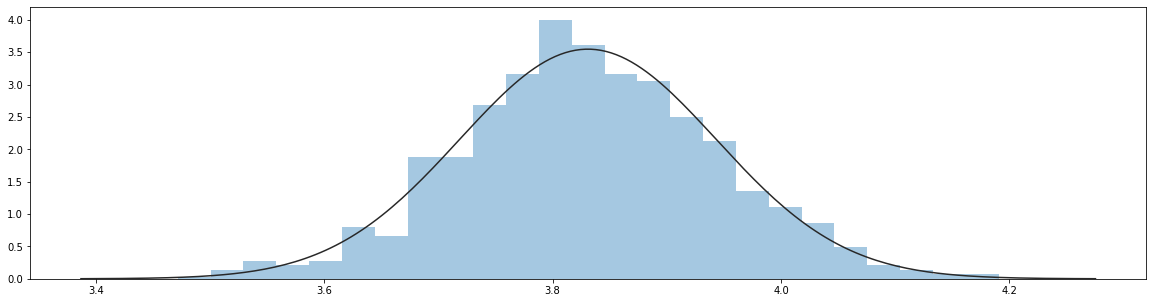

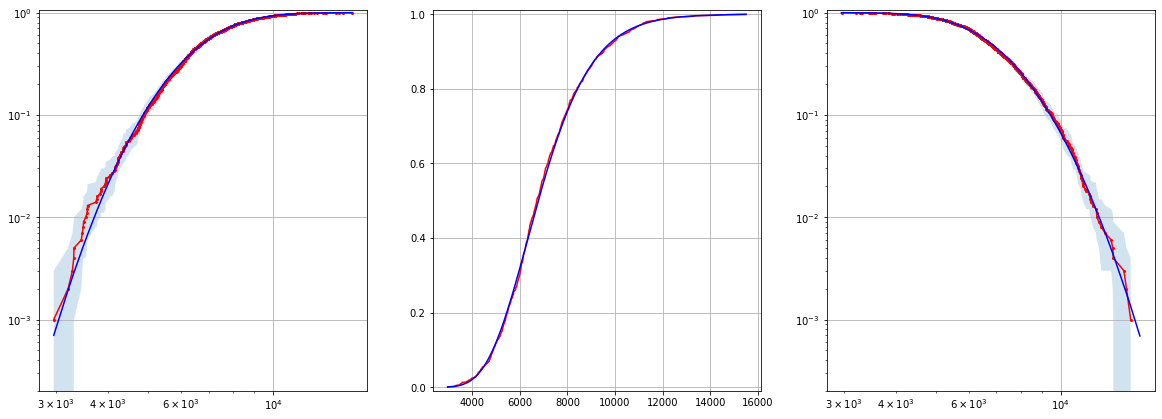



*************************************************************************************************
1 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance1.9312738519120974e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2741162211229501, mu 8.910217505977664, location 2307.378325023736


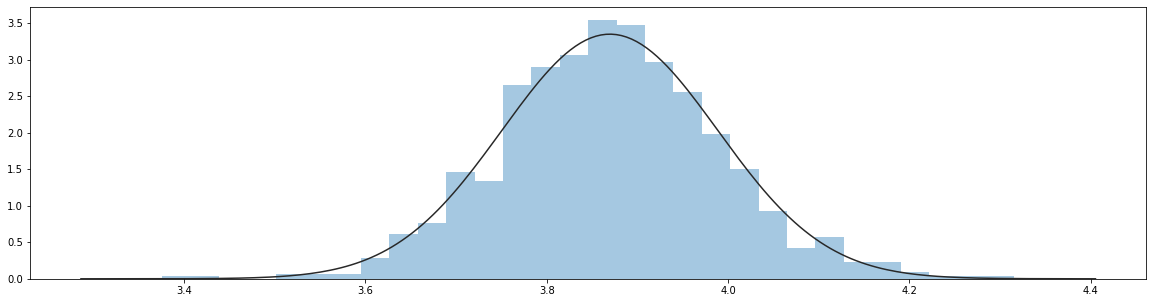

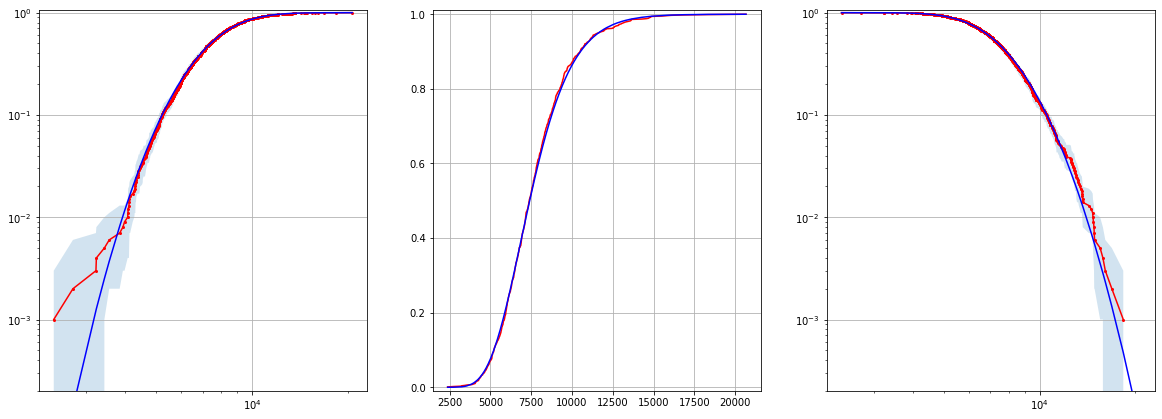



************************************************************************************************
2 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance3.862547703824195e-05.csv
************************************************************************************************
lognormal parameters: sigma 0.332979965896988, mu 8.853885124734989, location 2511.0662654750886


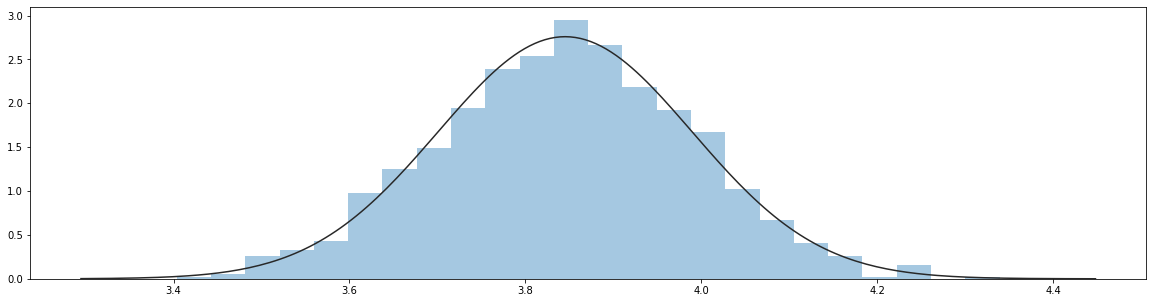

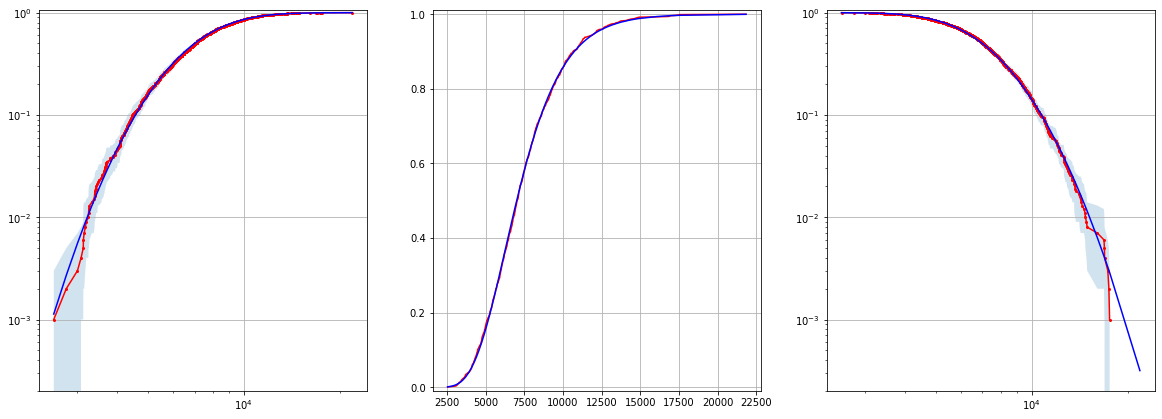



************************************************************************************************
3 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance5.793821555736291e-05.csv
************************************************************************************************
lognormal parameters: sigma 0.31449797307332067, mu 8.991570263739998, location 1523.6632527567945


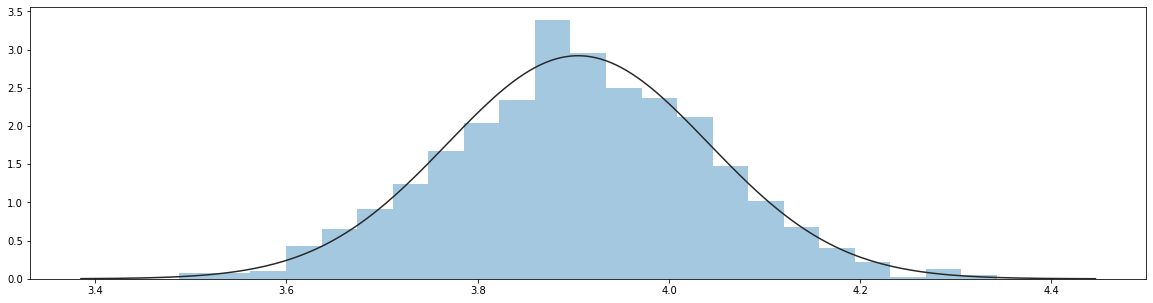

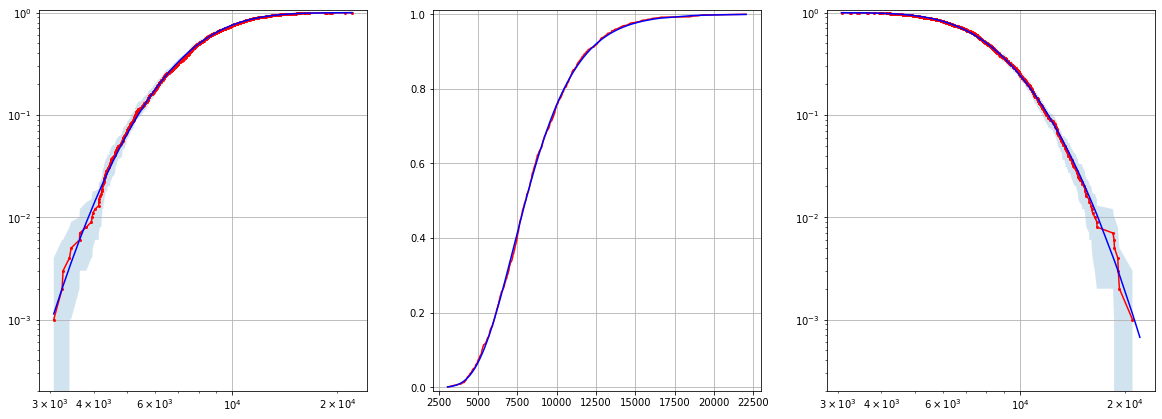



***********************************************************************************************
4 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance7.72509540764839e-05.csv
***********************************************************************************************
lognormal parameters: sigma 0.3055497573243973, mu 9.010948209797178, location 1305.8868497423216


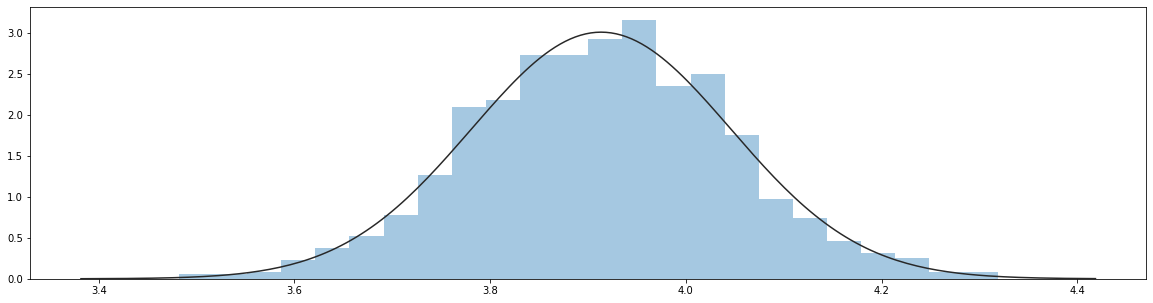

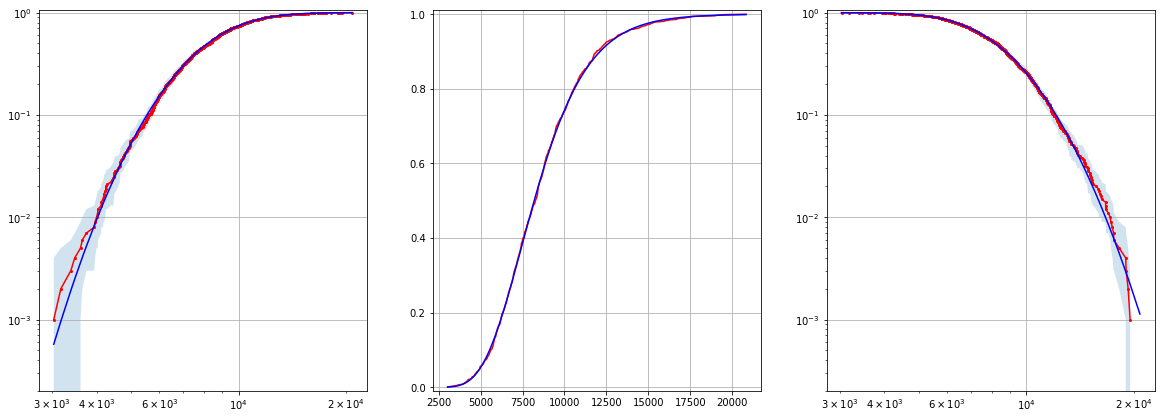



*************************************************************************************************
5 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.00011587643111472581.csv
*************************************************************************************************
lognormal parameters: sigma 0.28496878316433305, mu 9.126457936076955, location 302.4776106252185


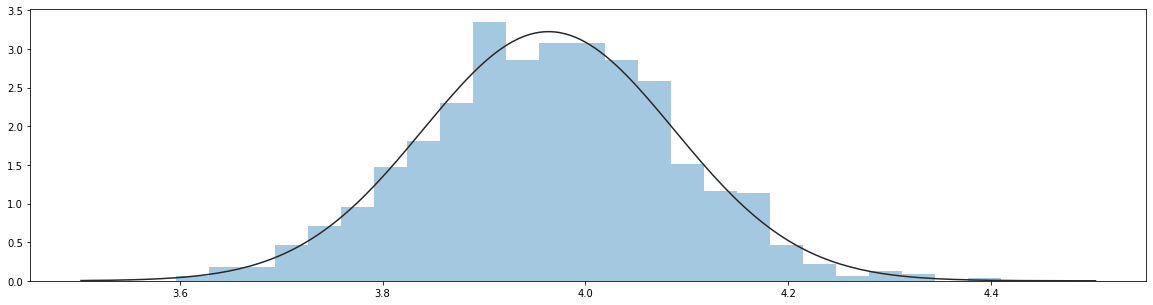

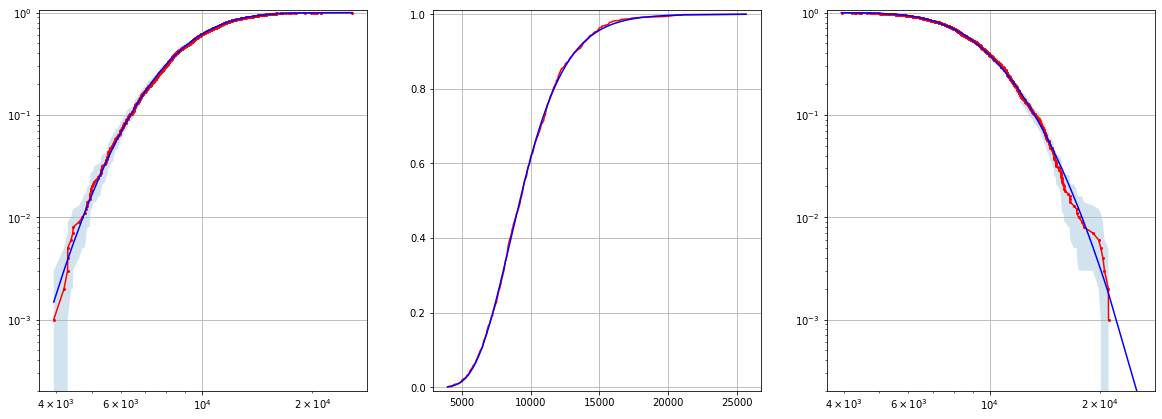



************************************************************************************************
6 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0001545019081529678.csv
************************************************************************************************
lognormal parameters: sigma 0.26117380872313306, mu 9.141416197792312, location 2.2993727127662256


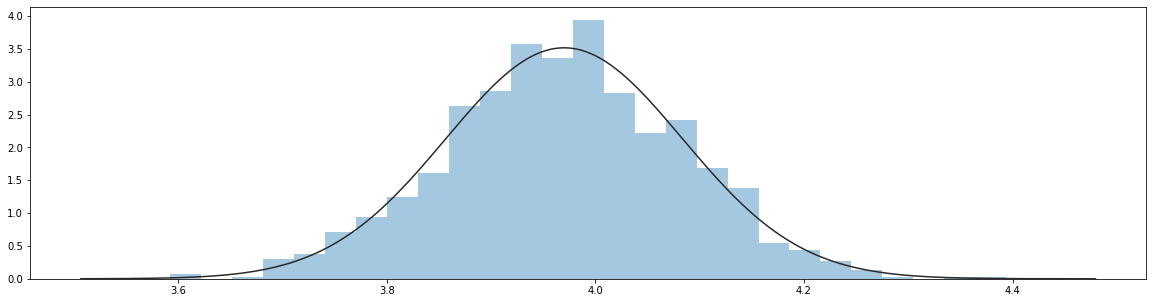

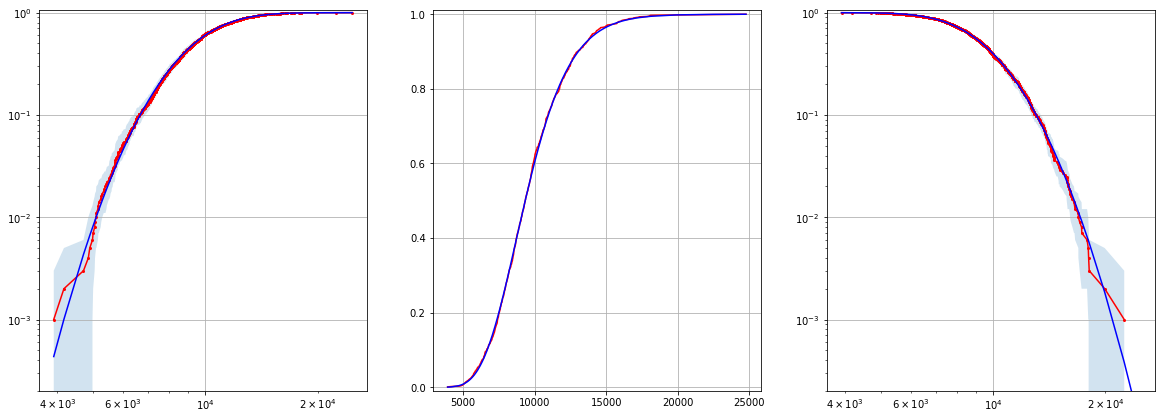



************************************************************************************************
7 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0001931273851912097.csv
************************************************************************************************
lognormal parameters: sigma 0.29542800542102476, mu 9.023095019330391, location 837.3923376055268


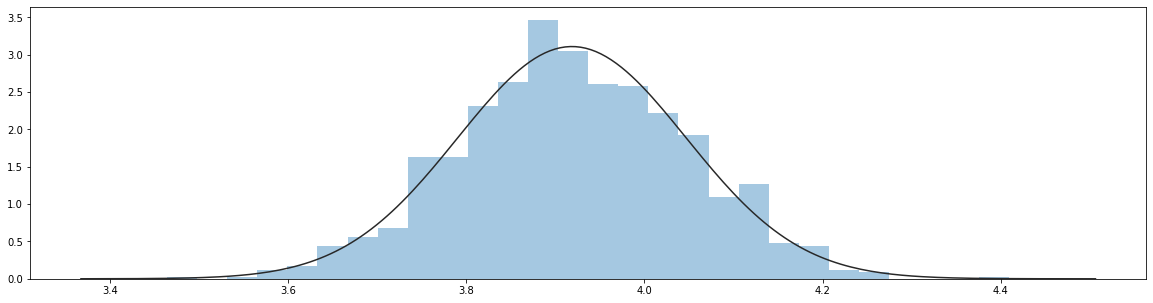

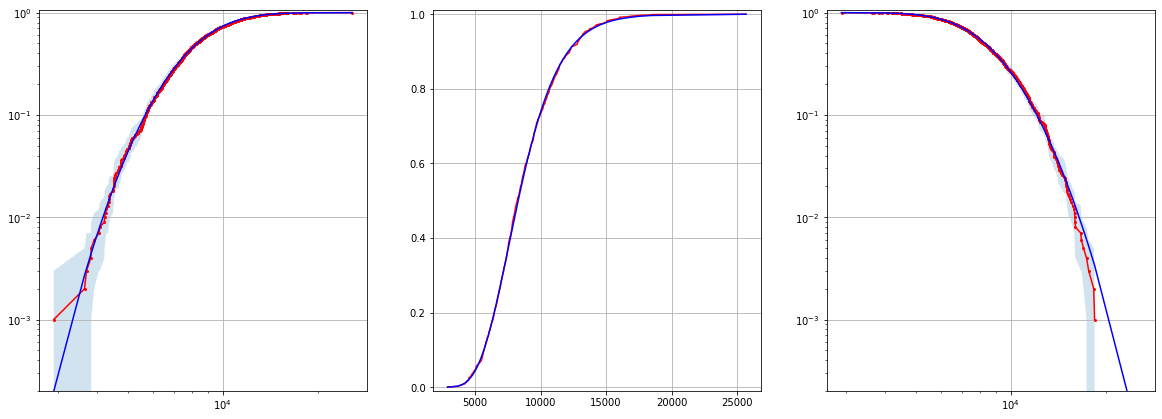



*************************************************************************************************
8 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.00023175286222945163.csv
*************************************************************************************************
lognormal parameters: sigma 0.2919684829235808, mu 8.999312071018883, location 1029.1440725190816


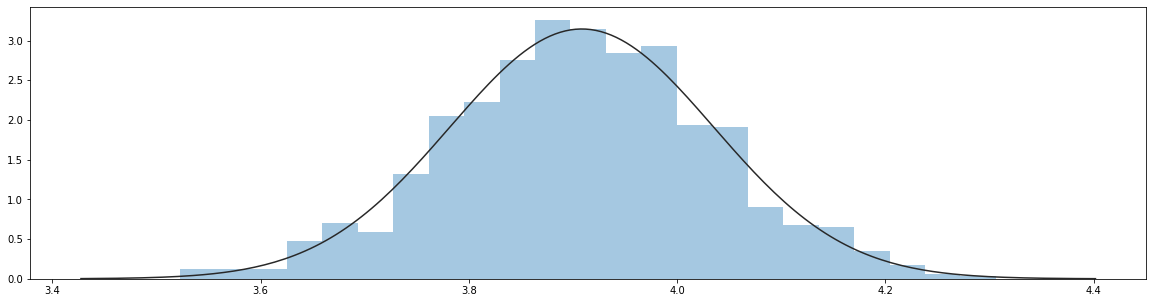

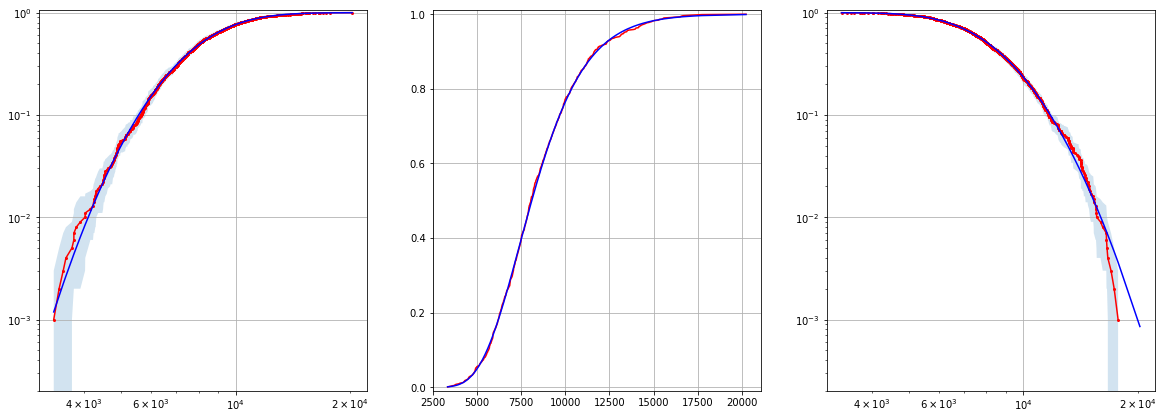



************************************************************************************************
9 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0002703783392676936.csv
************************************************************************************************
lognormal parameters: sigma 0.2683211203844858, mu 9.040702312810481, location 706.6660370943493


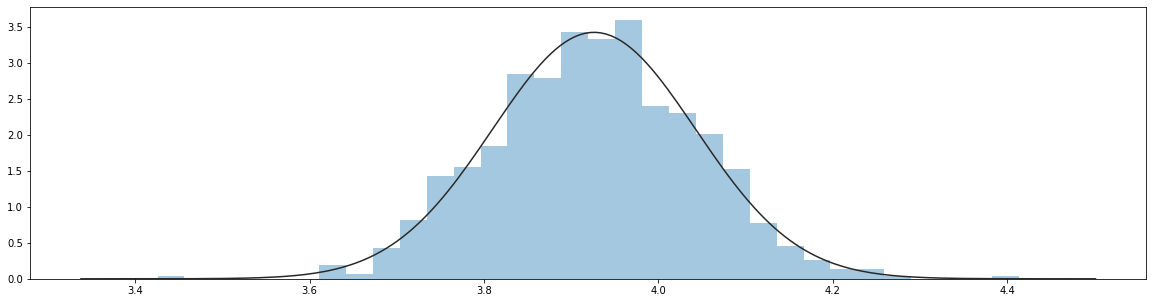

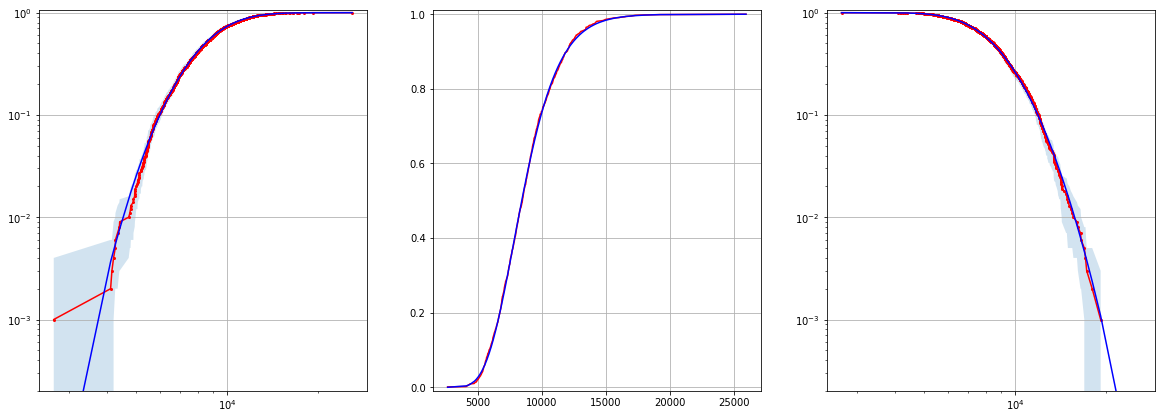



*************************************************************************************************
10 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1953896602/chance0.0003090038163059356.csv
*************************************************************************************************
lognormal parameters: sigma 0.2977206319153627, mu 8.945514064970698, location 1465.0228960430443


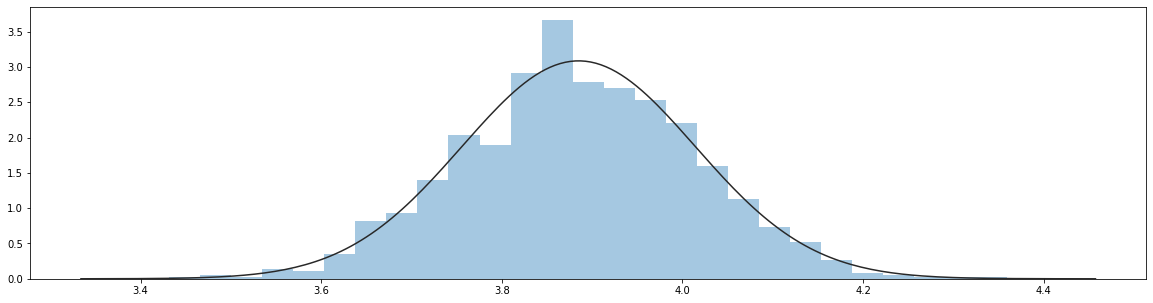

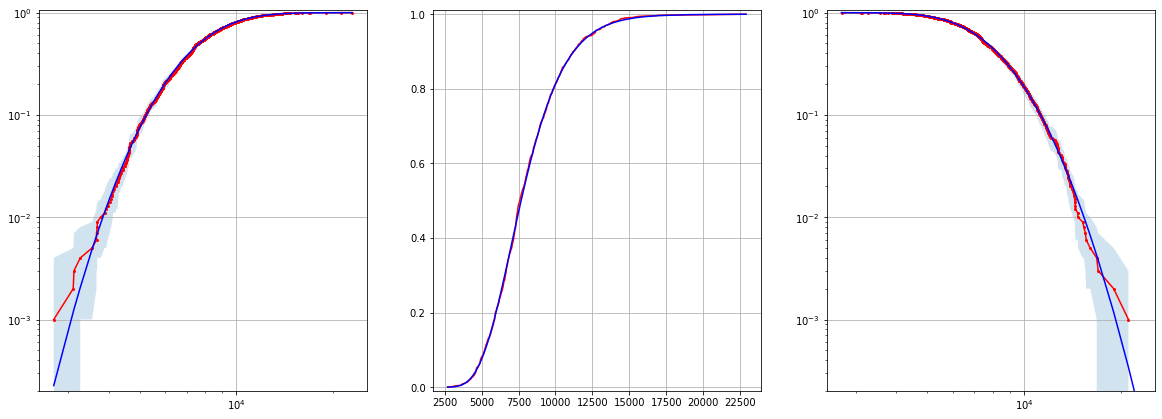



************************************************************************************************
11 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance8.44605646486143e-06.csv
************************************************************************************************
lognormal parameters: sigma 0.18664885584395982, mu 12.412728768178297, location 3.5827339824815927e-06


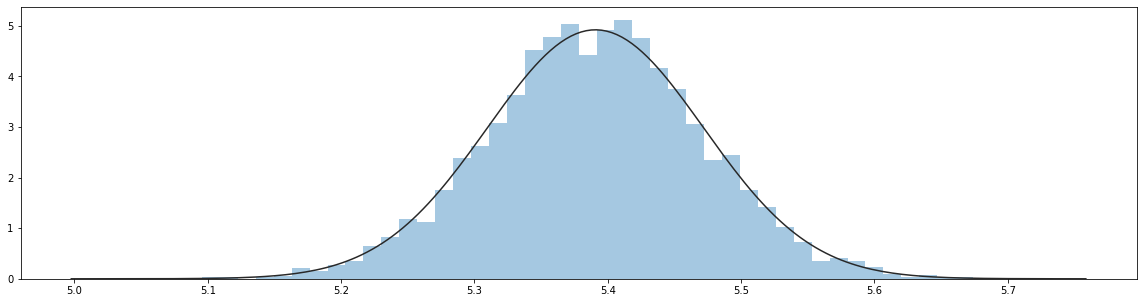

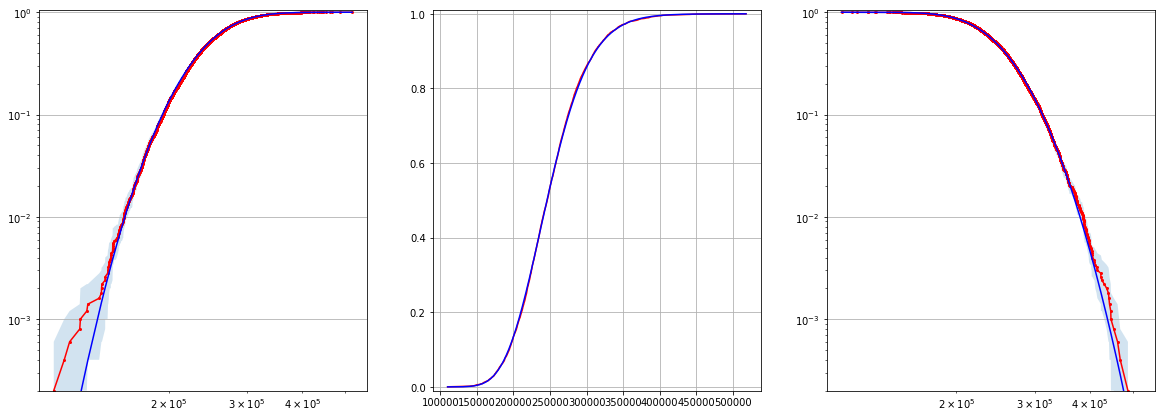



*************************************************************************************************
12 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance1.689211292972286e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2587203387084415, mu 12.222113808451905, location 21792.822425329952


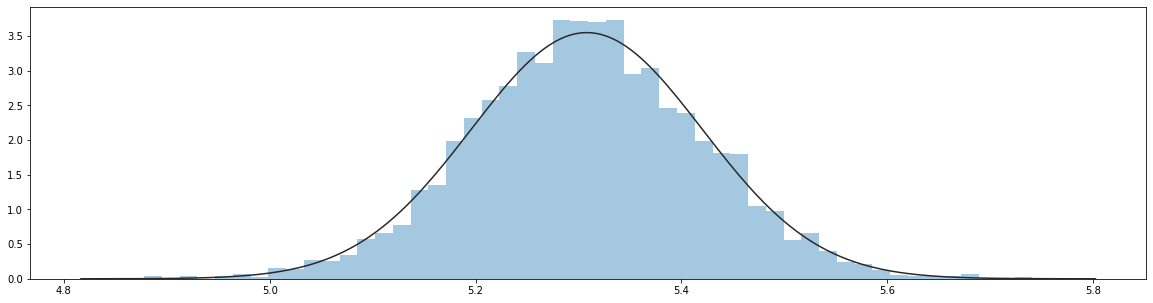

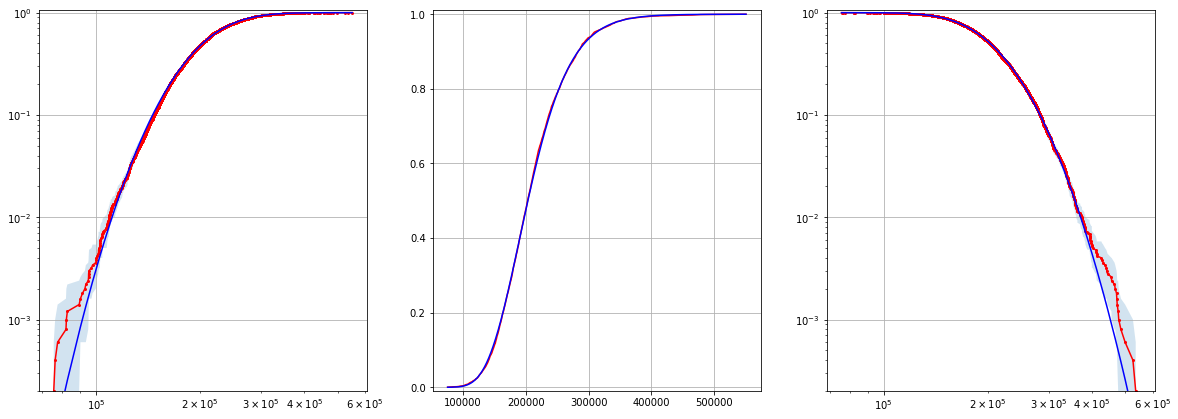



*************************************************************************************************
13 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance3.378422585944572e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.34053685907006165, mu 11.983420851745906, location 35218.80368720484


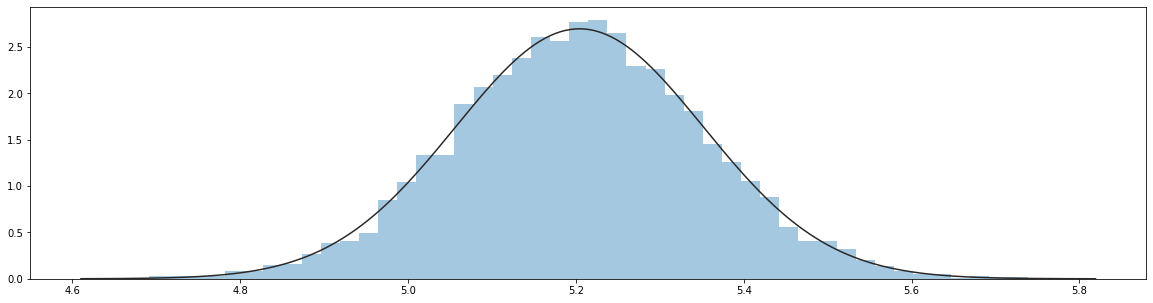

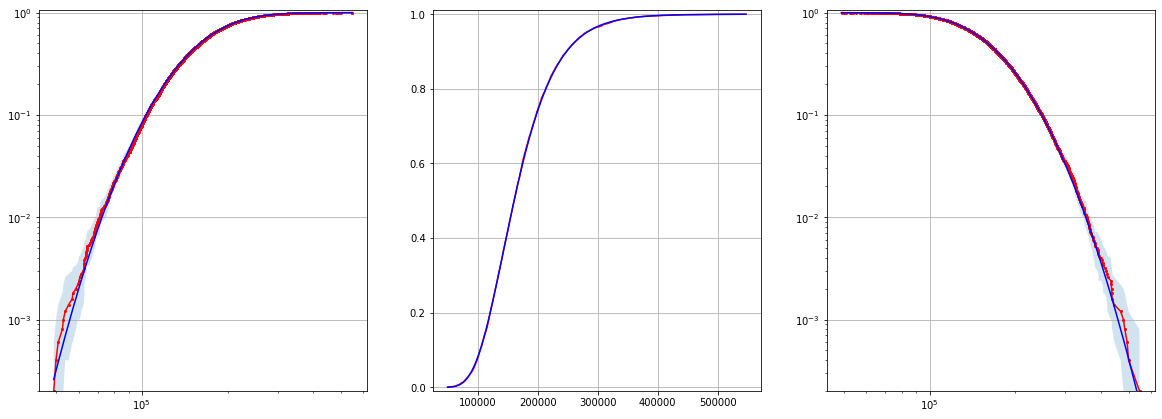



*************************************************************************************************
14 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance6.756845171889145e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.3330990269759822, mu 11.97245137670763, location 10776.455297274872


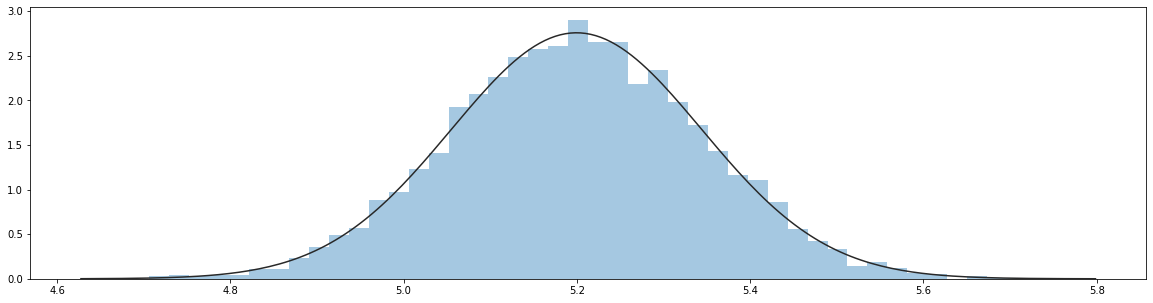

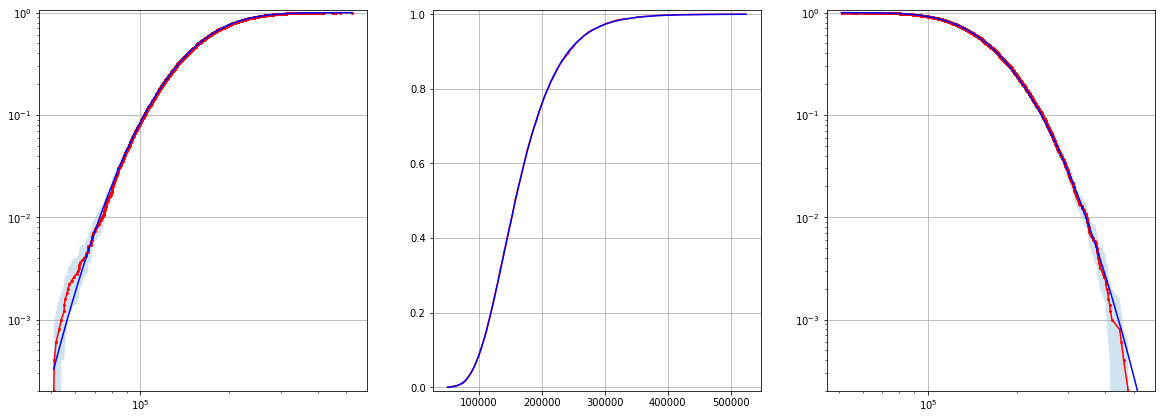



*************************************************************************************************
15 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1511168162/chance0.0001351369034377829.csv
*************************************************************************************************
lognormal parameters: sigma 0.3569969427223237, mu 11.910560715705607, location 7705.884439254581


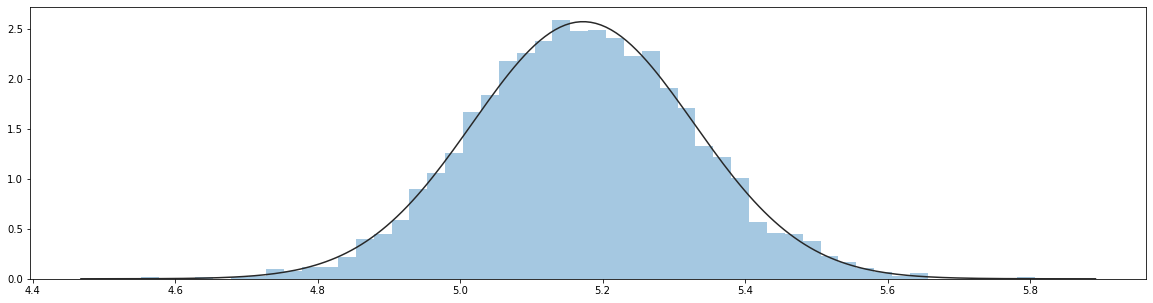

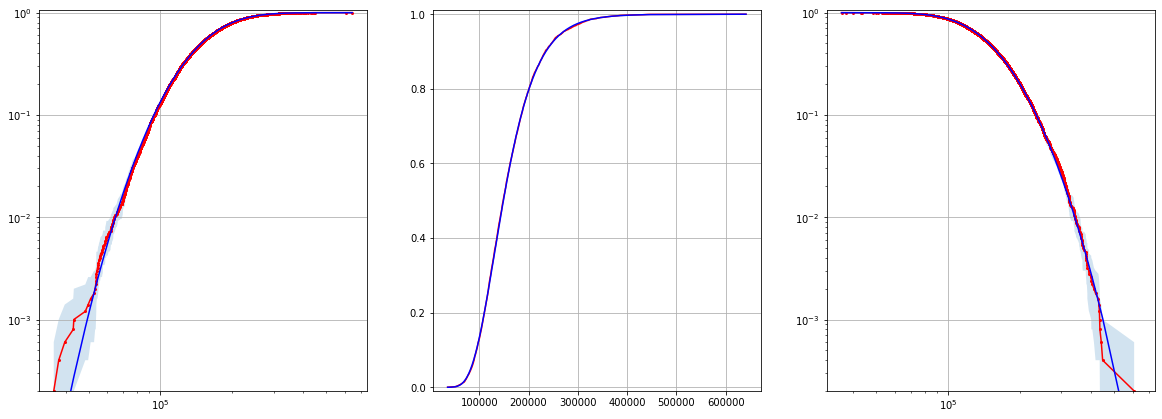



*************************************************************************************************
16 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance1.004169898003682e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2667546418131682, mu 9.749108906419208, location 9829.389660069492


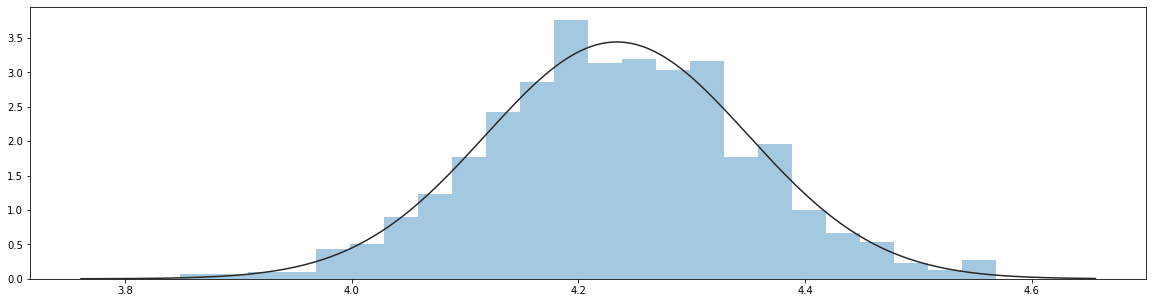

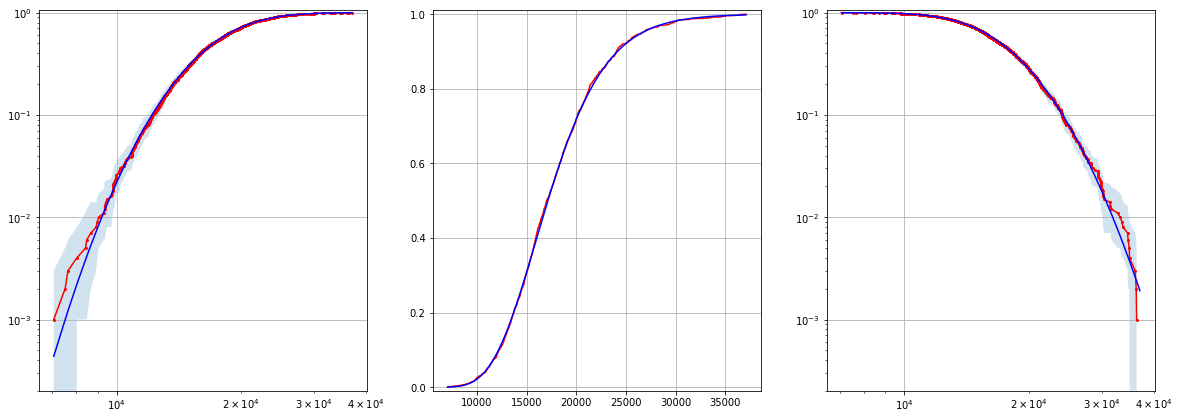



*************************************************************************************************
17 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance2.008339796007364e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.26714382644259604, mu 9.9857253610797, location 6132.665887107321


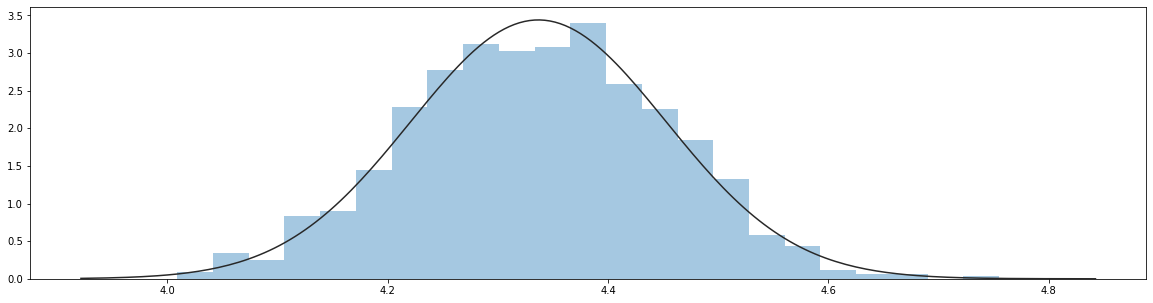

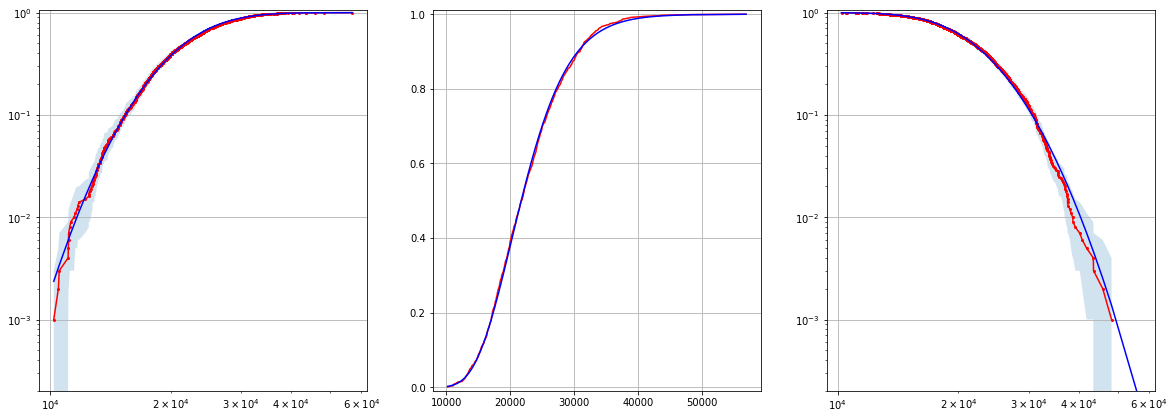



*************************************************************************************************
18 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance4.016679592014728e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.24922858238807982, mu 10.315530751355432, location 6.252572668573281e-06


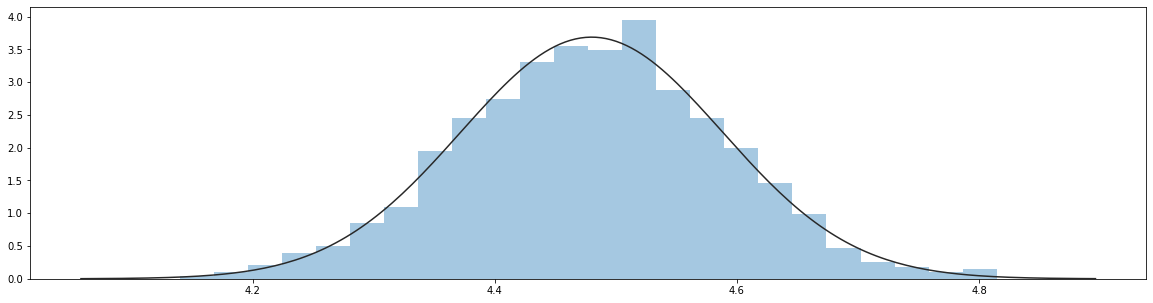

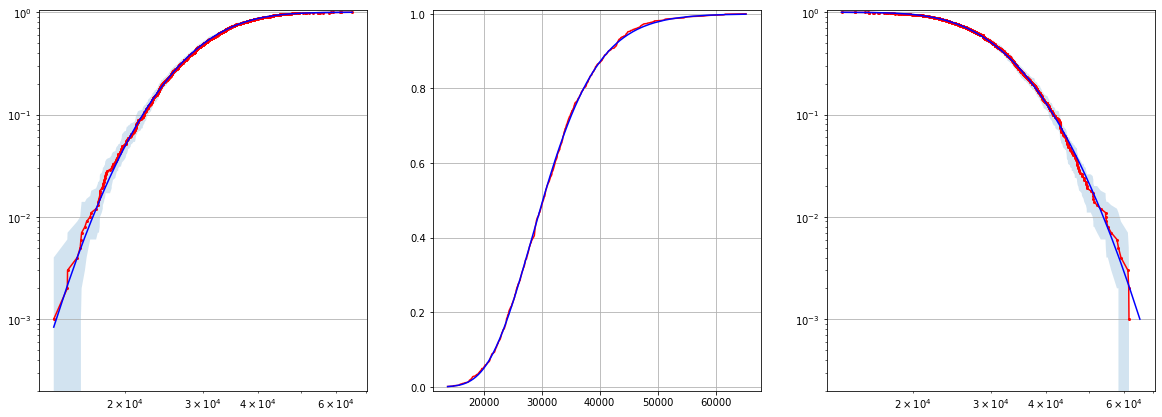



*************************************************************************************************
19 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance6.025019388022091e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2968227476270593, mu 10.29361539844495, location 2857.5597488378935


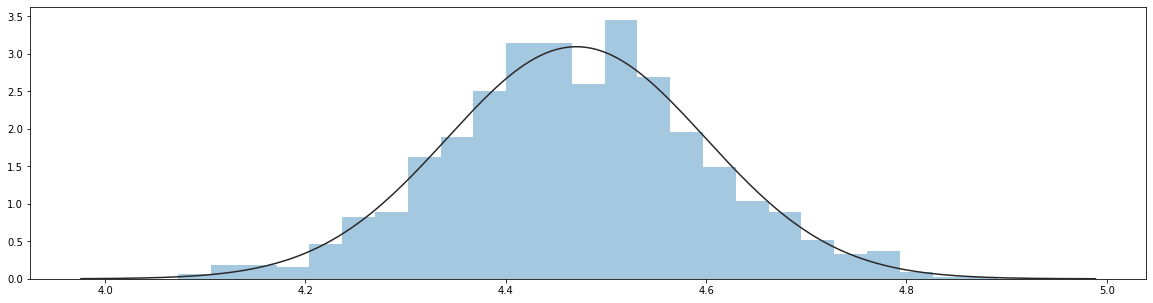

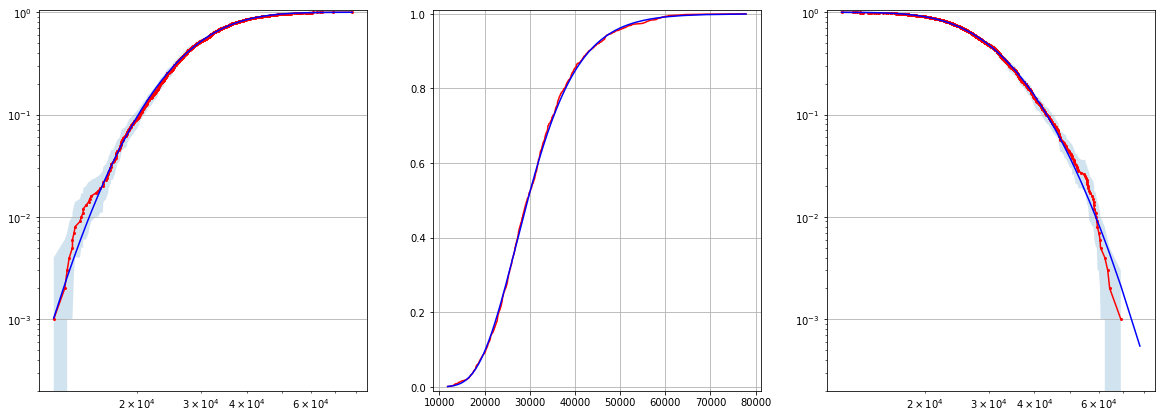



*************************************************************************************************
20 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance8.033359184029456e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2896757554941295, mu 10.44351470887884, location 731.8477858223902


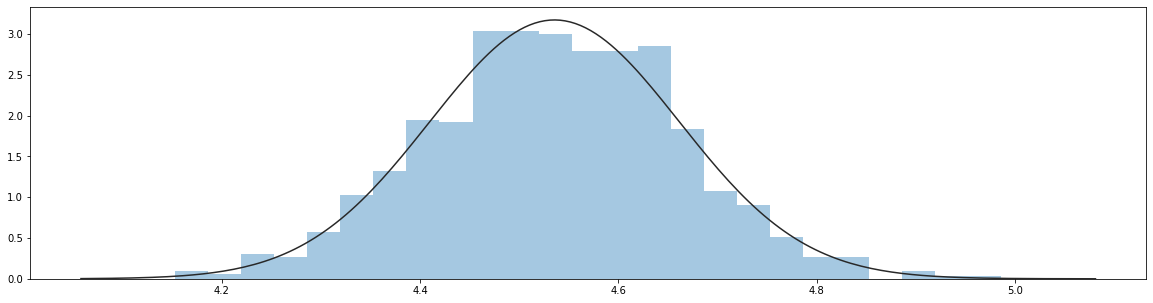

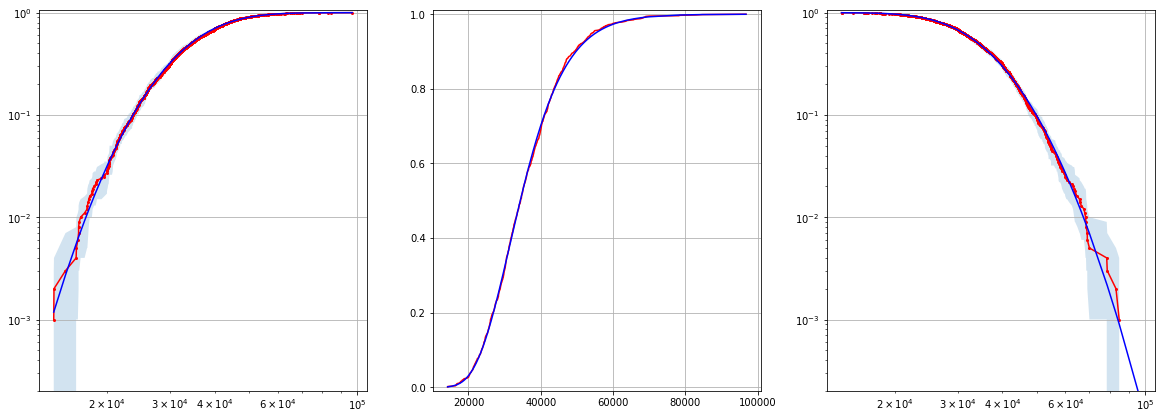



**************************************************************************************************
21 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00012050038776044183.csv
**************************************************************************************************
lognormal parameters: sigma 0.3030024393263668, mu 10.626966864653083, location 3.890302447068387e-06


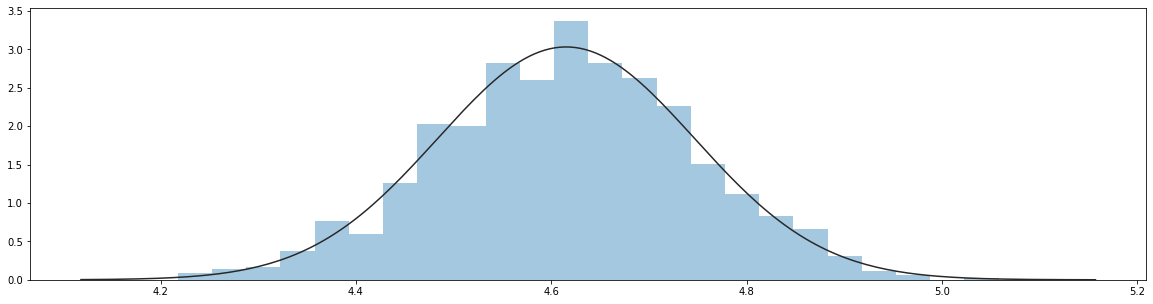

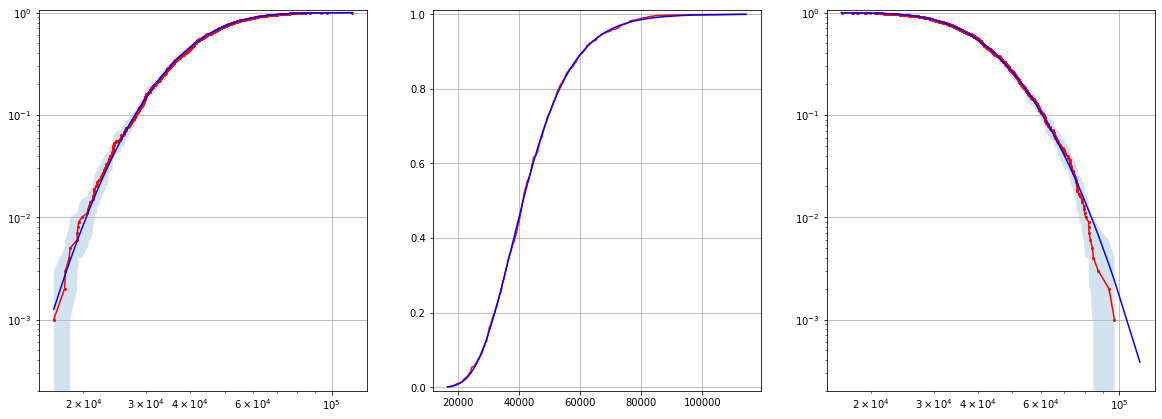



**************************************************************************************************
22 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00016066718368058913.csv
**************************************************************************************************
lognormal parameters: sigma 0.30294675966340967, mu 10.767185211171695, location 5.276978183833358e-06


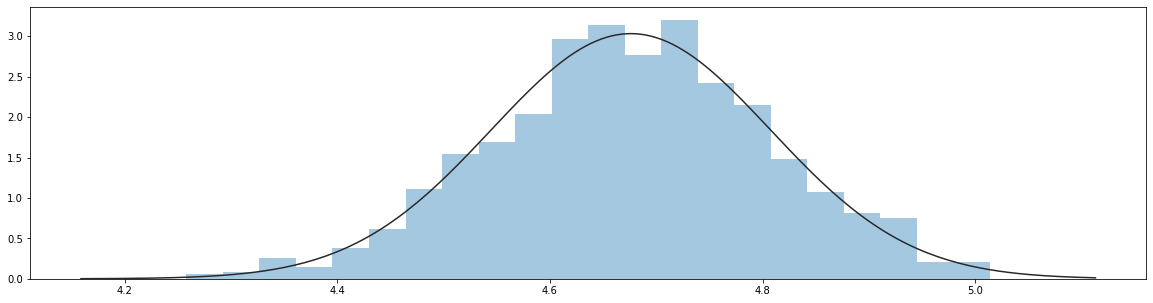

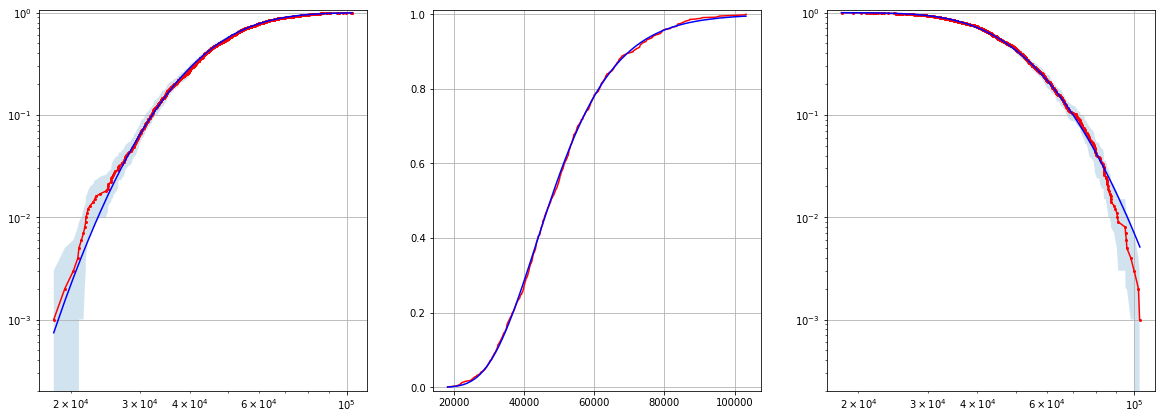



*************************************************************************************************
23 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.0002008339796007364.csv
*************************************************************************************************
lognormal parameters: sigma 0.29145558539039973, mu 10.865880901079516, location 3.7687499511939143e-06


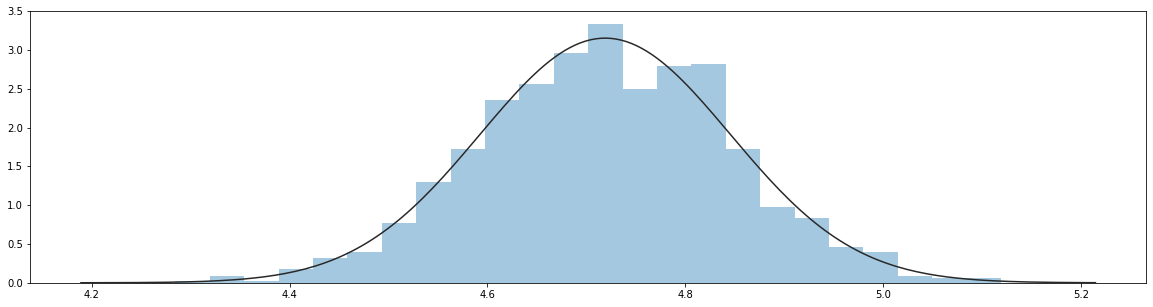

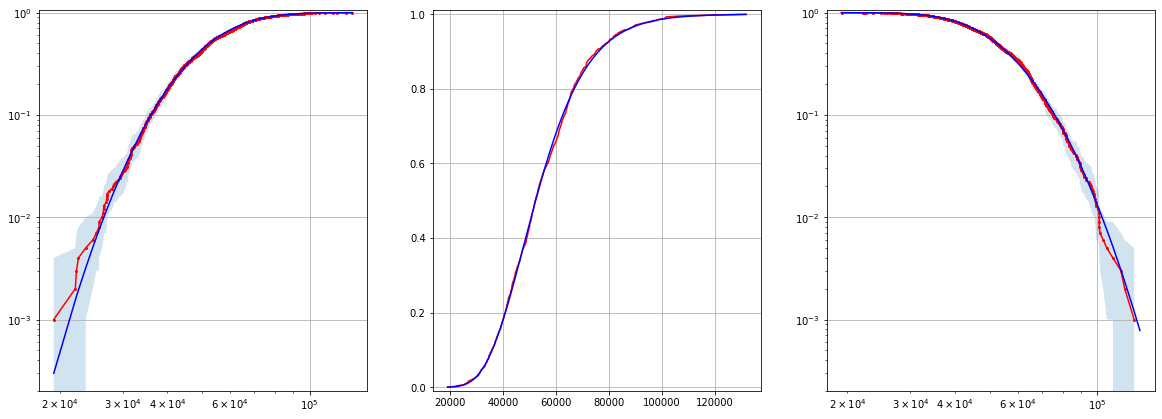



**************************************************************************************************
24 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00024100077552088365.csv
**************************************************************************************************
lognormal parameters: sigma 0.29711491637042886, mu 10.962645362068917, location 880.751038598224


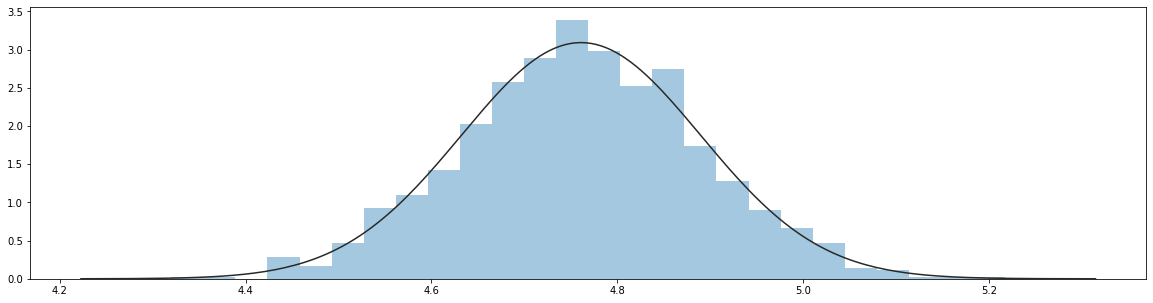

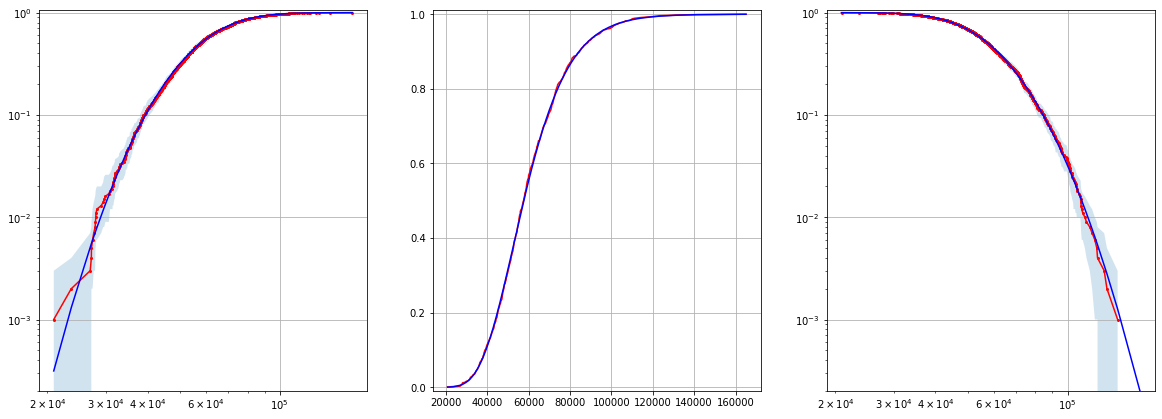



*************************************************************************************************
25 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.0002811675714410309.csv
*************************************************************************************************
lognormal parameters: sigma 0.2912166307363144, mu 11.073043042592108, location 4.802439574474101e-06


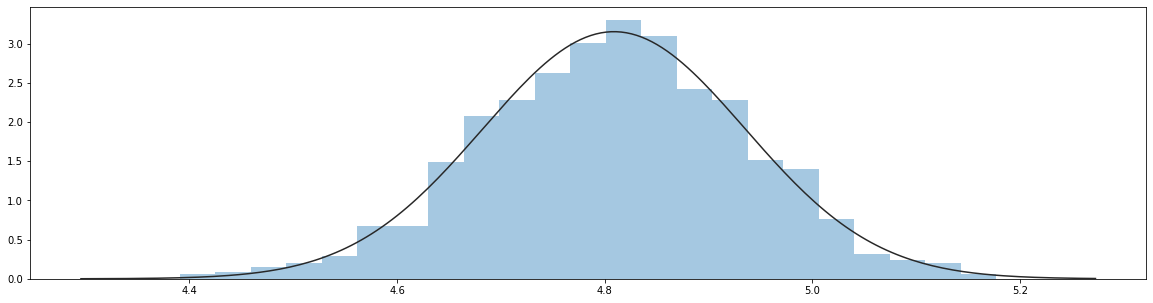

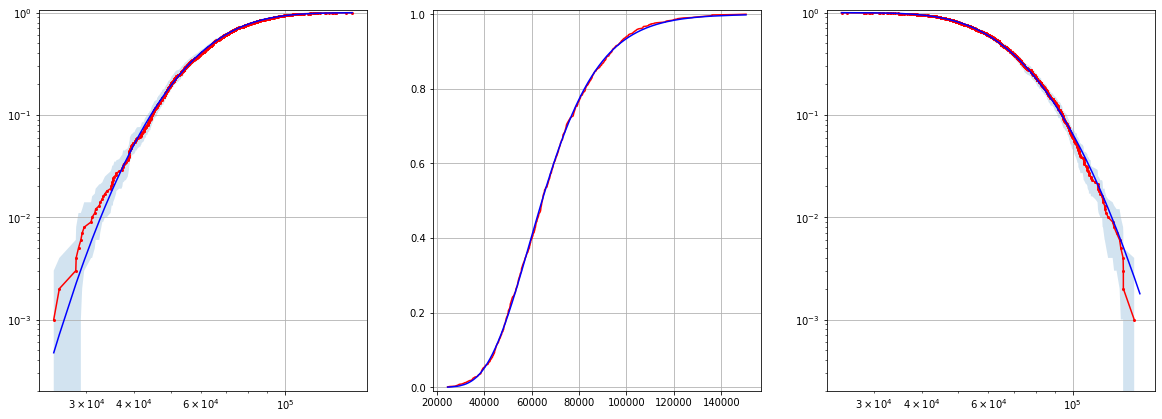



**************************************************************************************************
26 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1502108413/chance0.00032133436736117826.csv
**************************************************************************************************
lognormal parameters: sigma 0.2791496941355967, mu 11.147389672896457, location 3.95892623153336e-06


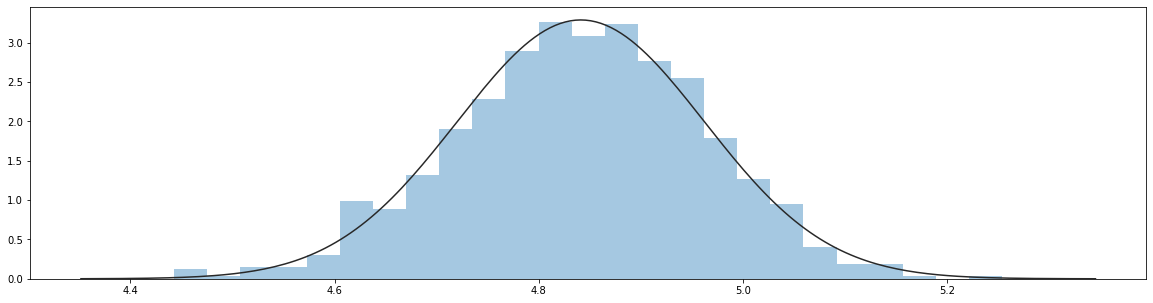

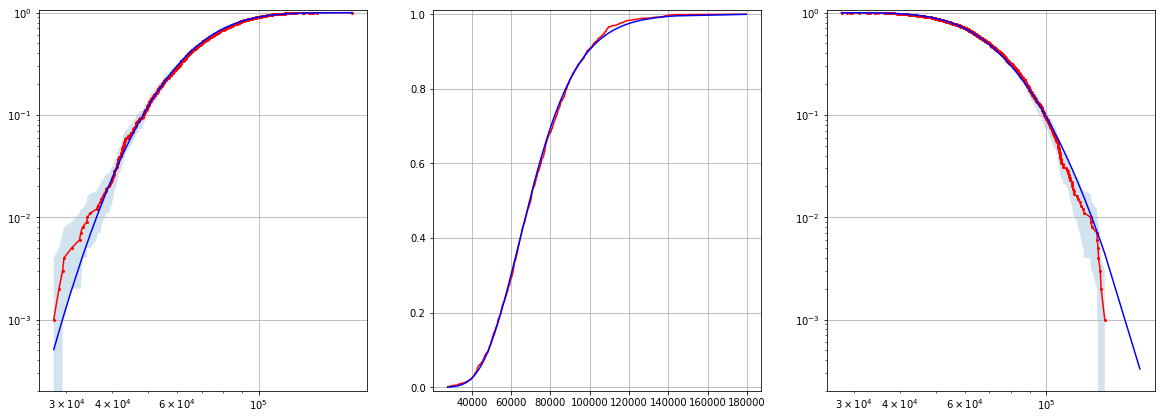



************************************************************************************************
27 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance9.283120802166236e-06.csv
************************************************************************************************
lognormal parameters: sigma 0.18528901898488342, mu 11.634193217551113, location 6.4887765884707214e-06


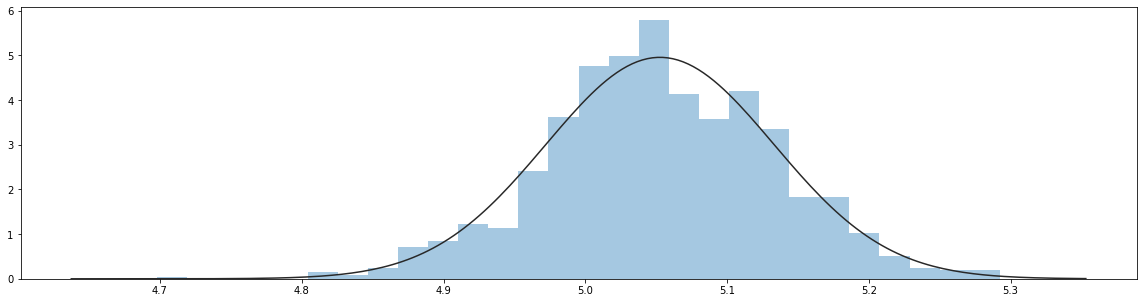

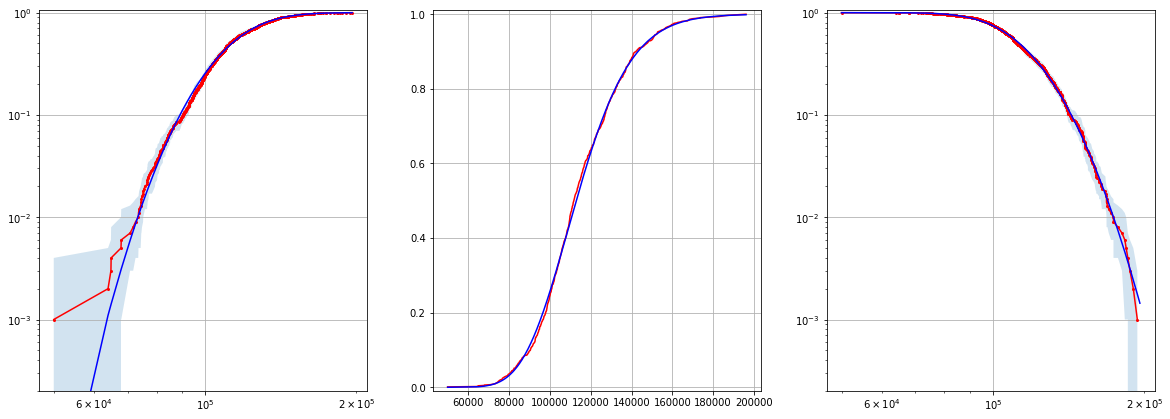



*************************************************************************************************
28 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance1.8566241604332472e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.22589248659498867, mu 11.507852084313411, location 5.432559437749848e-06


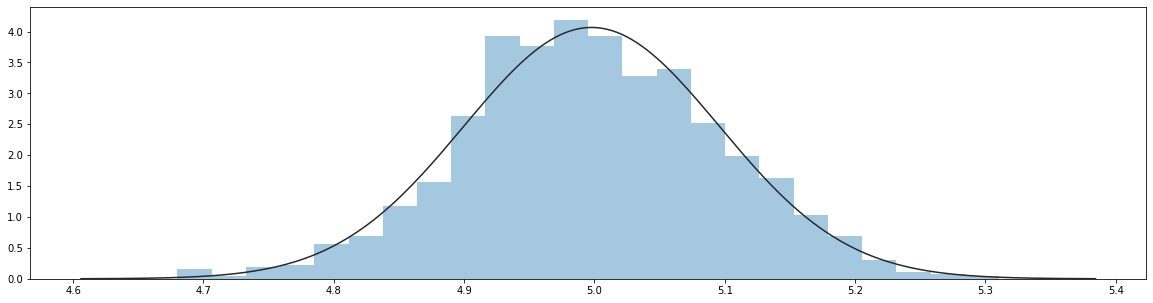

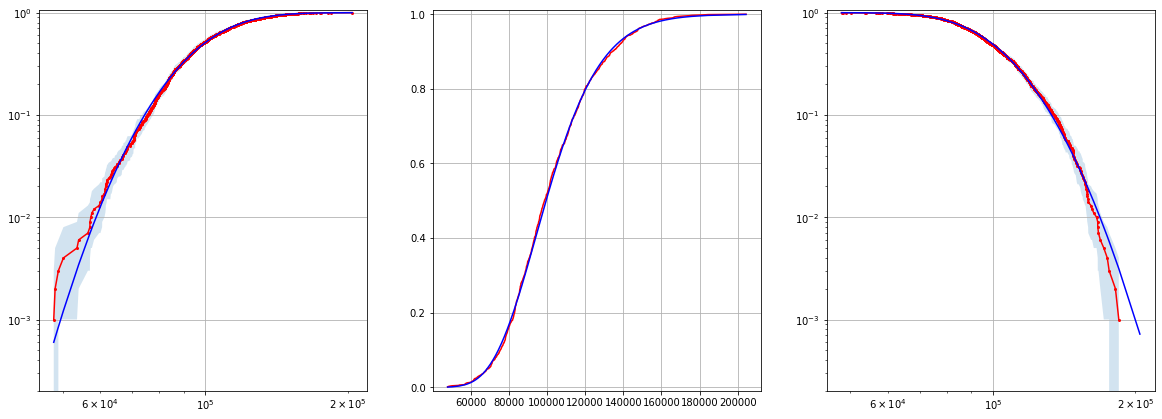



*************************************************************************************************
29 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance3.7132483208664944e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2574759599567308, mu 11.342481294952478, location 5.832779232639505e-06


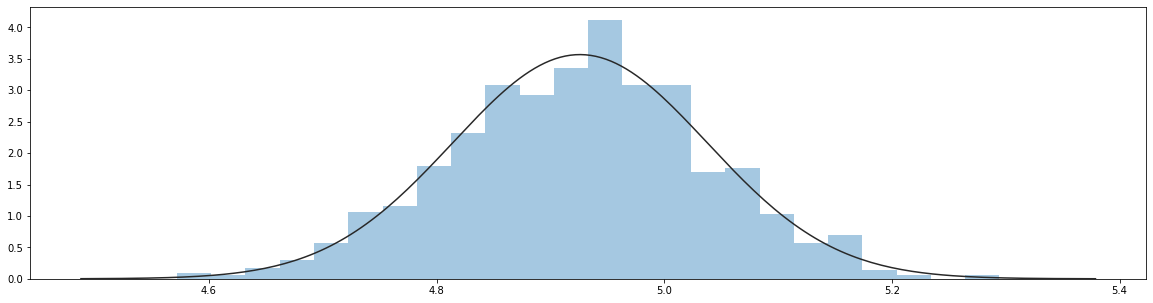

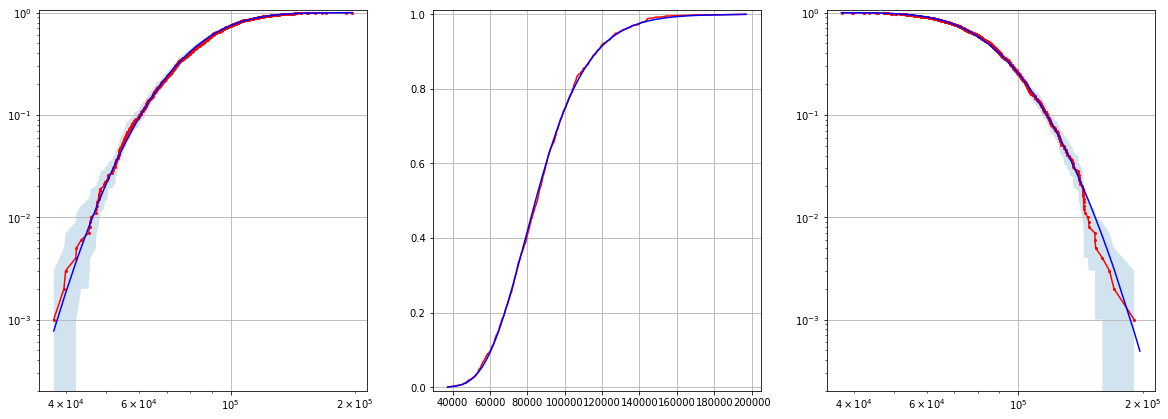



************************************************************************************************
30 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance5.569872481299742e-05.csv
************************************************************************************************
lognormal parameters: sigma 0.3238729174891061, mu 11.056910066351804, location 9905.535458196351


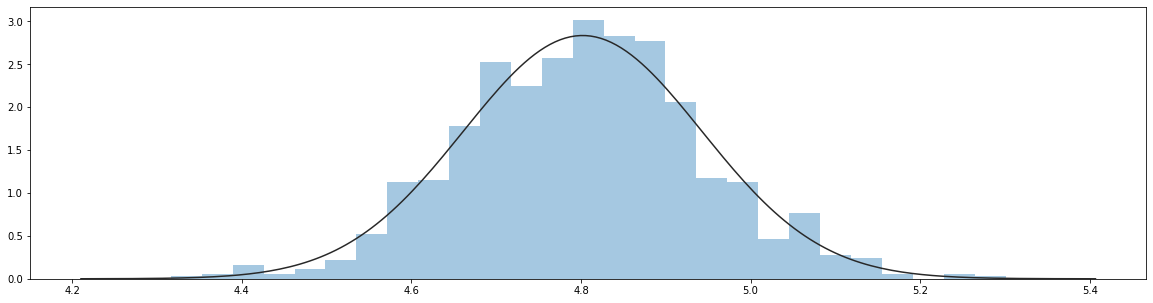

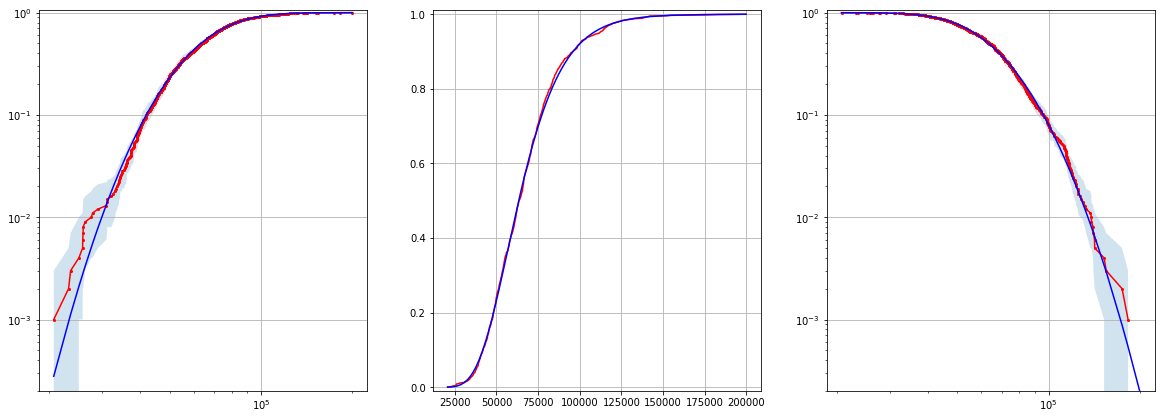



************************************************************************************************
31 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance7.426496641732989e-05.csv
************************************************************************************************
lognormal parameters: sigma 0.32852351038339717, mu 11.018364250850762, location 5408.113653021657


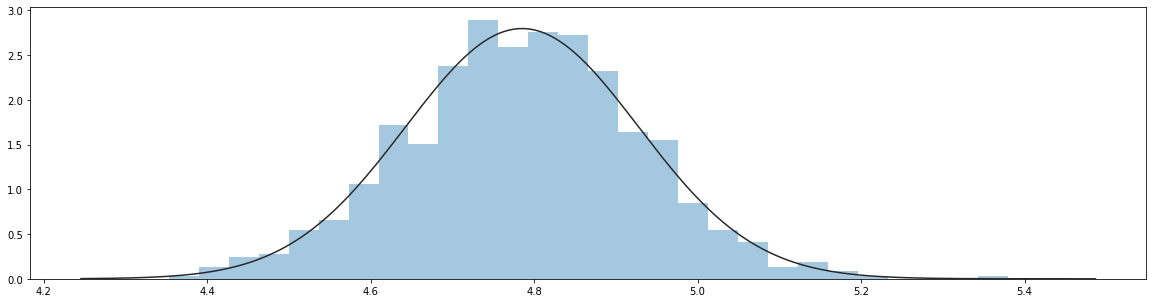

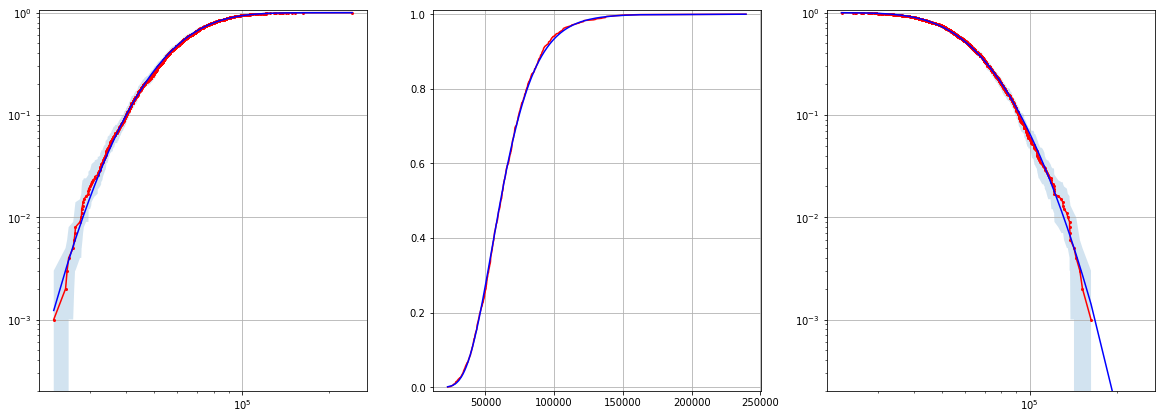



*************************************************************************************************
32 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00011139744962599483.csv
*************************************************************************************************
lognormal parameters: sigma 0.3568074315835574, mu 10.813302060755682, location 9119.152994104266


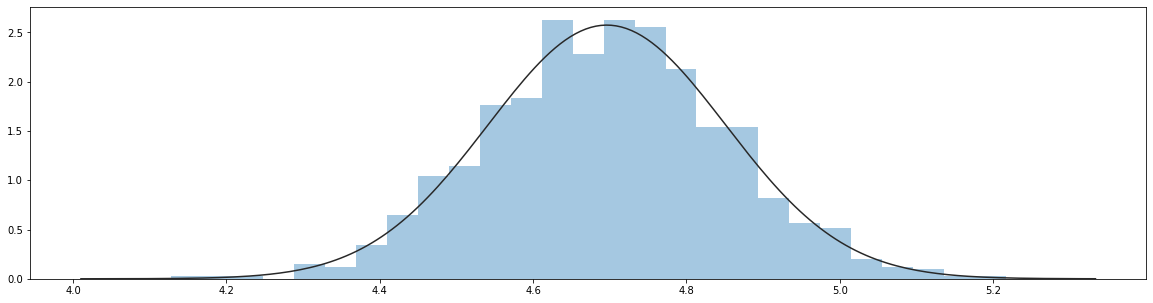

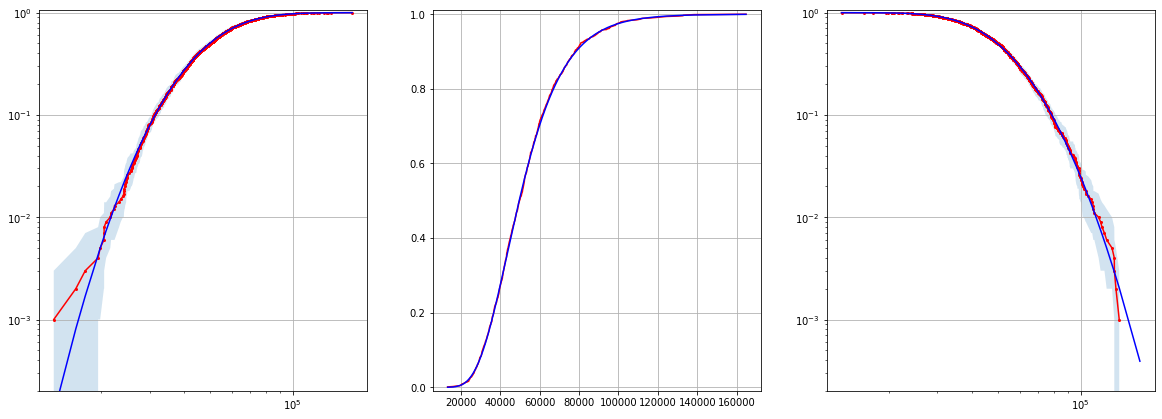



*************************************************************************************************
33 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00014852993283465978.csv
*************************************************************************************************
lognormal parameters: sigma 0.376838088541201, mu 10.689475553688677, location 10852.139419673307


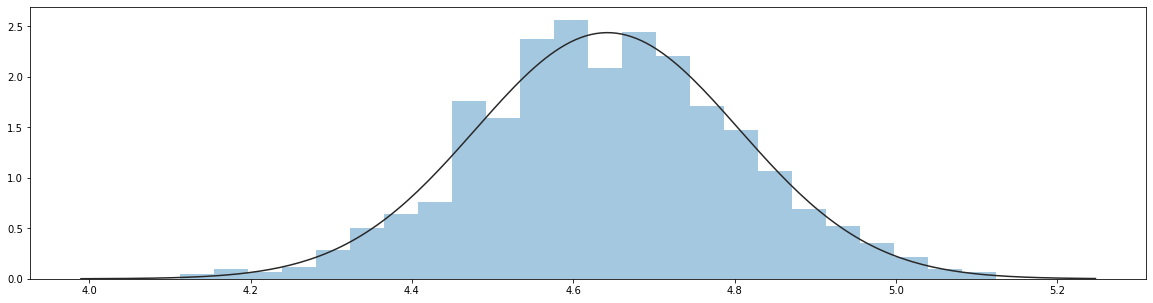

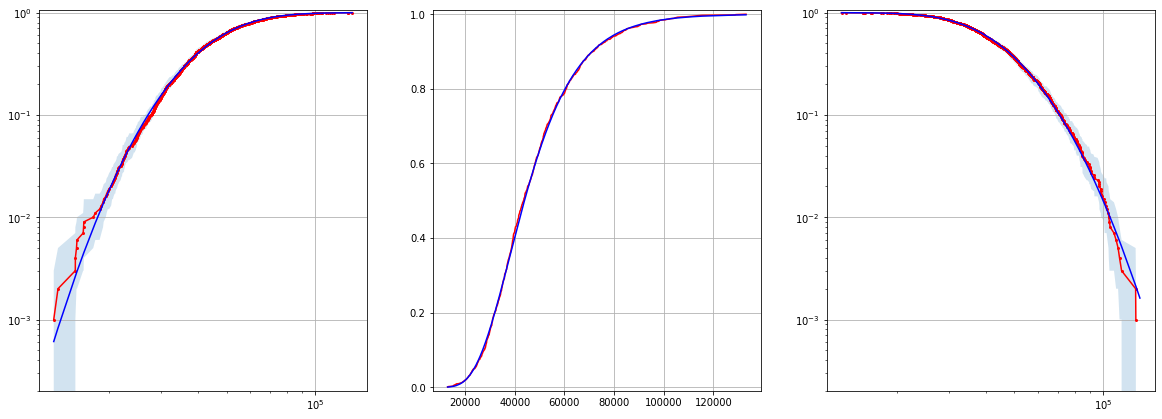



*************************************************************************************************
34 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00018566241604332472.csv
*************************************************************************************************
lognormal parameters: sigma 0.3845087770931378, mu 10.625523295519296, location 11656.274958590378


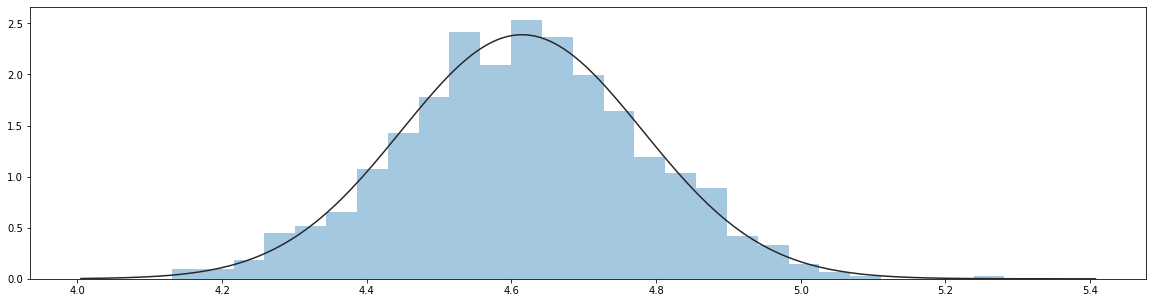

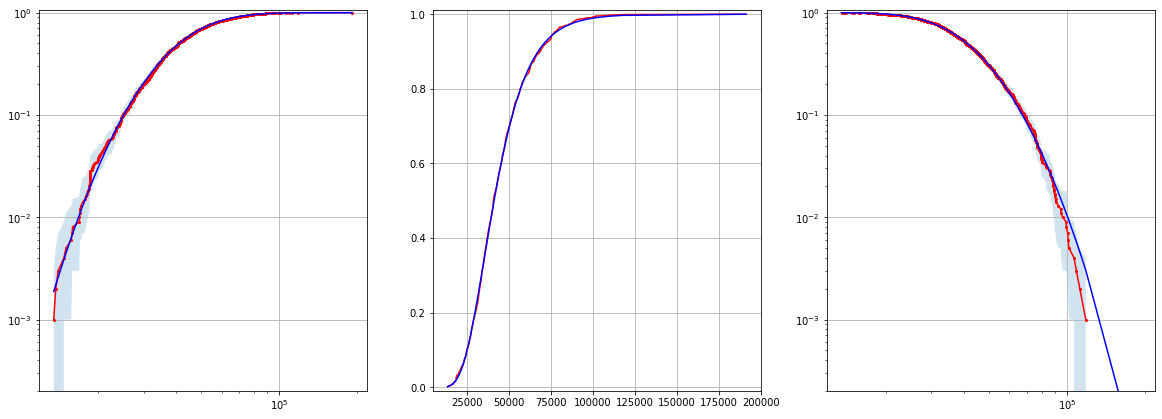



*************************************************************************************************
35 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00022279489925198967.csv
*************************************************************************************************
lognormal parameters: sigma 0.2933778788362865, mu 10.875073148549014, location 4.4344193784682975e-06


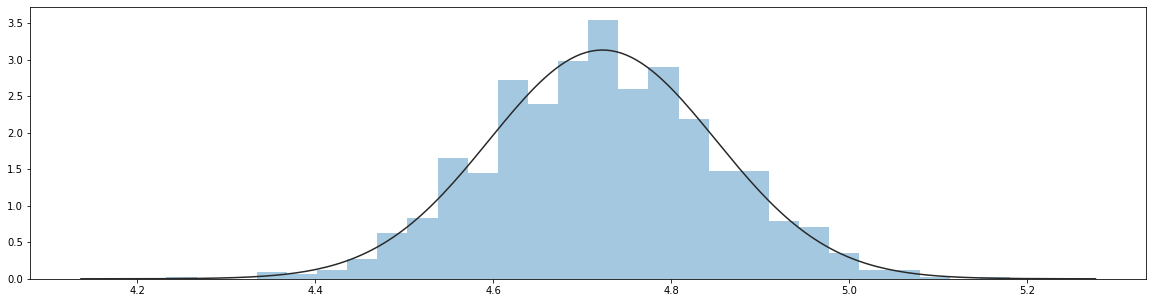

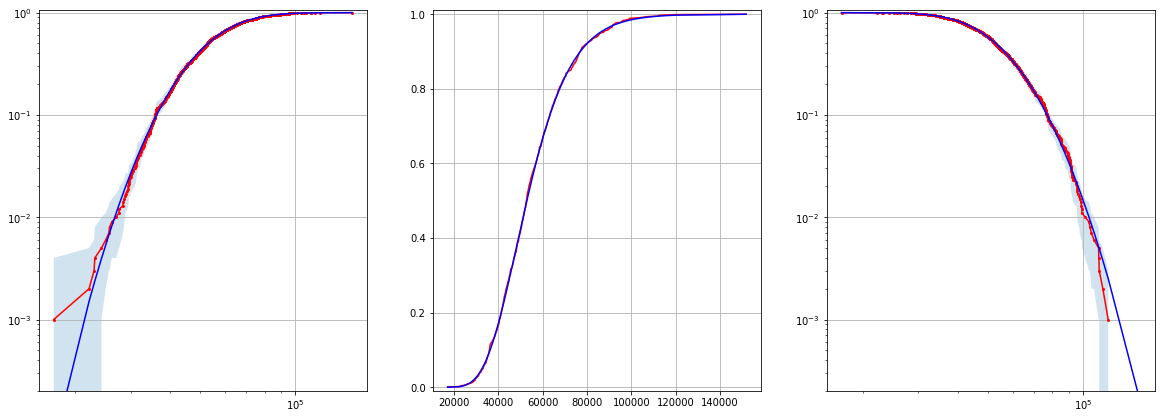



************************************************************************************************
36 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.0002599273824606546.csv
************************************************************************************************
lognormal parameters: sigma 0.28752034173947943, mu 10.857976862776361, location 210.69801650629537


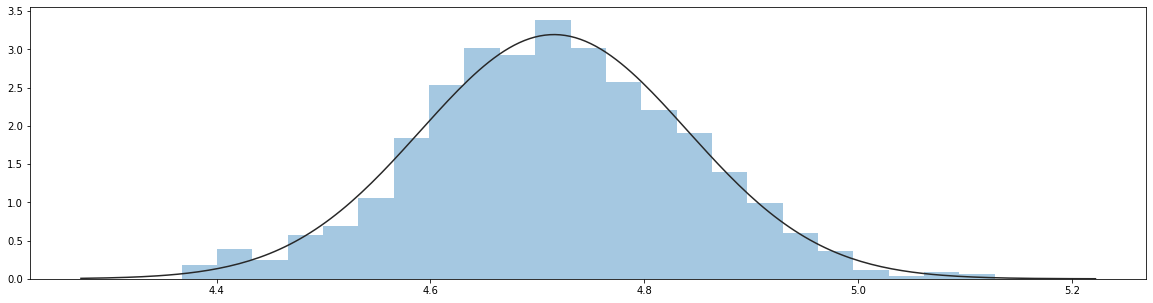

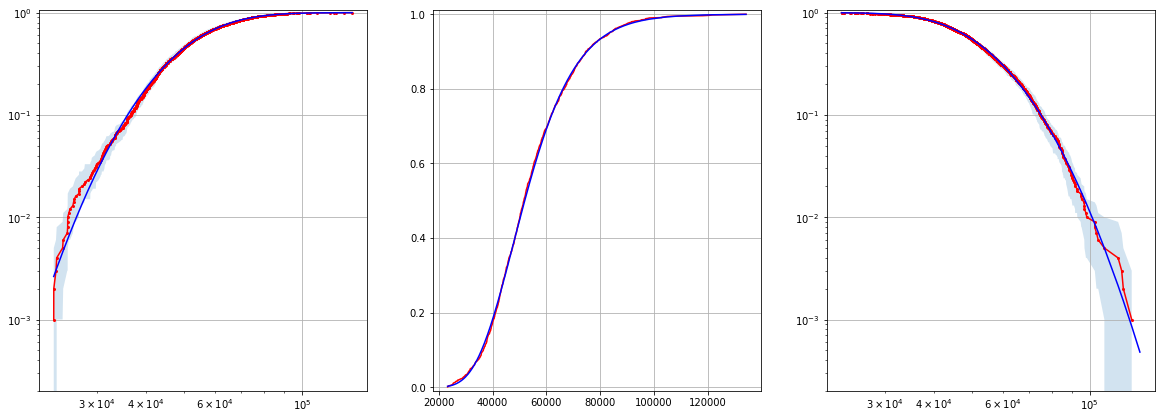



*************************************************************************************************
37 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed625644692/chance0.00029705986566931956.csv
*************************************************************************************************
lognormal parameters: sigma 0.3076609473703316, mu 10.785290400683936, location 4385.564421454417


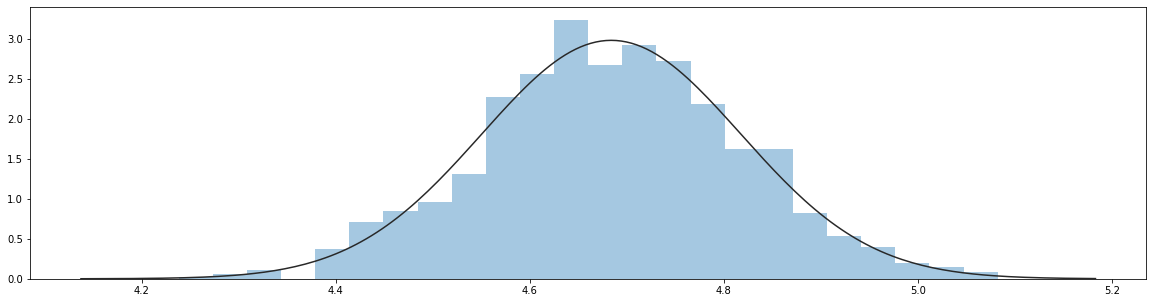

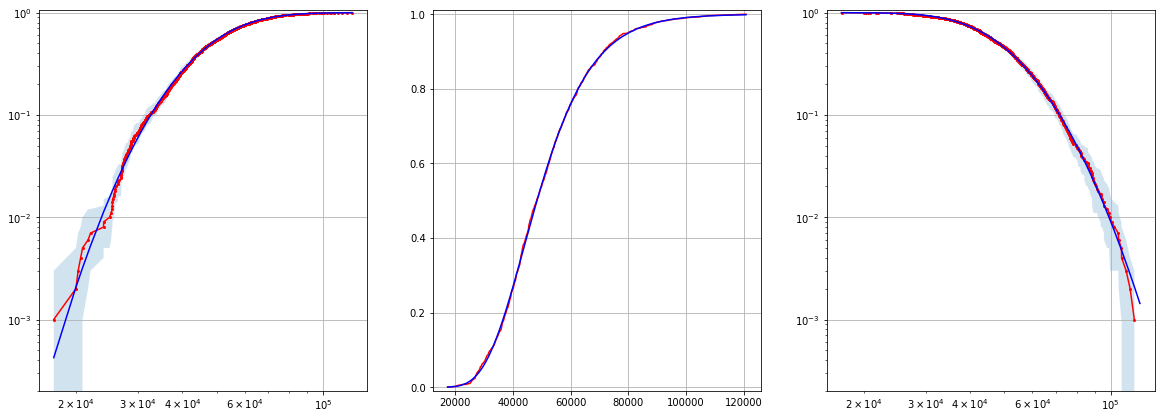



**************************************************************************************************
38 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance3.6094170198416264e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.09018438470766377, mu 6.372621944055769, location 5.214141853779485e-06


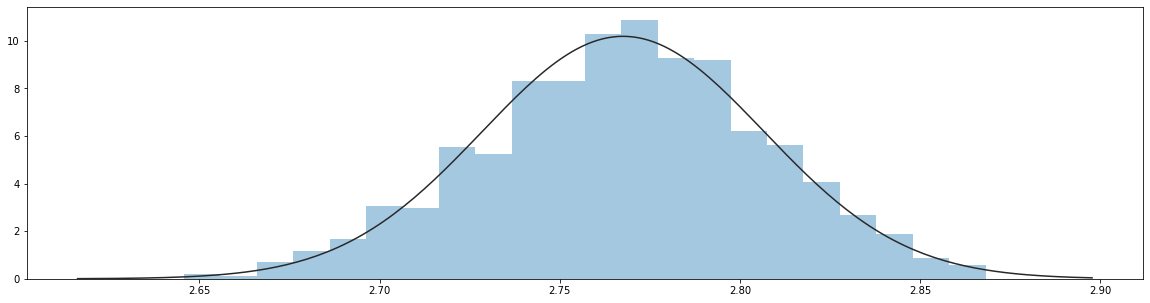

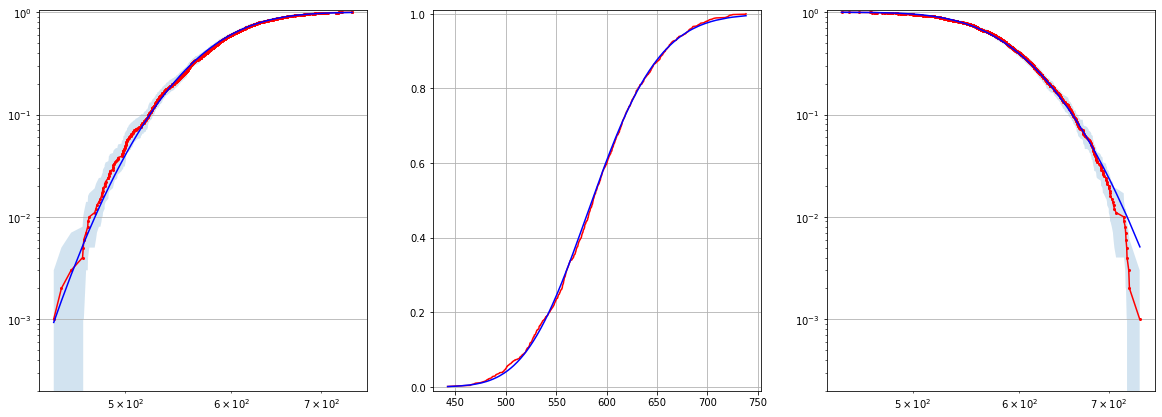



*************************************************************************************************
39 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance7.218834039683253e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.09006681950372626, mu 6.338468553010683, location 3.6038765475533044e-06


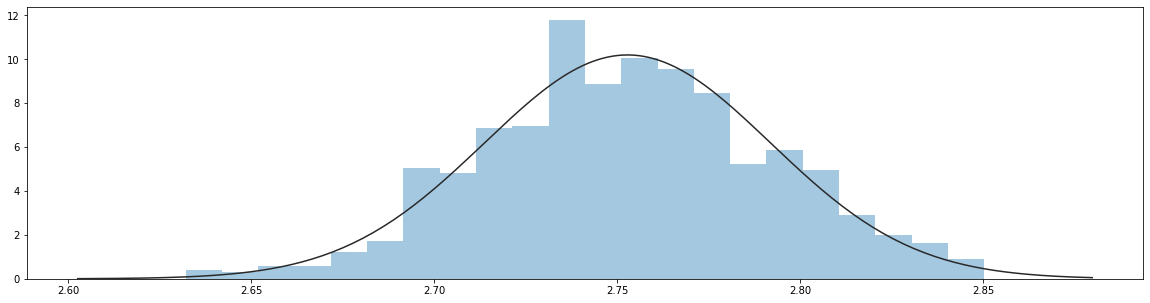

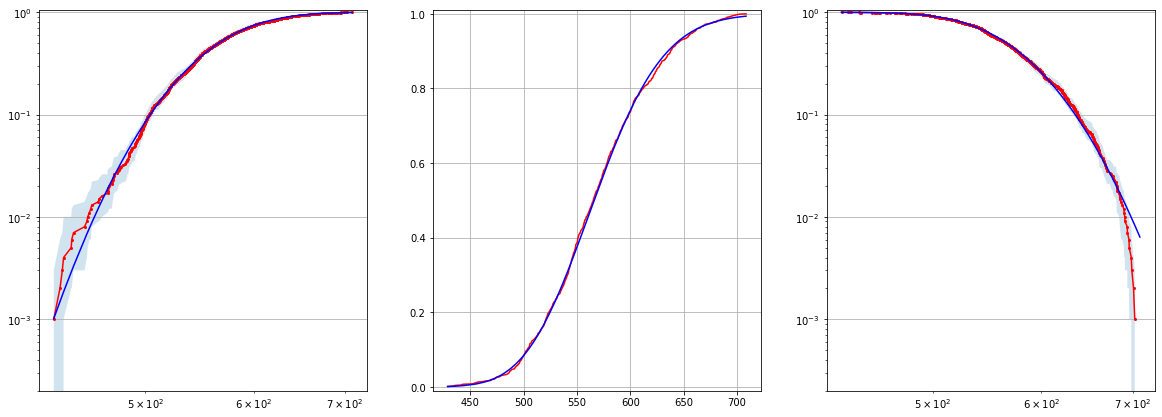



**************************************************************************************************
40 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.00014437668079366506.csv
**************************************************************************************************
lognormal parameters: sigma 0.09195707254305786, mu 6.282214967558428, location 6.15564104461571e-06


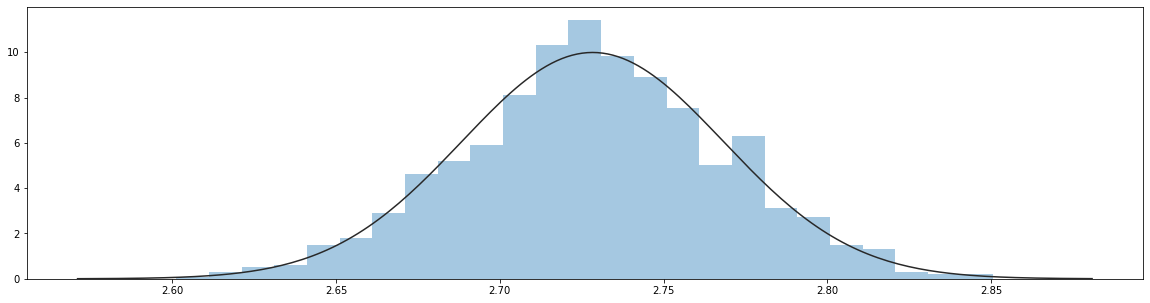

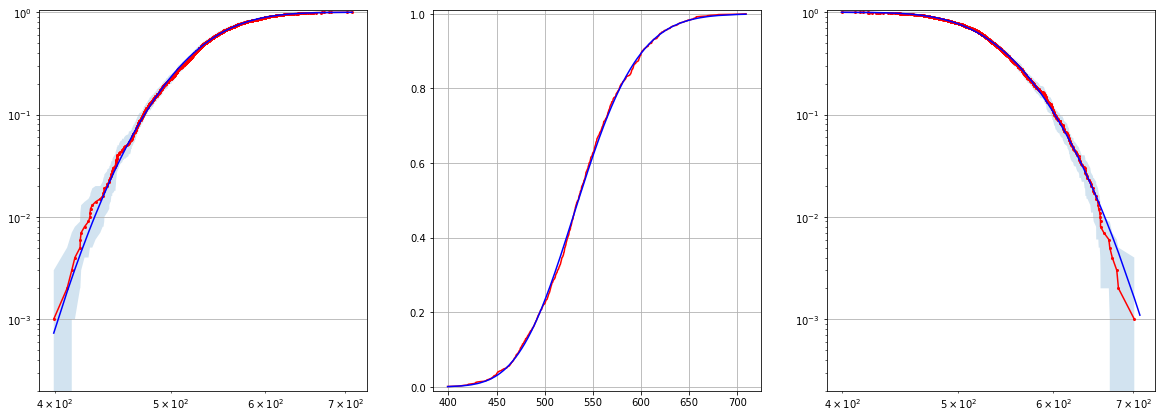



**************************************************************************************************
41 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.00021656502119049757.csv
**************************************************************************************************
lognormal parameters: sigma 0.09754715756981557, mu 6.235706543177219, location 4.978030524581647e-06


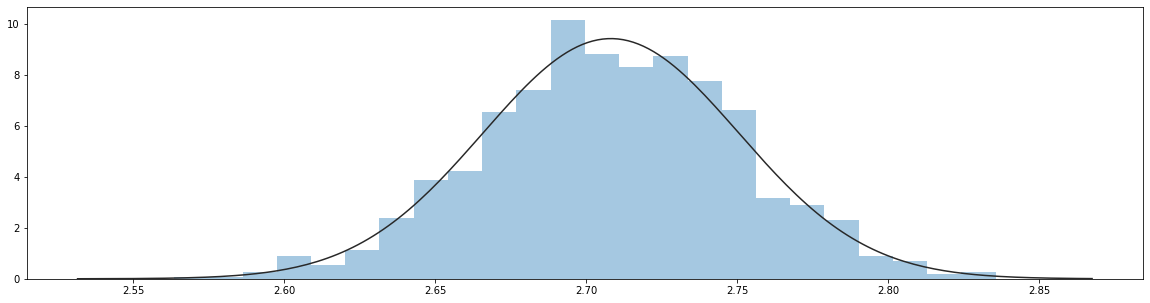

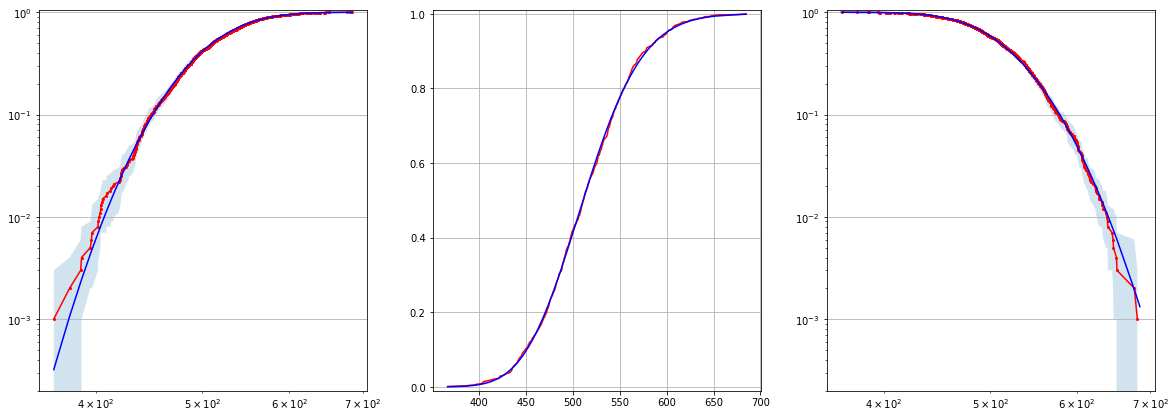



*************************************************************************************************
42 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0002887533615873301.csv
*************************************************************************************************
lognormal parameters: sigma 0.10236227652563198, mu 6.132280116480971, location 31.638240519675048


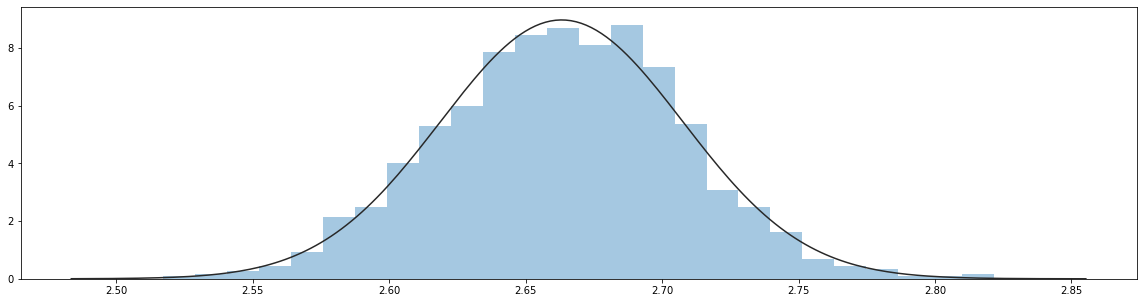

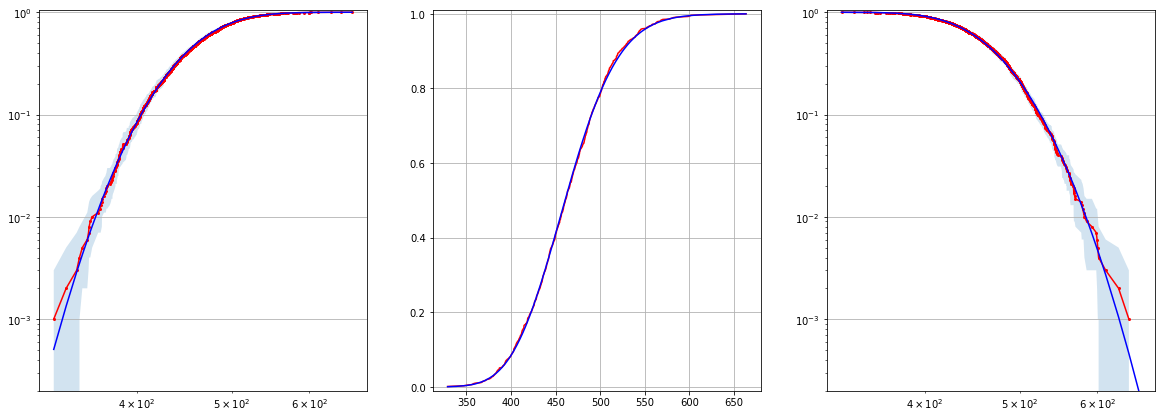



**************************************************************************************************
43 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.00043313004238099514.csv
**************************************************************************************************
lognormal parameters: sigma 0.11127574213811929, mu 5.990385665390894, location 54.430997326055405


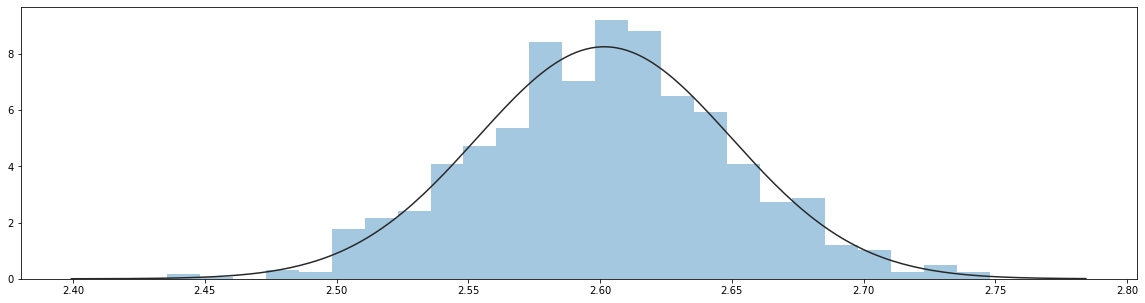

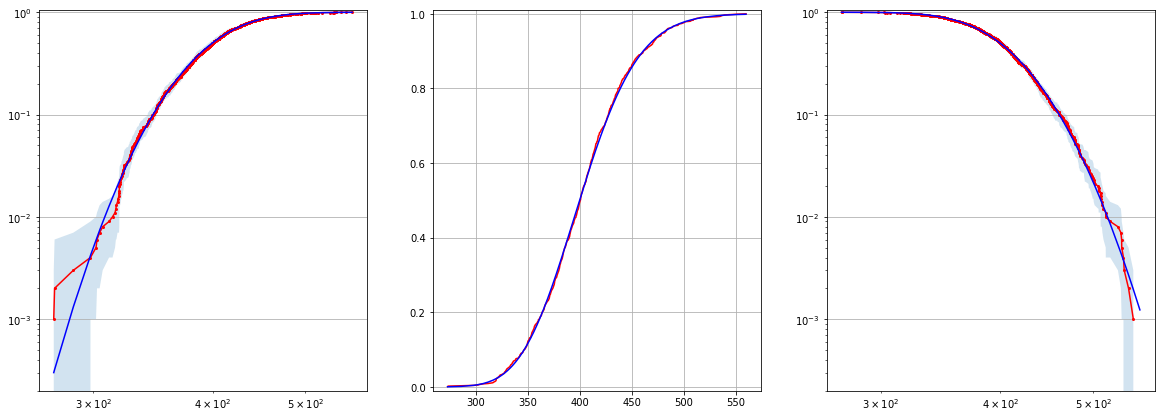



*************************************************************************************************
44 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0005775067231746602.csv
*************************************************************************************************
lognormal parameters: sigma 0.10608621337584218, mu 5.991378168757732, location 32.925795569465066


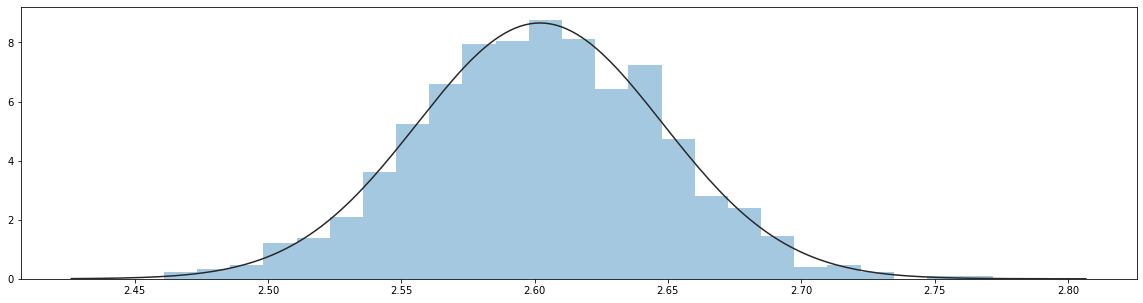

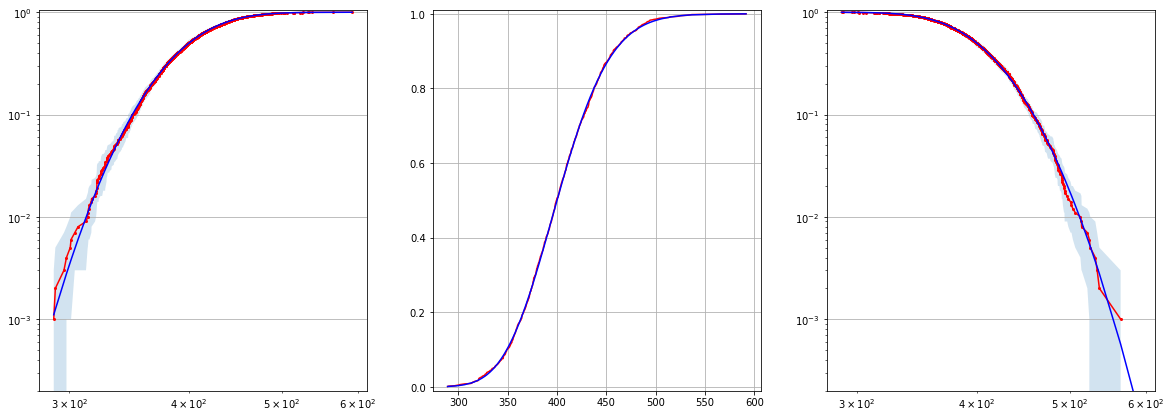



*************************************************************************************************
45 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0007218834039683252.csv
*************************************************************************************************
lognormal parameters: sigma 0.10580292299735435, mu 5.953167991562228, location 26.911650082662618


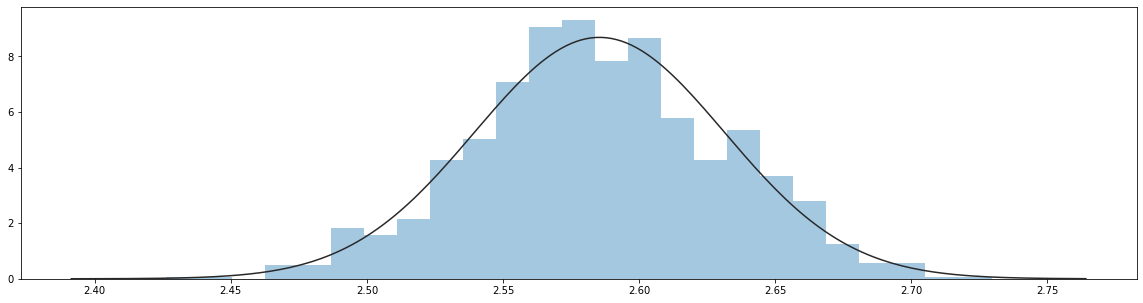

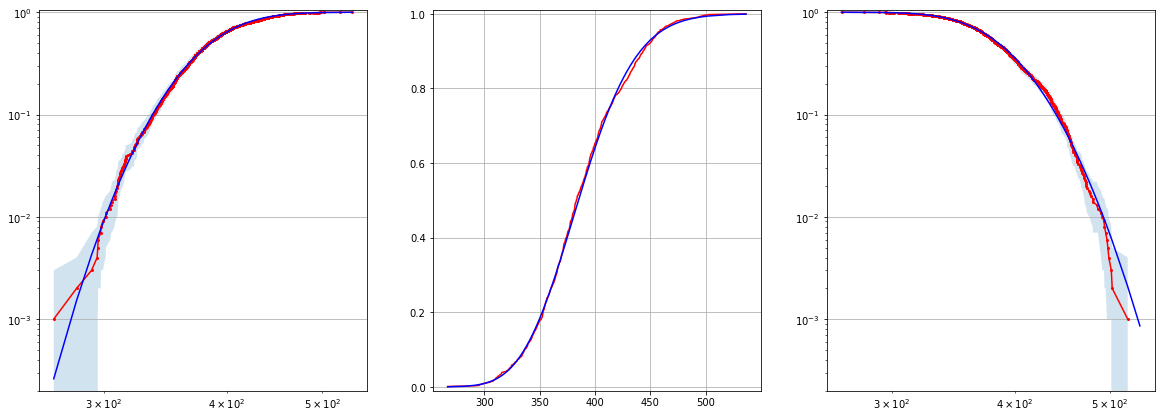



*************************************************************************************************
46 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0008662600847619903.csv
*************************************************************************************************
lognormal parameters: sigma 0.09798174520474467, mu 5.983003007535356, location 6.3397065494897845e-06


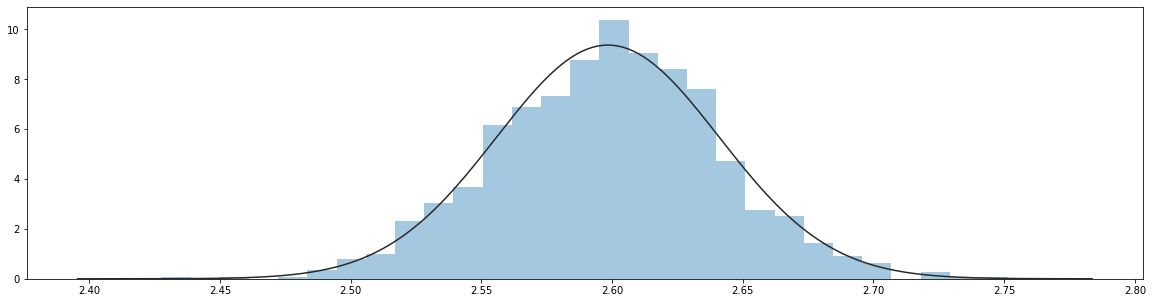

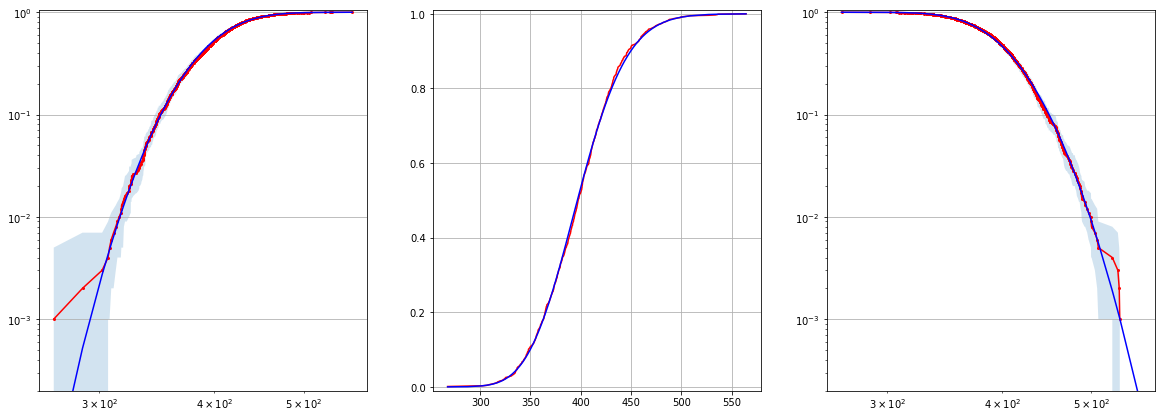



*************************************************************************************************
47 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0010106367655556552.csv
*************************************************************************************************
lognormal parameters: sigma 0.09907651653256948, mu 5.94859890942011, location 5.912503273056604e-06


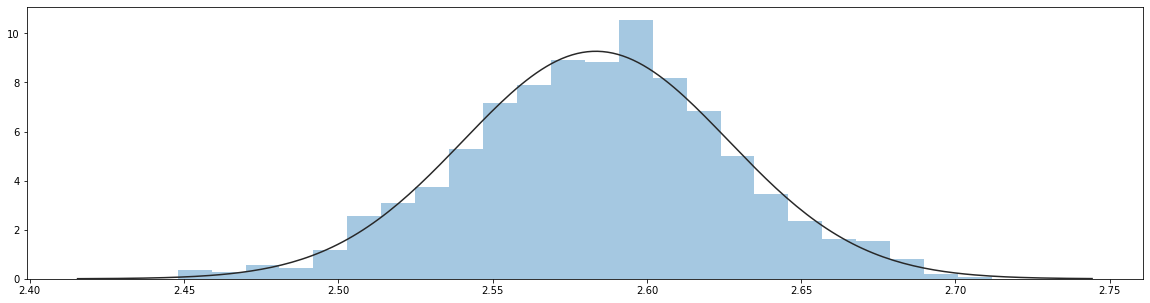

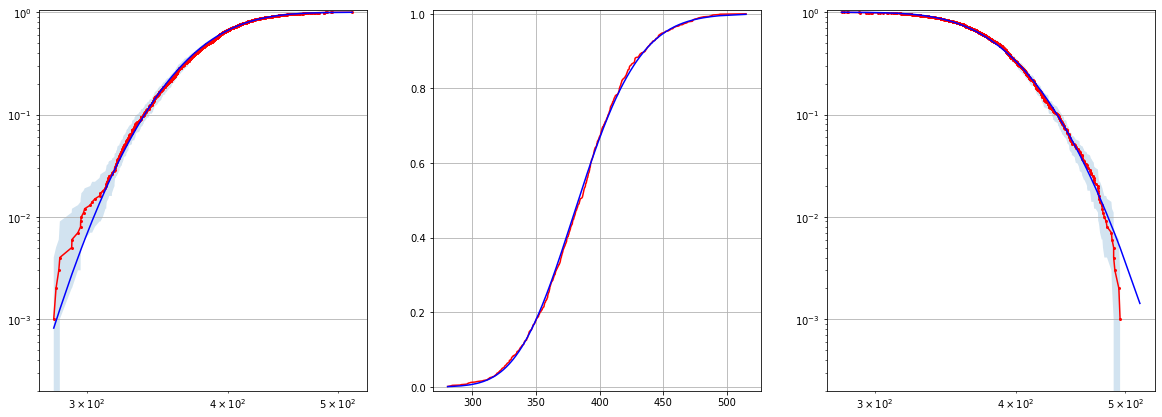



*************************************************************************************************
48 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1973661108/chance0.0011550134463493204.csv
*************************************************************************************************
lognormal parameters: sigma 0.10016833893919289, mu 5.9257628519823395, location 4.871405734488047e-06


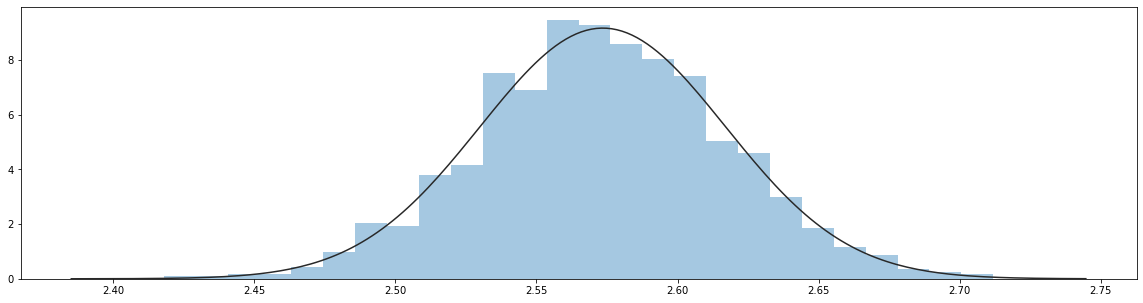

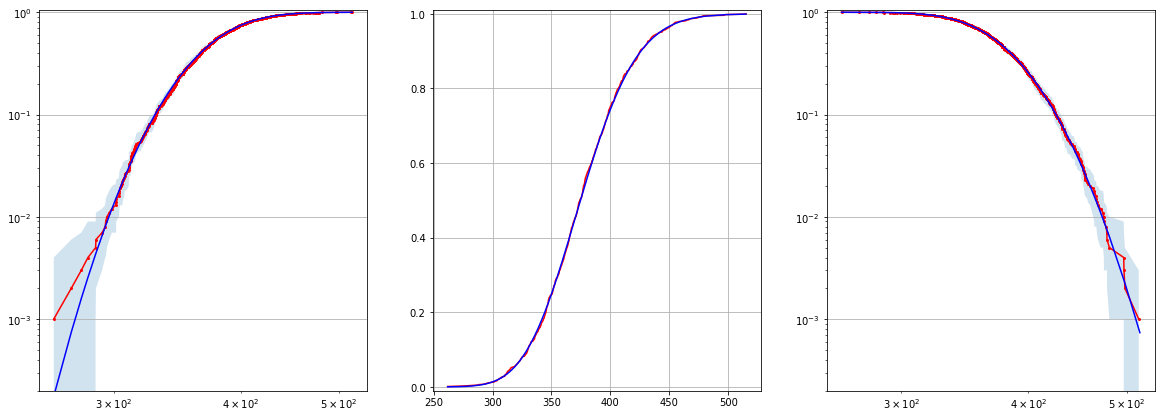



************************************************************************************************
49 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance8.493547695058509e-06.csv
************************************************************************************************
lognormal parameters: sigma 0.24341715278044296, mu 11.141172983480278, location 17796.379339977913


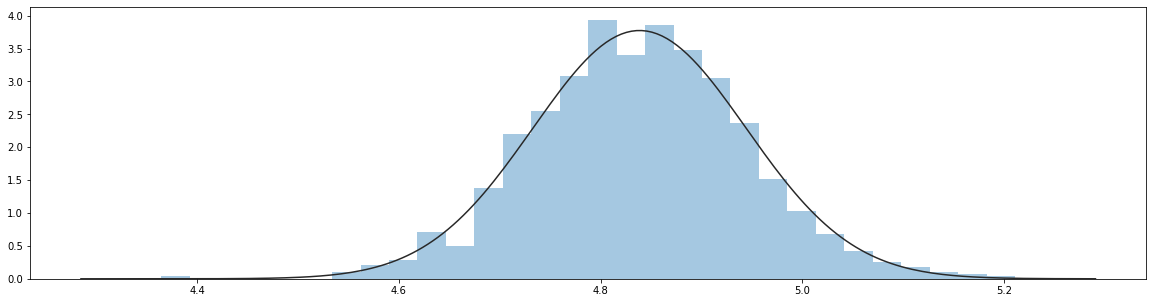

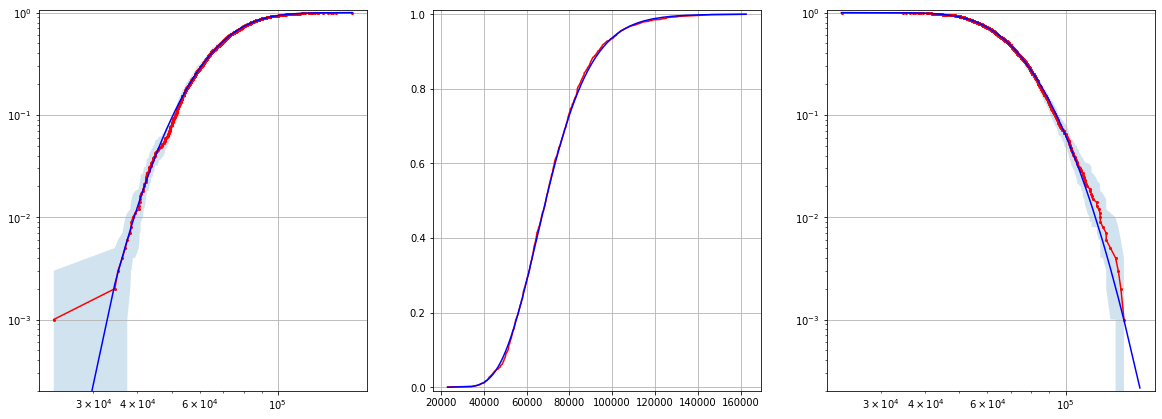



*************************************************************************************************
50 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance1.6987095390117018e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.3007134619924048, mu 11.156985795974302, location 14974.717966057633


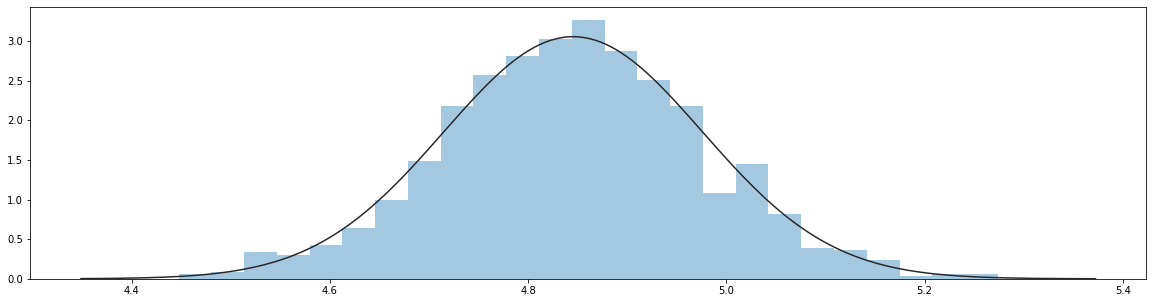

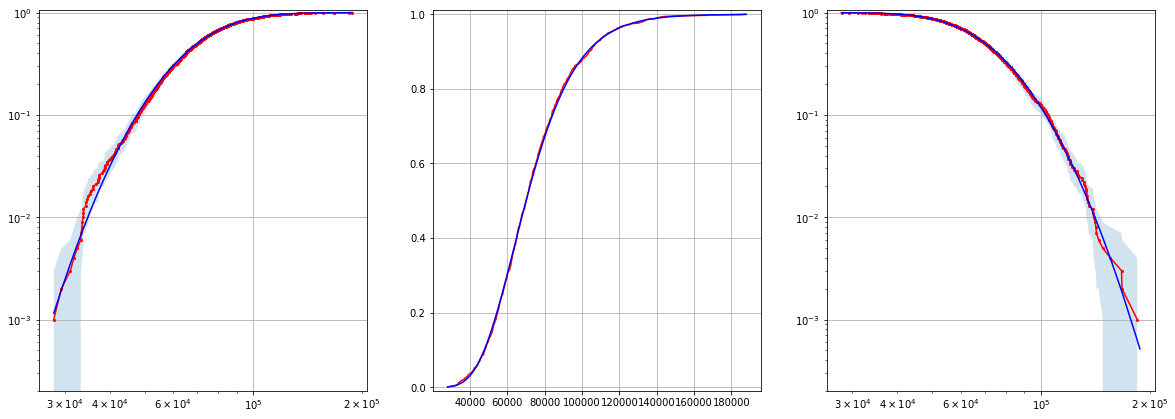



*************************************************************************************************
51 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance3.3974190780234035e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.29414609208297454, mu 11.361817486471093, location 5.637093051496379e-06


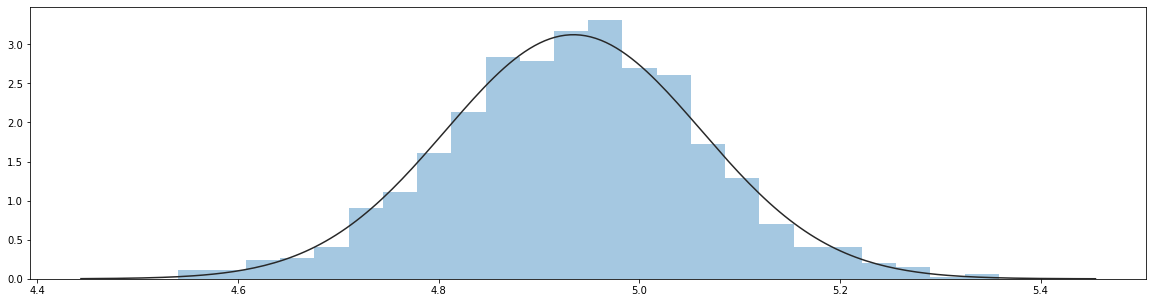

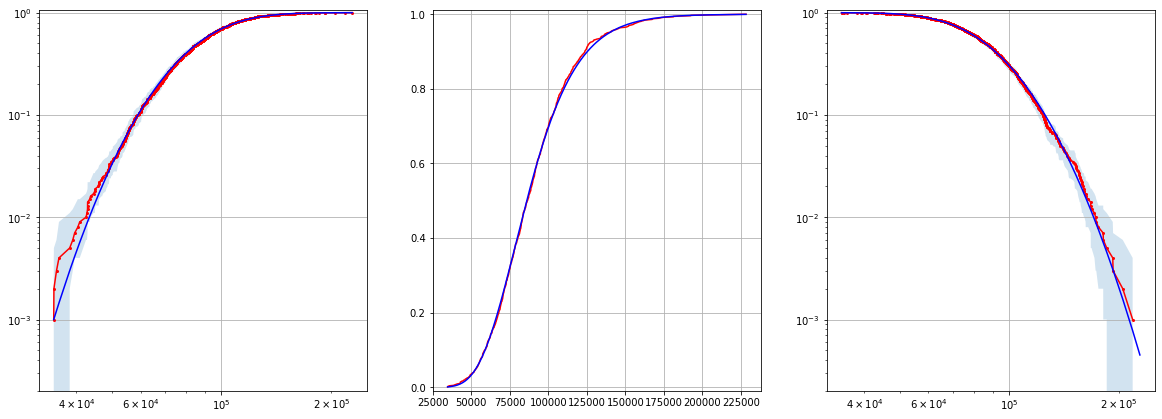



*************************************************************************************************
52 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance5.0961286170351056e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.3267102175571782, mu 11.3322607251465, location 2030.2763120441357


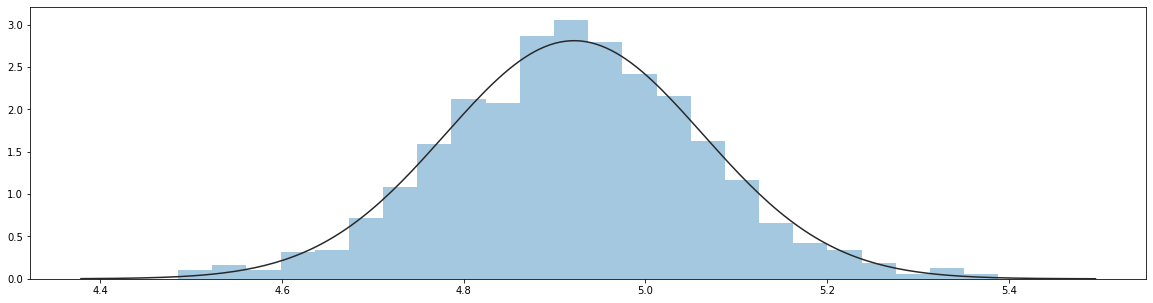

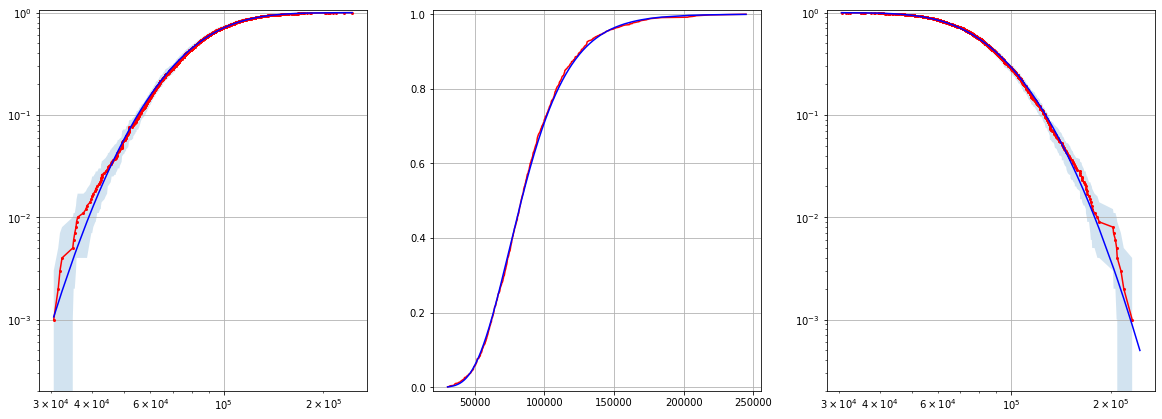



************************************************************************************************
53 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance6.794838156046807e-05.csv
************************************************************************************************
lognormal parameters: sigma 0.35449185382747156, mu 11.325977093393234, location 4041.973040458003


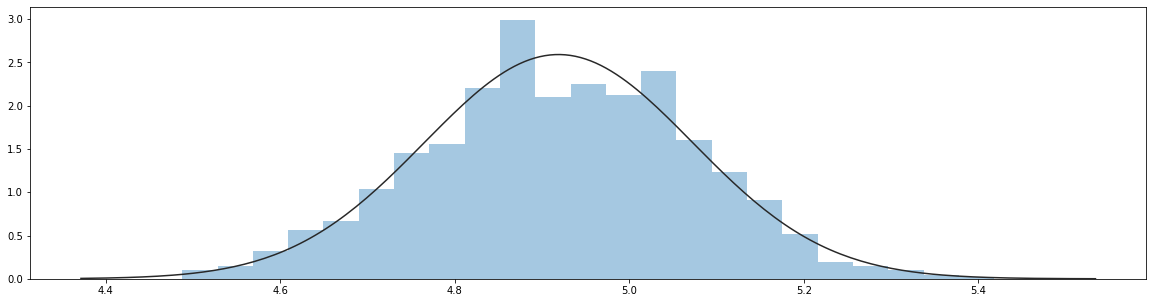

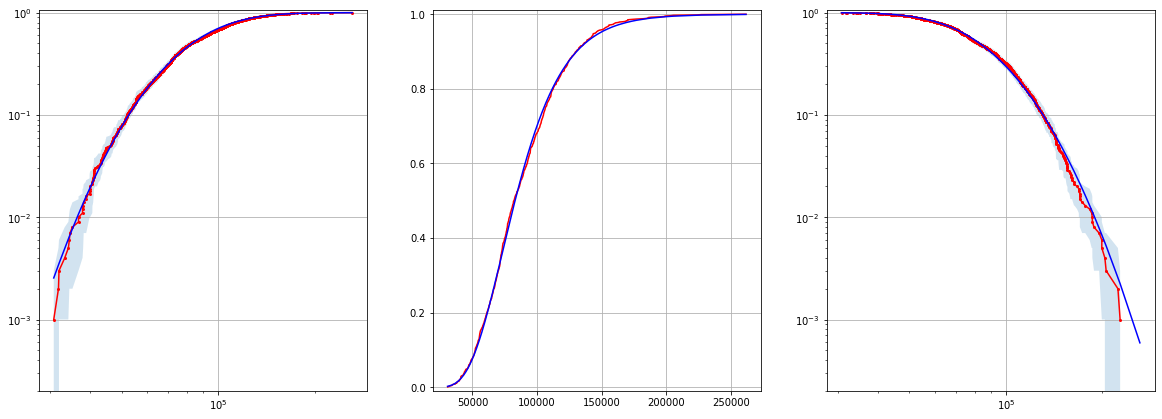



*************************************************************************************************
54 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00010192257234070211.csv
*************************************************************************************************
lognormal parameters: sigma 0.3609216949078817, mu 11.37230711735537, location 3643.4982294071588


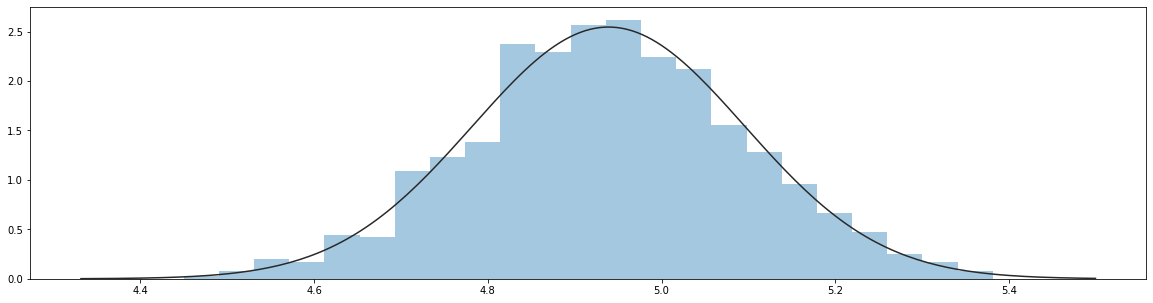

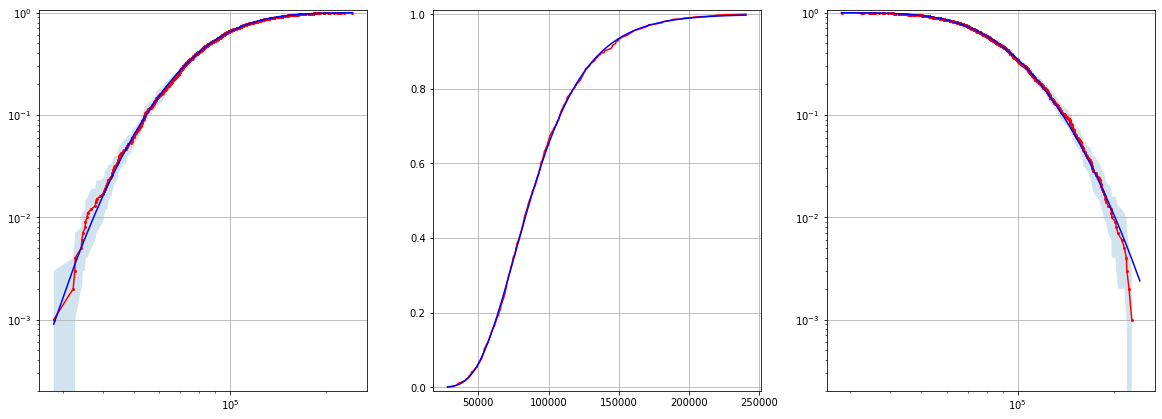



*************************************************************************************************
55 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00013589676312093614.csv
*************************************************************************************************
lognormal parameters: sigma 0.3772251523189576, mu 11.40990088917712, location 8001.547033603373


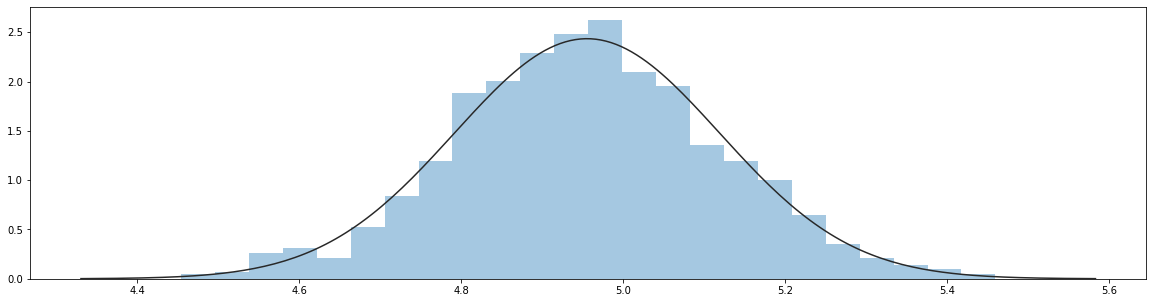

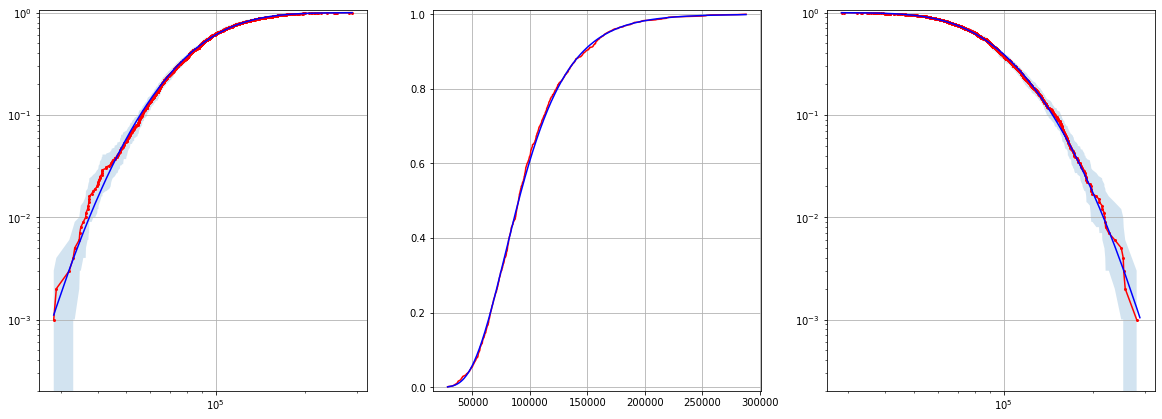



*************************************************************************************************
56 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00016987095390117018.csv
*************************************************************************************************
lognormal parameters: sigma 0.33753516096240815, mu 11.575393337370366, location 5.68188856785826e-06


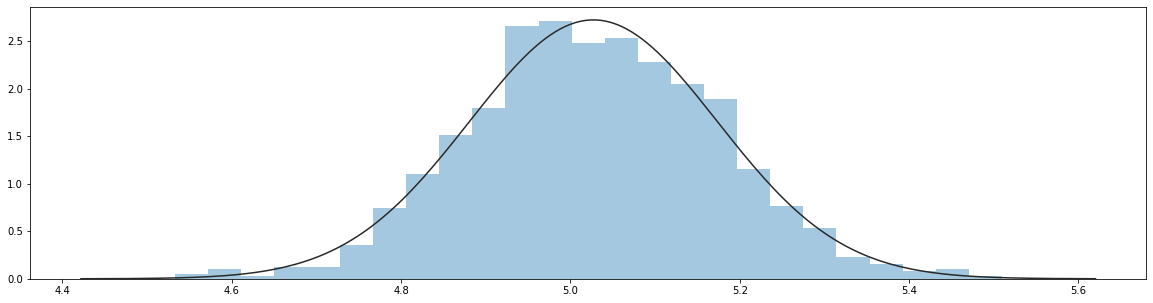

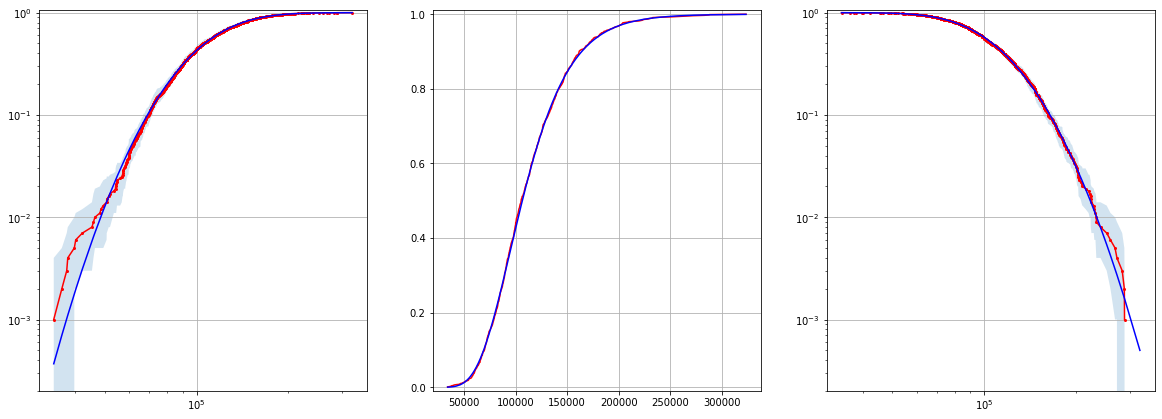



*************************************************************************************************
57 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00020384514468140422.csv
*************************************************************************************************
lognormal parameters: sigma 0.35039510233576937, mu 11.640974392329433, location 6.591955996090354e-06


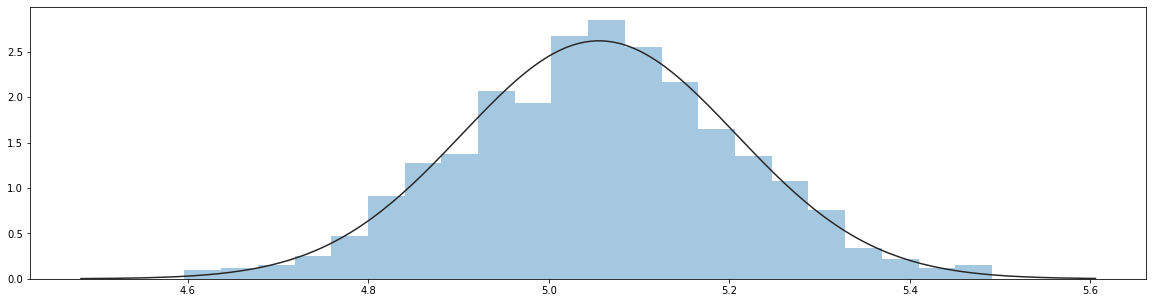

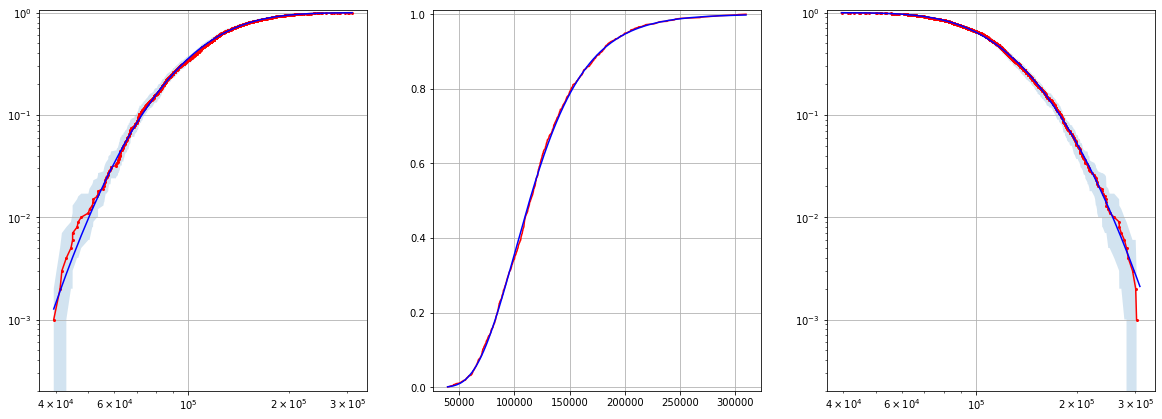



*************************************************************************************************
58 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.00023781933546163824.csv
*************************************************************************************************
lognormal parameters: sigma 0.3253501227195348, mu 11.70291455499932, location 6.539619198555329e-06


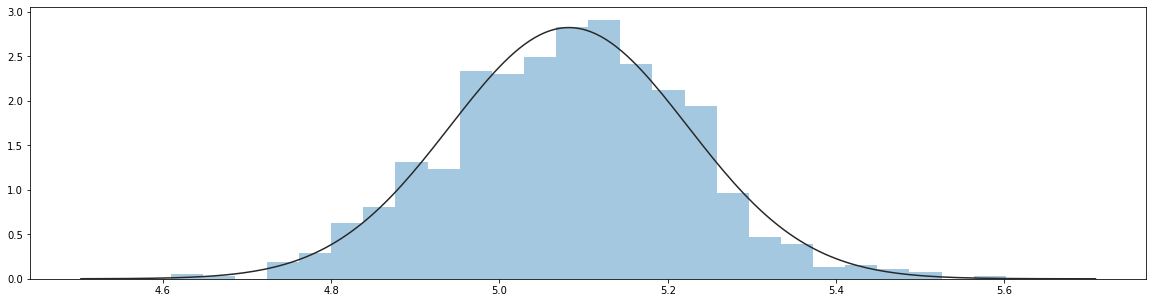

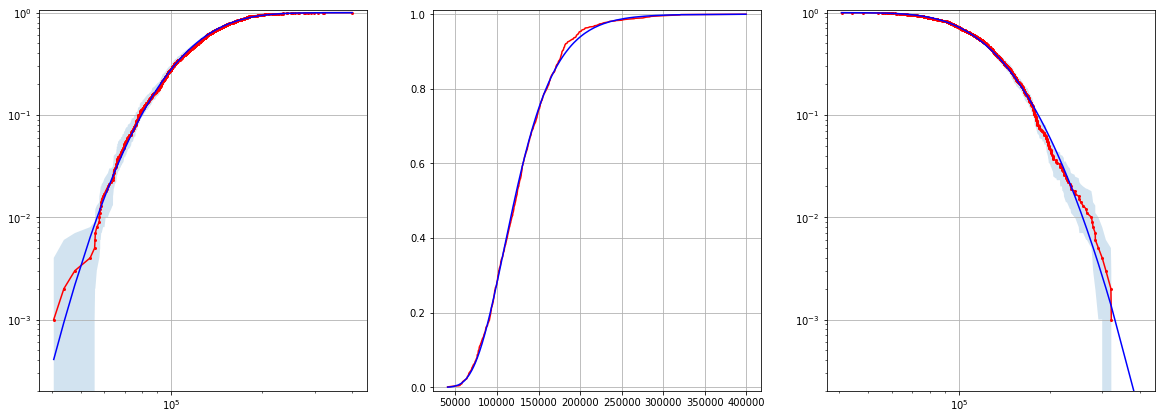



************************************************************************************************
59 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed750534797/chance0.0002717935262418723.csv
************************************************************************************************
lognormal parameters: sigma 0.33111118988089794, mu 11.756617405915676, location 5.536525040815575e-06


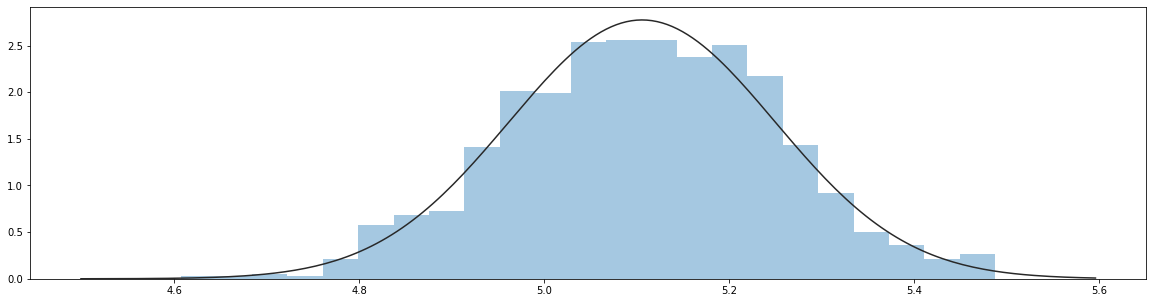

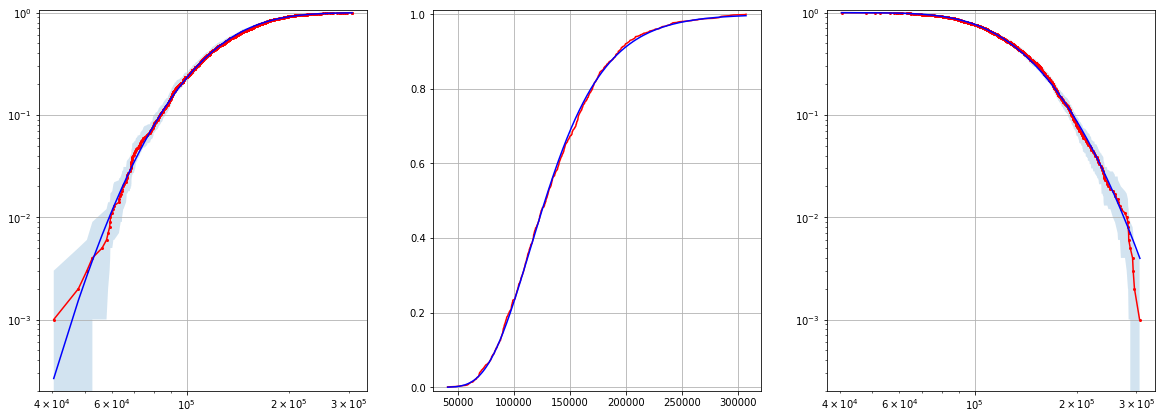



************************************************************************************************
60 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance1.50208917332205e-05.csv
************************************************************************************************
lognormal parameters: sigma 0.12443665263014114, mu 8.139303629078608, location 6.562777080881675e-06


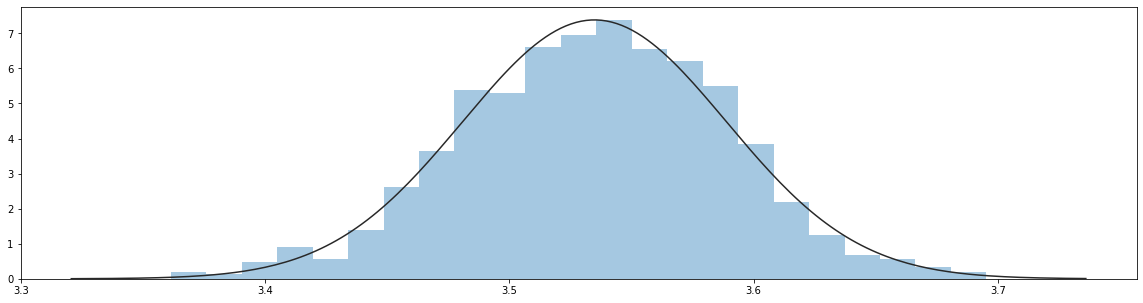

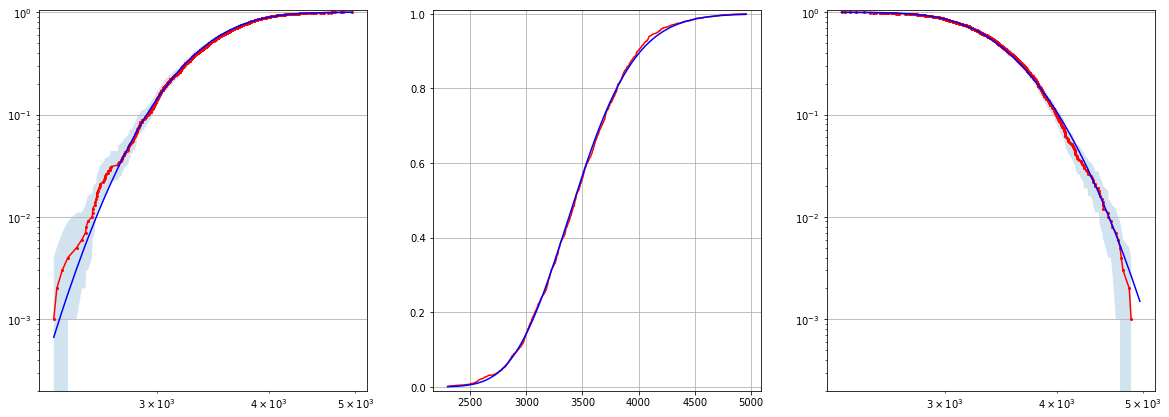



***********************************************************************************************
61 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance3.0041783466441e-05.csv
***********************************************************************************************
lognormal parameters: sigma 0.13513184840793047, mu 8.018637260364098, location 4.1001303247667395e-06


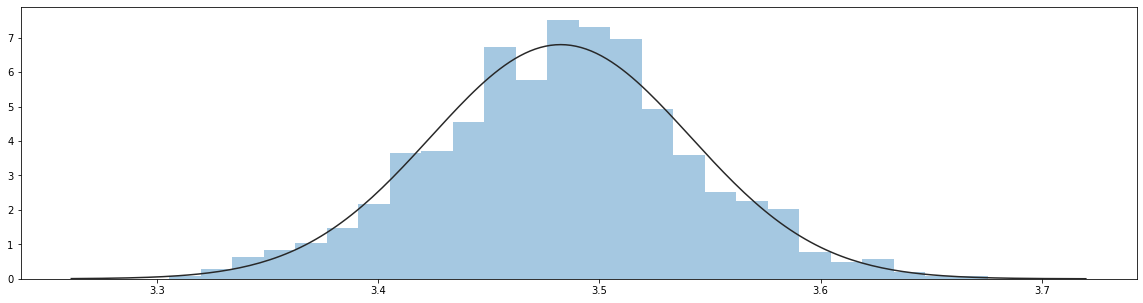

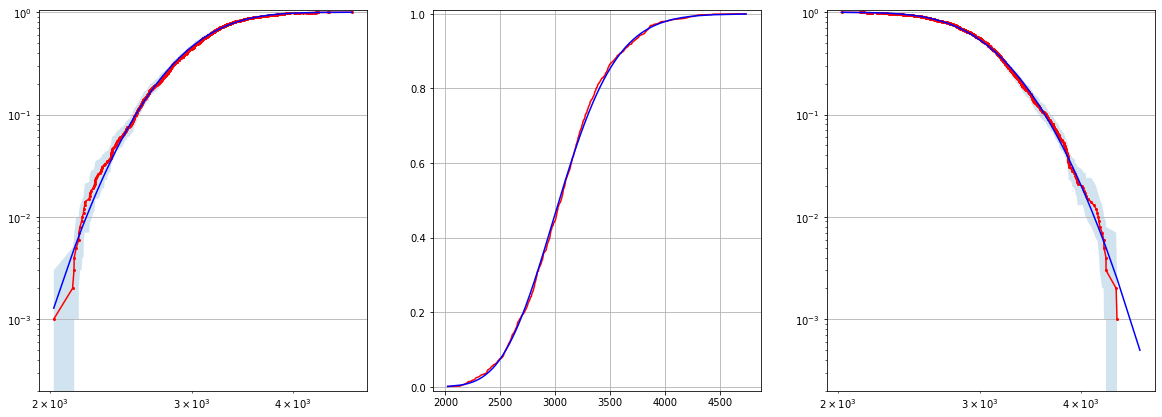



***********************************************************************************************
62 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance6.0083566932882e-05.csv
***********************************************************************************************
lognormal parameters: sigma 0.15688719010091898, mu 7.851346265325168, location 14.278028549494016


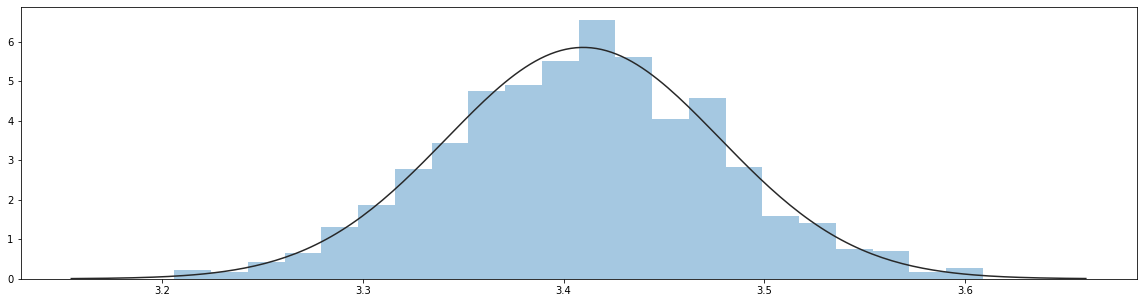

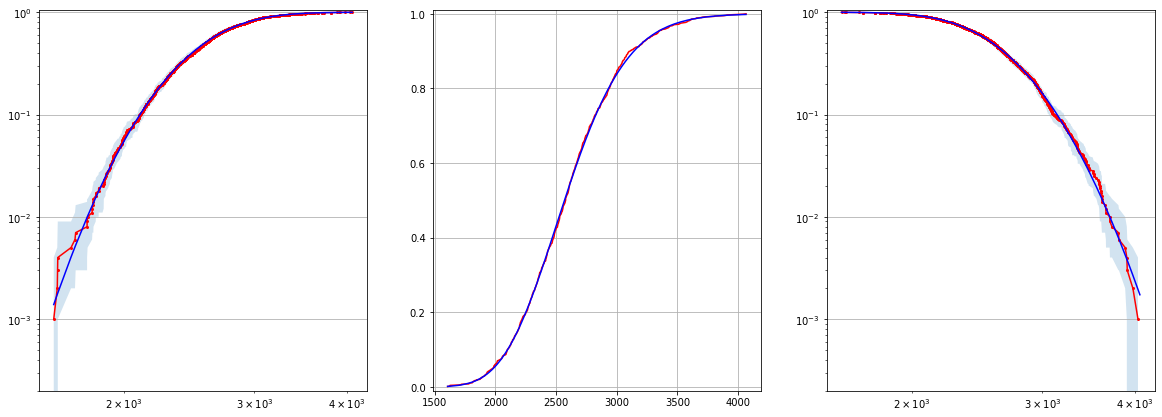



***********************************************************************************************
63 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance9.0125350399323e-05.csv
***********************************************************************************************
lognormal parameters: sigma 0.1640152873802189, mu 7.717368744608348, location 3.839914946500657e-06


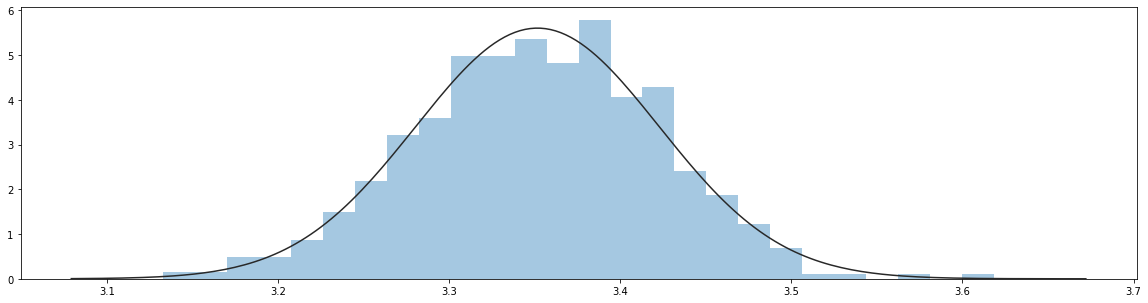

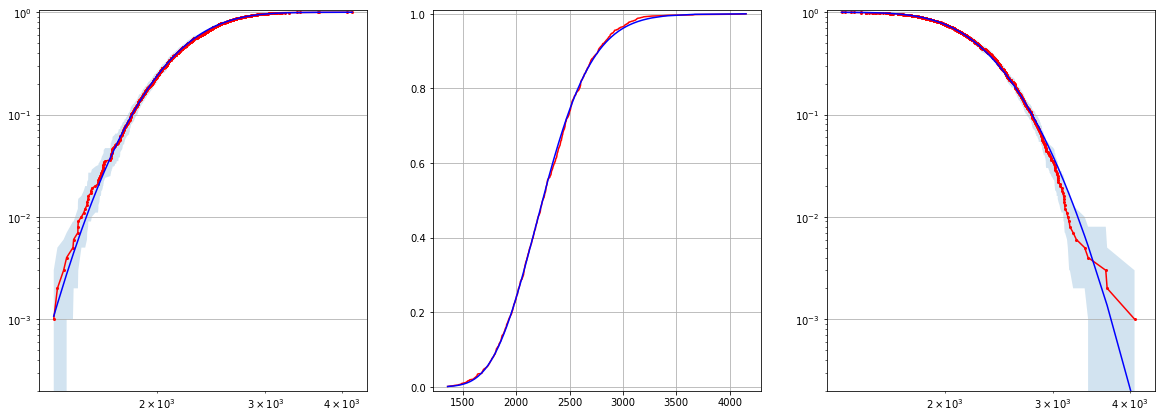



************************************************************************************************
64 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000120167133865764.csv
************************************************************************************************
lognormal parameters: sigma 0.17649207439216855, mu 7.498149766128516, location 195.3405862462503


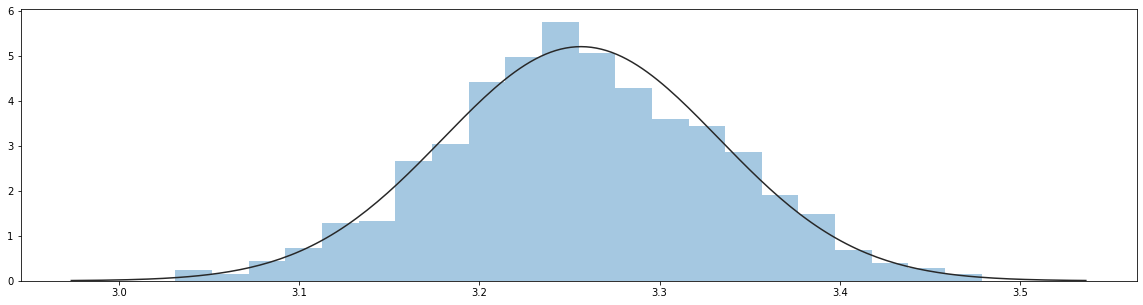

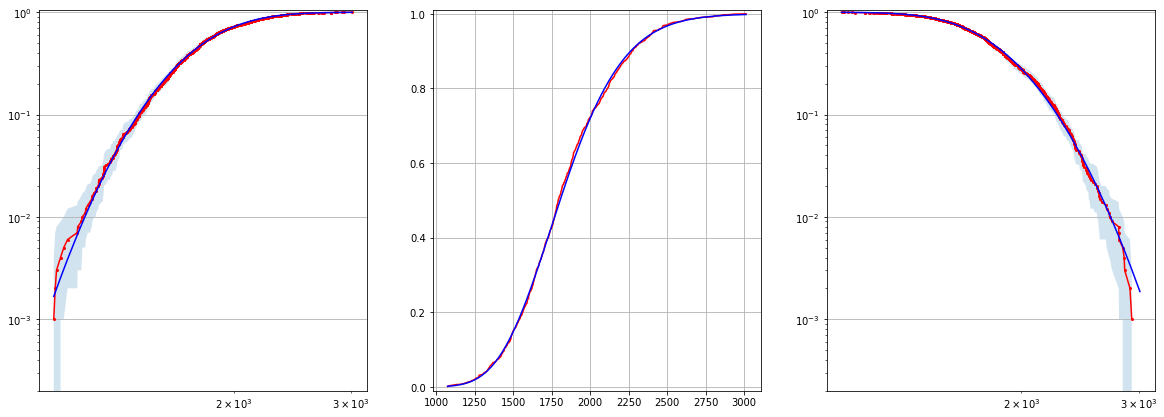



************************************************************************************************
65 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000180250700798646.csv
************************************************************************************************
lognormal parameters: sigma 0.20233198125126062, mu 7.263362584280567, location 279.7020596294313


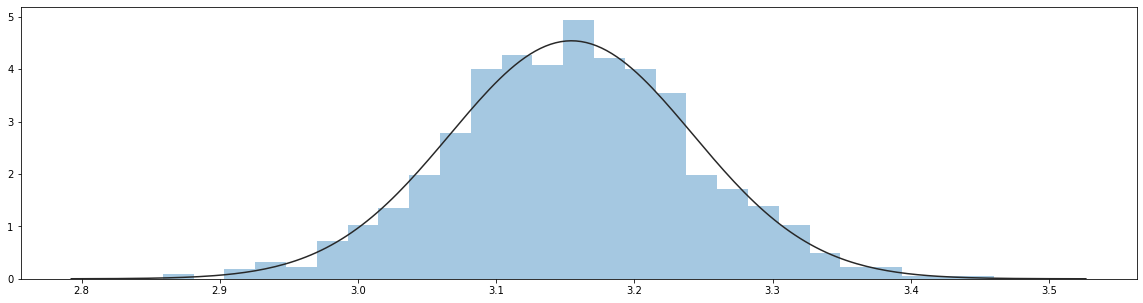

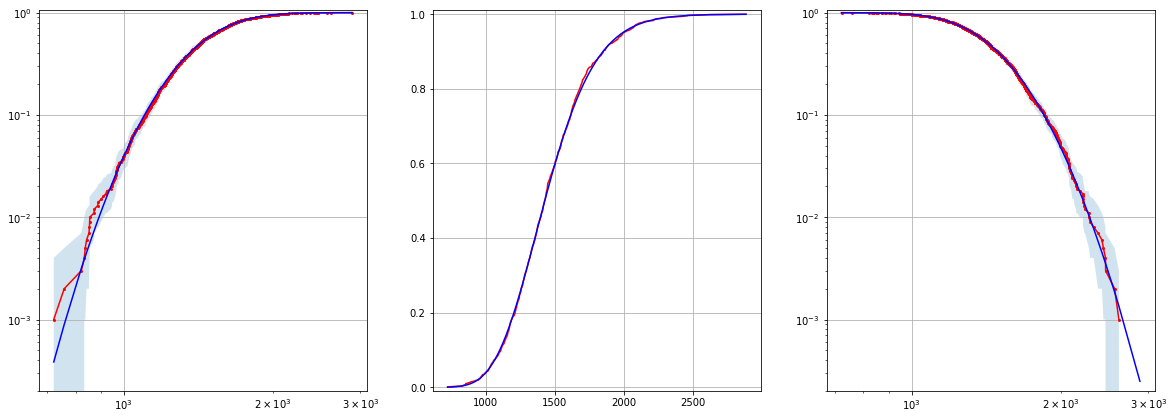



************************************************************************************************
66 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000240334267731528.csv
************************************************************************************************
lognormal parameters: sigma 0.19175799132364837, mu 7.153117581554047, location 236.75327776776692


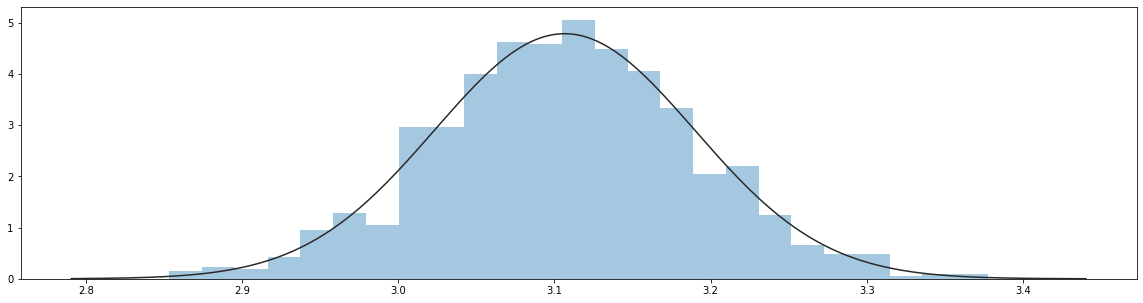

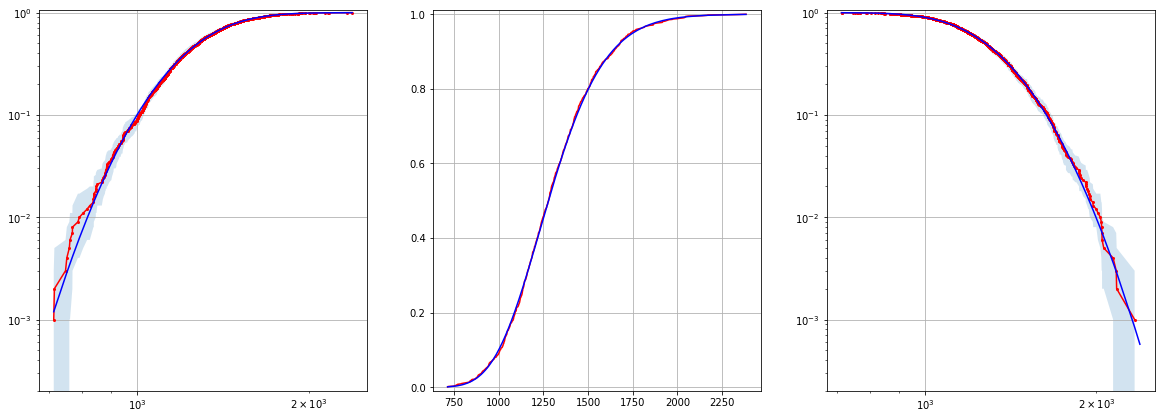



***********************************************************************************************
67 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.00030041783466441.csv
***********************************************************************************************
lognormal parameters: sigma 0.21348457606910823, mu 6.9914392213934065, location 297.11692841664023


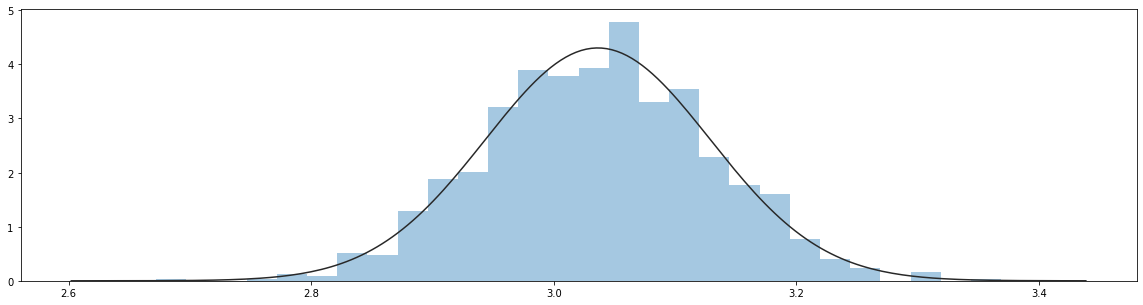

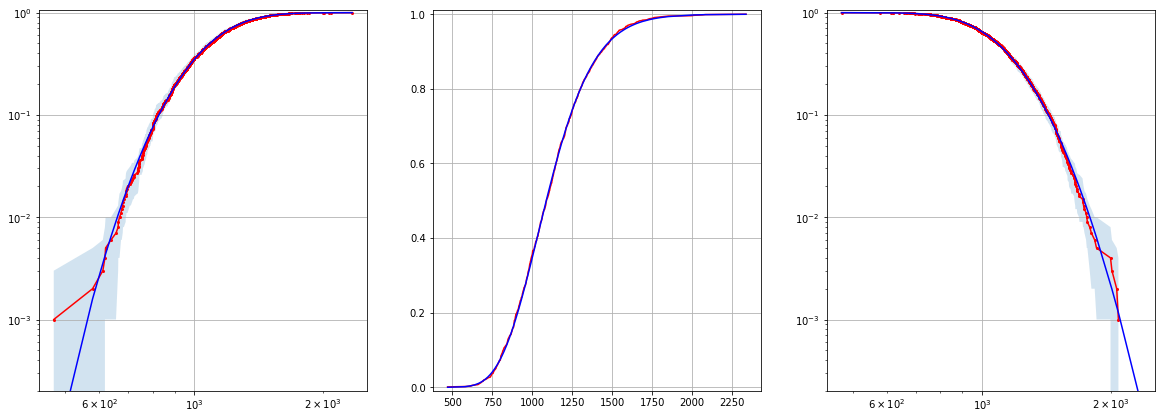



************************************************************************************************
68 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000360501401597292.csv
************************************************************************************************
lognormal parameters: sigma 0.22514318046337398, mu 6.882824733295314, location 313.92510258416127


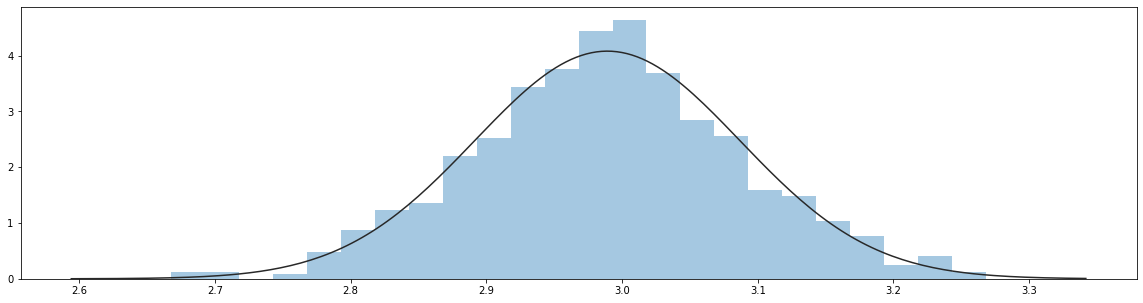

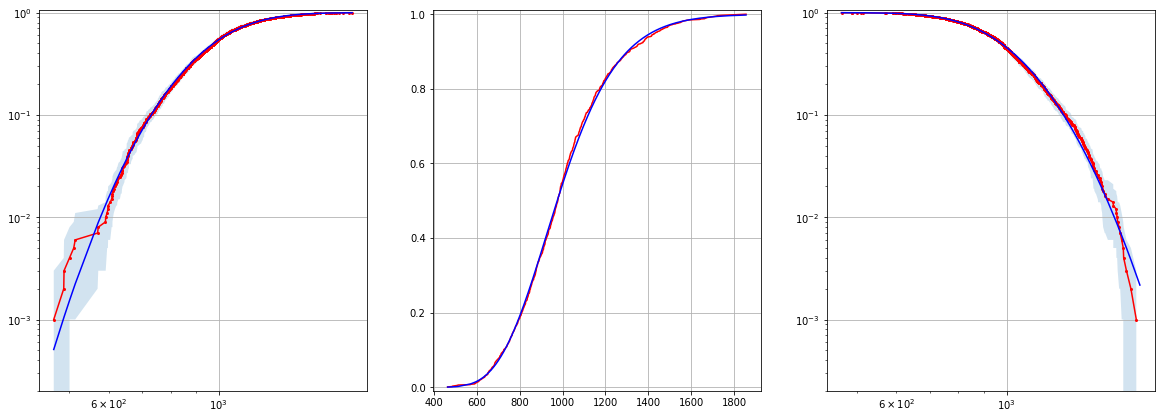



**************************************************************************************************
69 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.00042058496853017397.csv
**************************************************************************************************
lognormal parameters: sigma 0.17421061131538668, mu 7.049549629251595, location 69.42753382478057


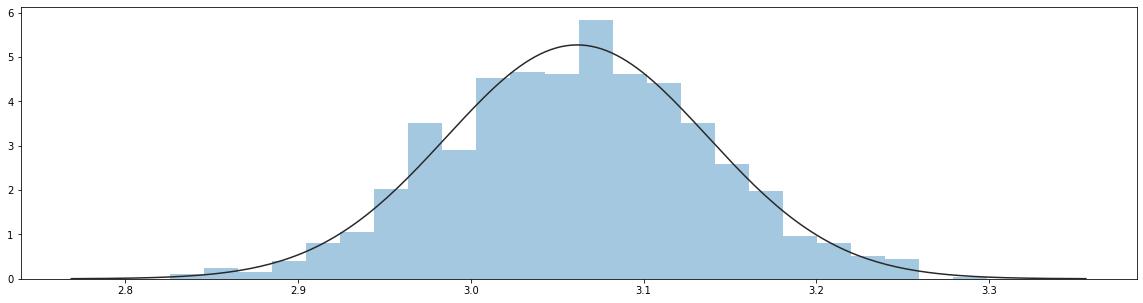

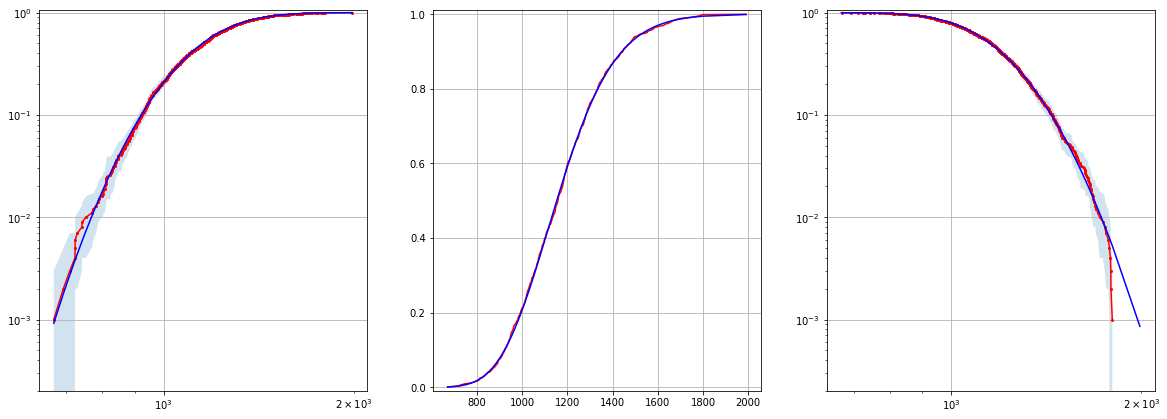



************************************************************************************************
70 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3143739854/chance0.000480668535463056.csv
************************************************************************************************
lognormal parameters: sigma 0.1613348226486174, mu 7.070826675113689, location 3.927930586812835e-06


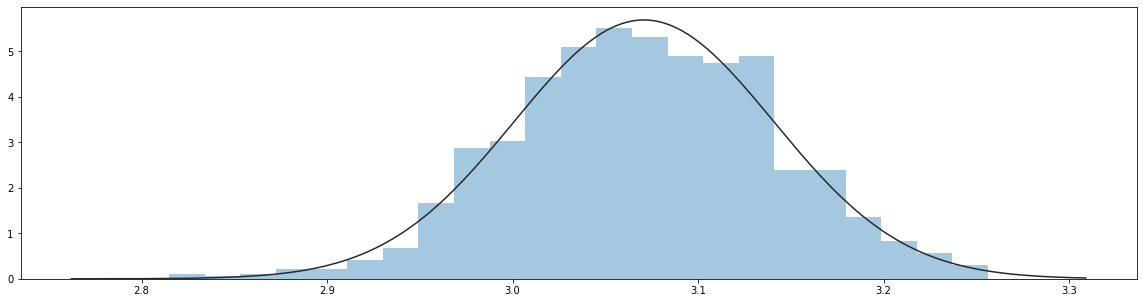

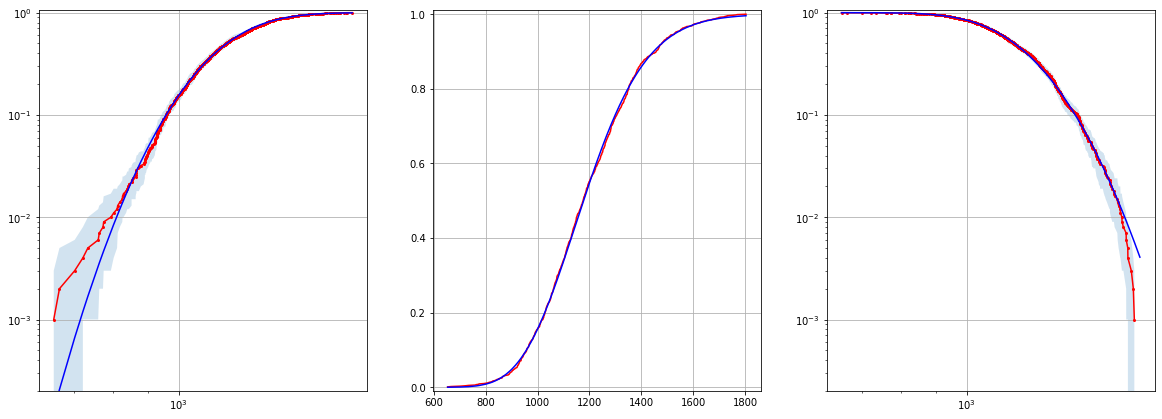



**************************************************************************************************
71 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance1.9451202139084314e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.12594343417088844, mu 6.631781418165206, location 161.23410094914095


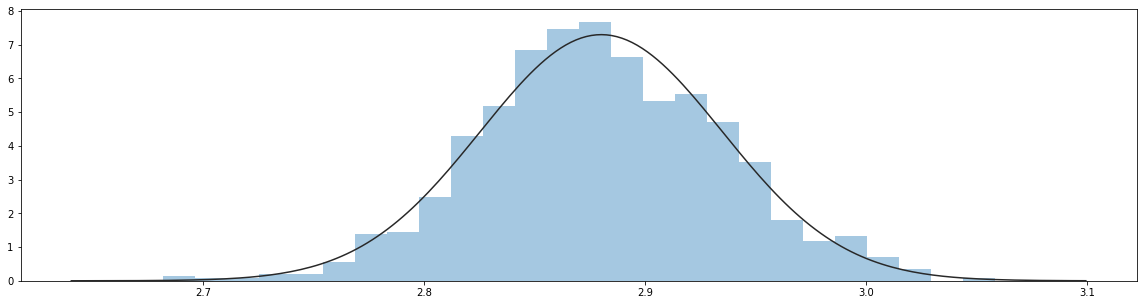

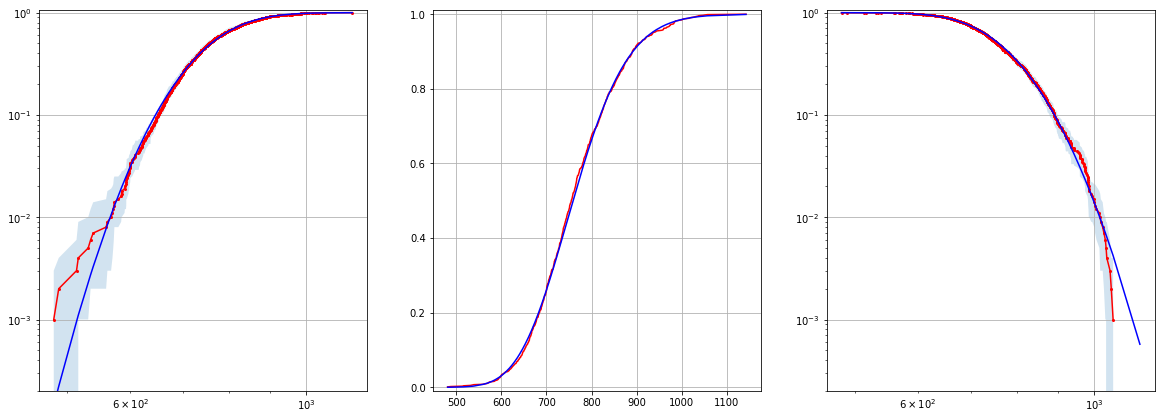



*************************************************************************************************
72 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance3.890240427816863e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.10766699100345713, mu 6.774236083627808, location 5.7867706636005805e-06


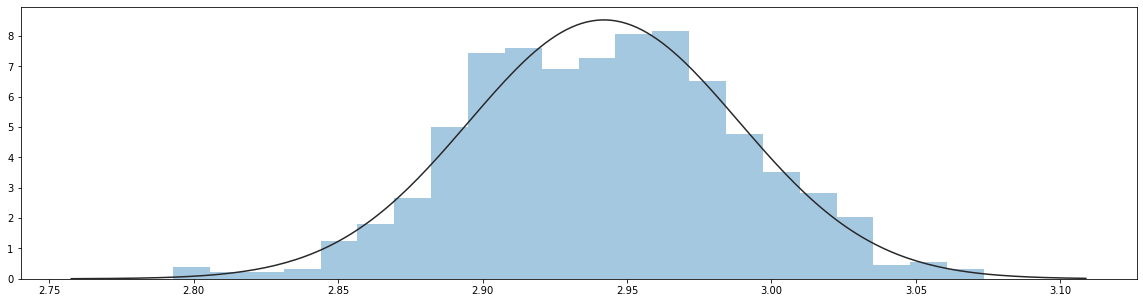

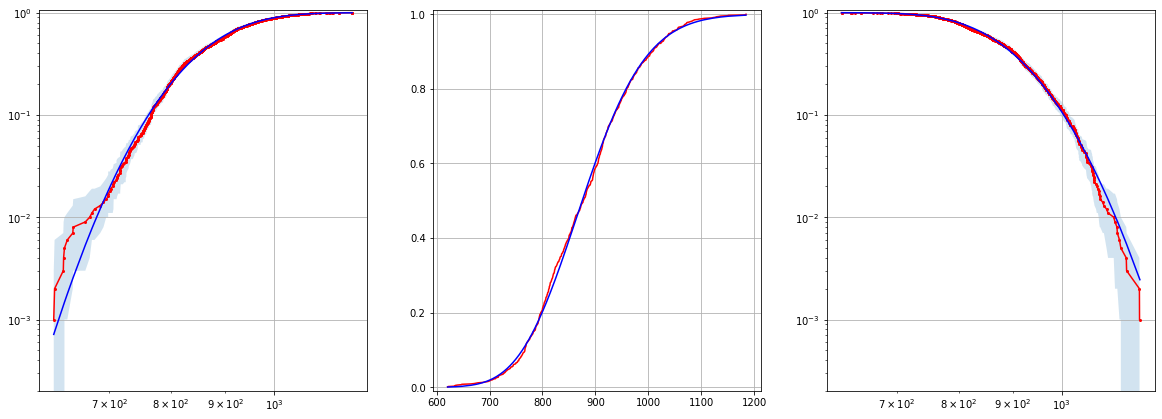



*************************************************************************************************
73 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance7.780480855633726e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.1688040068751792, mu 6.289448935035961, location 260.1750194170169


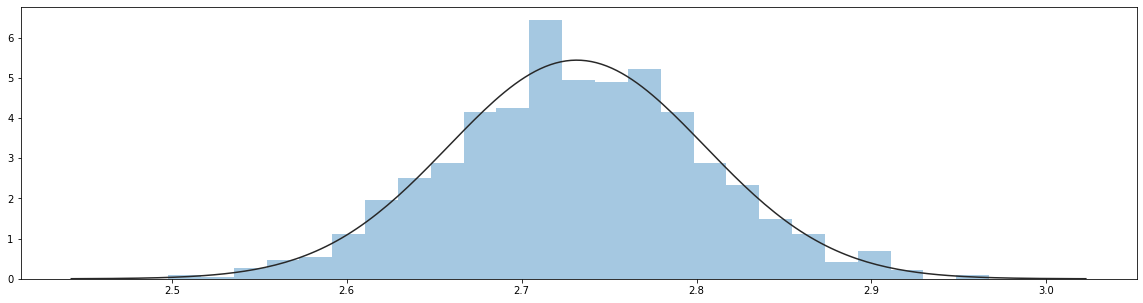

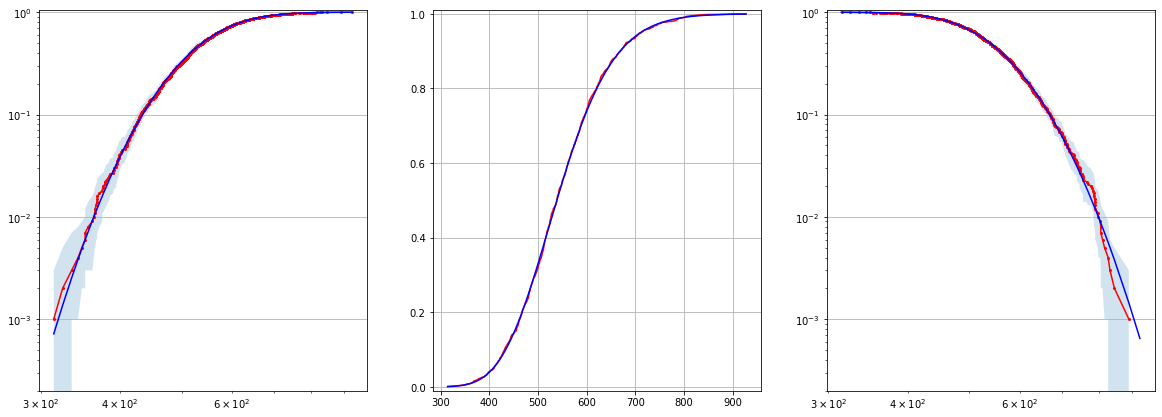



**************************************************************************************************
74 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.00011670721283450587.csv
**************************************************************************************************
lognormal parameters: sigma 0.18962825830301183, mu 6.1744363332532215, location 270.64459183875994


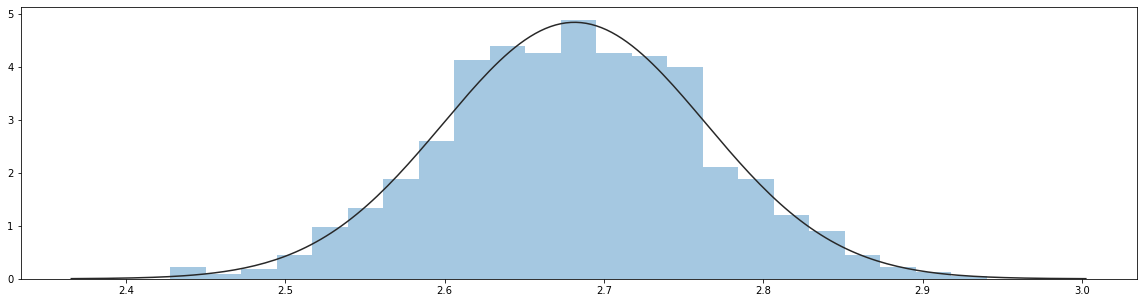

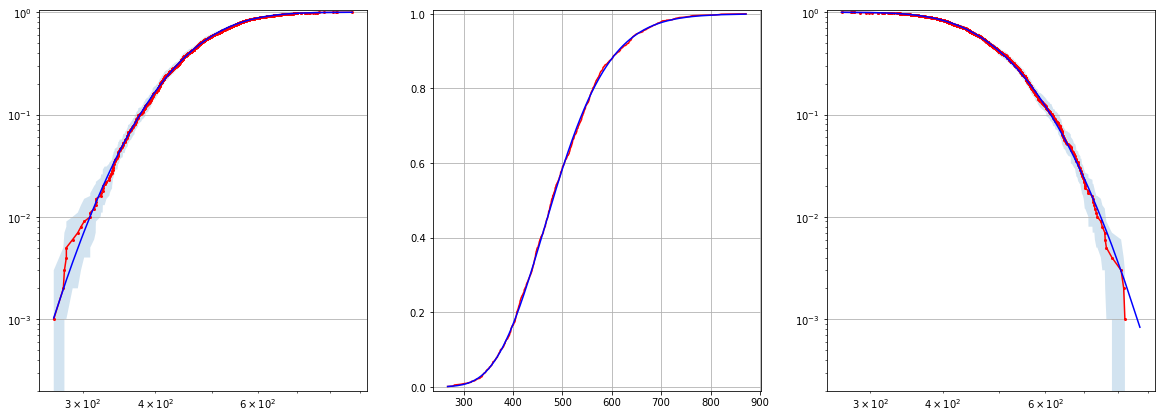



*************************************************************************************************
75 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.0001556096171126745.csv
*************************************************************************************************
lognormal parameters: sigma 0.18787724781429457, mu 6.171941587773083, location 230.9183343956491


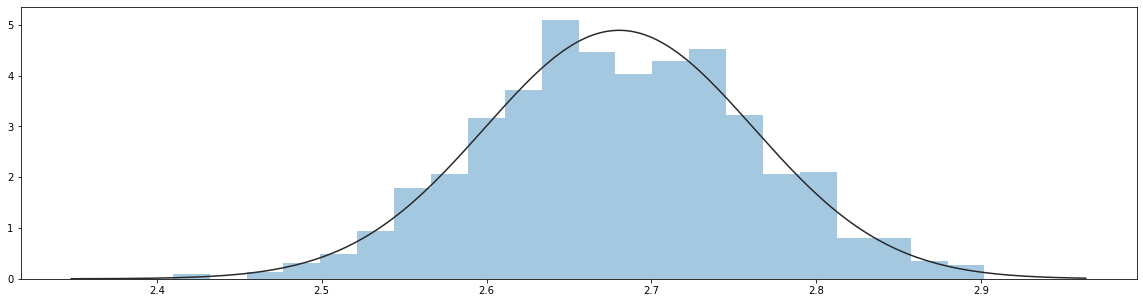

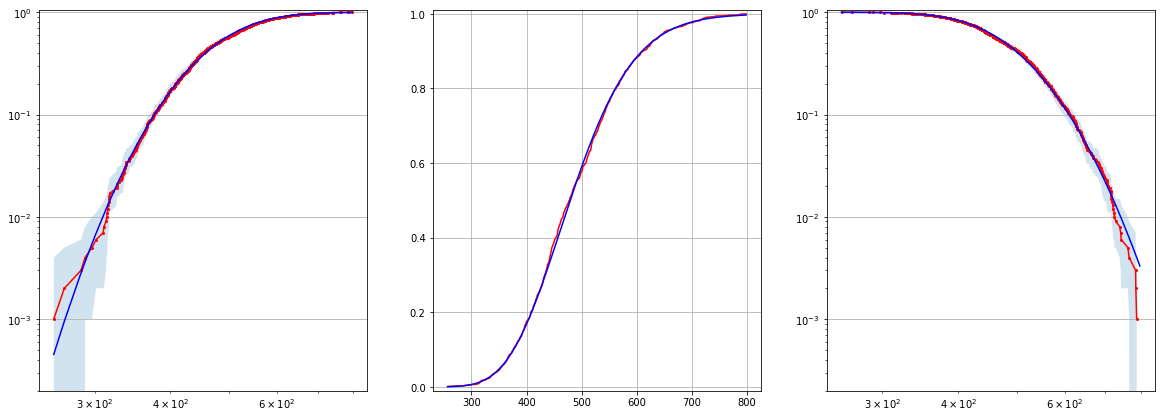



**************************************************************************************************
76 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.00023341442566901174.csv
**************************************************************************************************
lognormal parameters: sigma 0.15557688467765055, mu 6.262250744687455, location 137.6995426493477


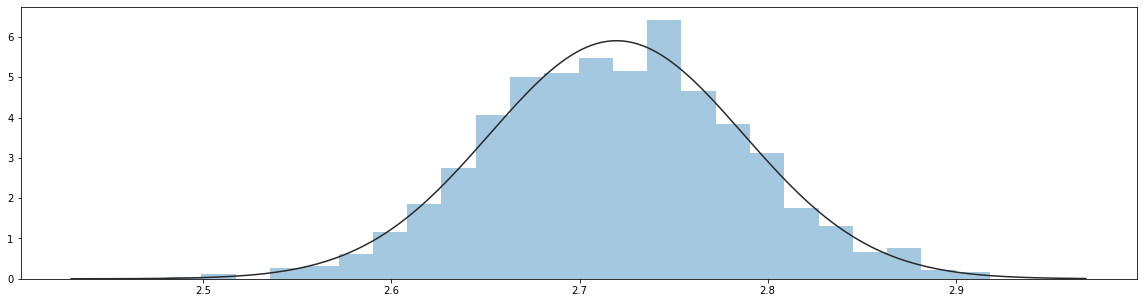

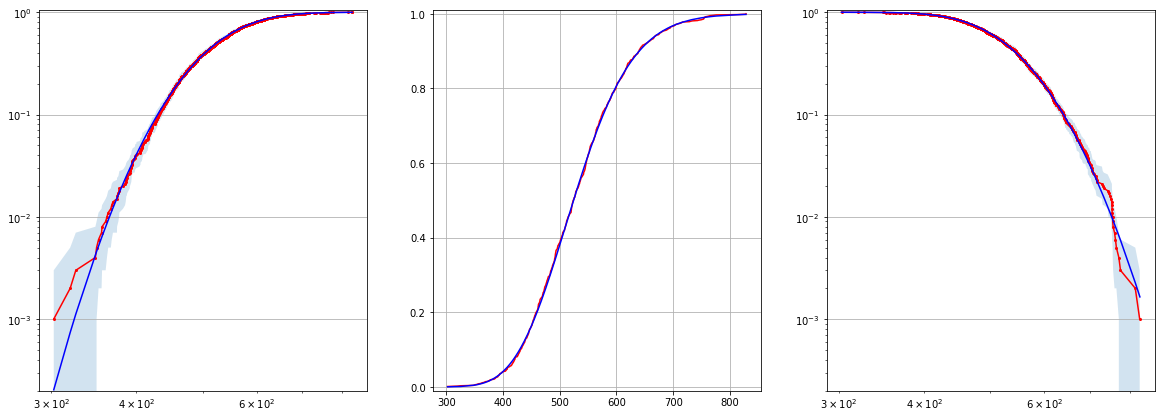



************************************************************************************************
77 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.000311219234225349.csv
************************************************************************************************
lognormal parameters: sigma 0.16044529453747444, mu 6.2121256157807005, location 131.58811945617813


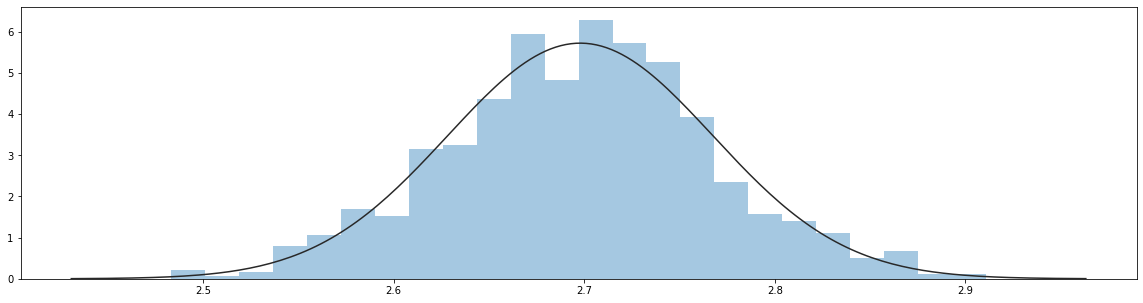

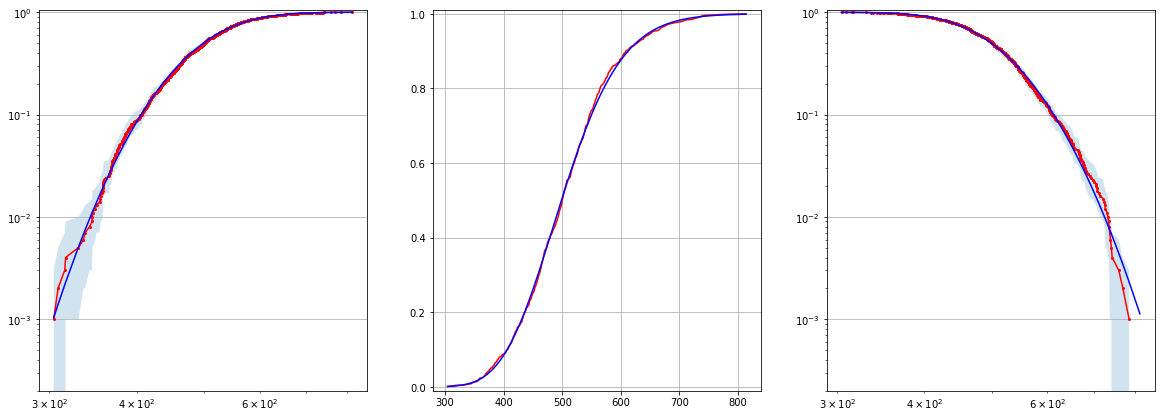



**************************************************************************************************
78 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.00038902404278168626.csv
**************************************************************************************************
lognormal parameters: sigma 0.12753487583219814, mu 6.39311315026019, location 4.961071634373524e-06


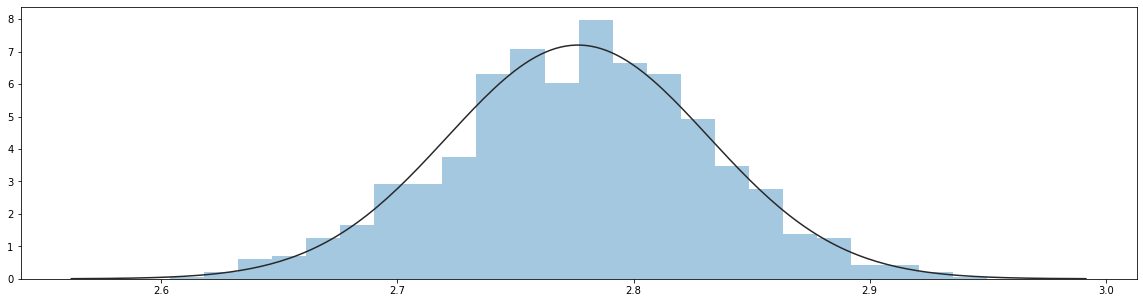

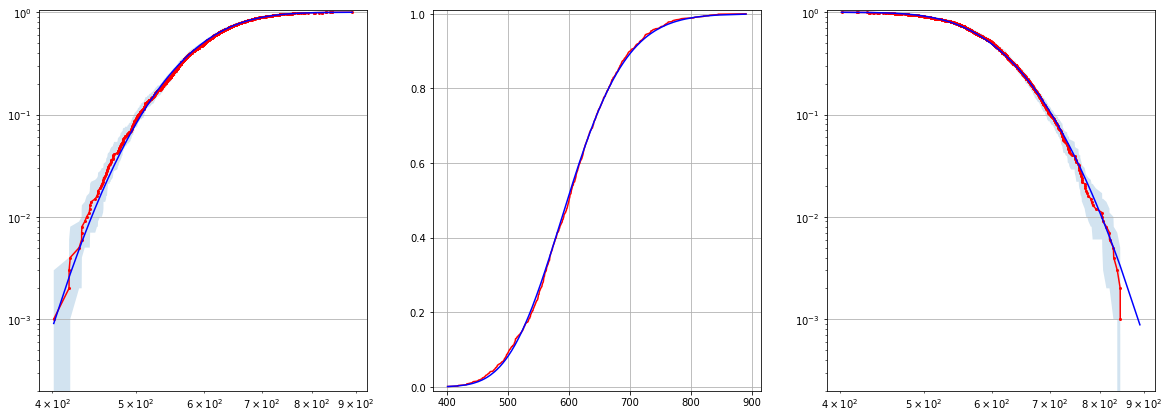



*************************************************************************************************
79 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.0004668288513380235.csv
*************************************************************************************************
lognormal parameters: sigma 0.11804792513374708, mu 6.367503794177058, location 5.630888284731839e-06


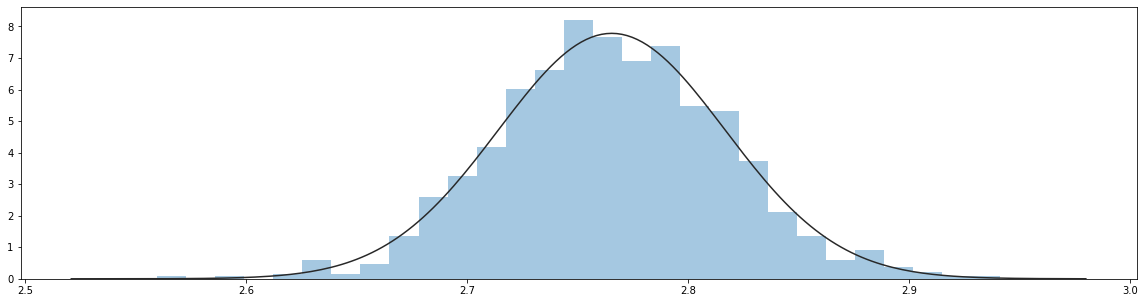

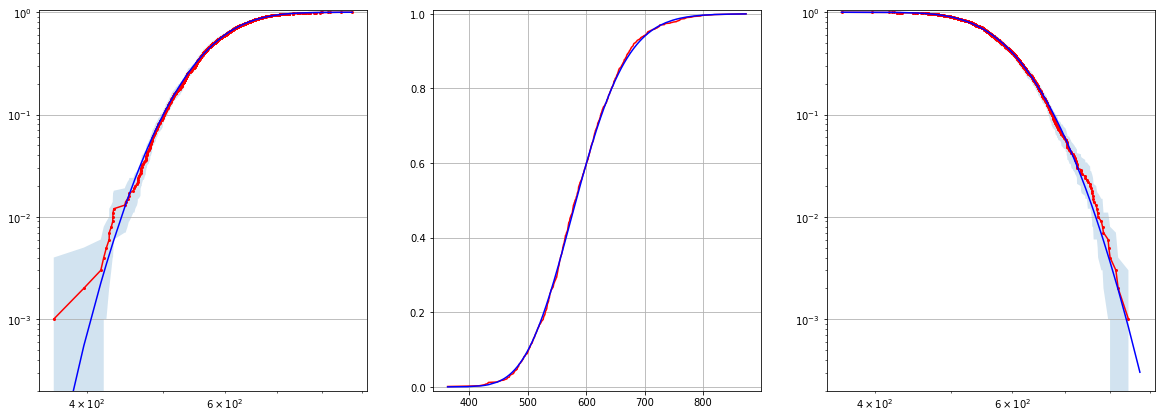



*************************************************************************************************
80 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.0005446336598943607.csv
*************************************************************************************************
lognormal parameters: sigma 0.14805384121336265, mu 6.200825354243906, location 72.75402798642902


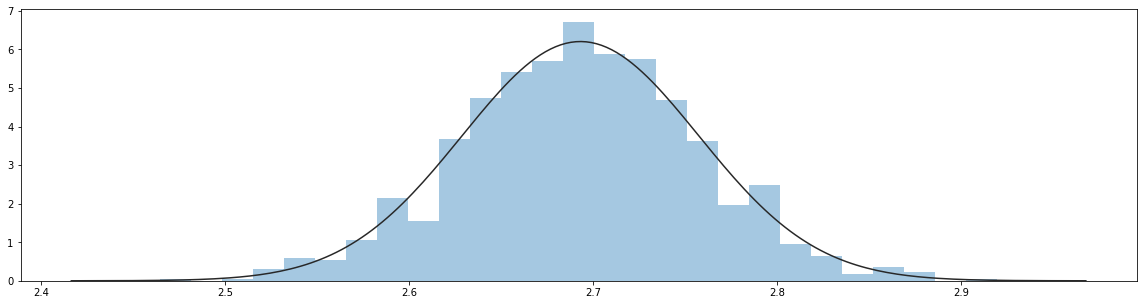

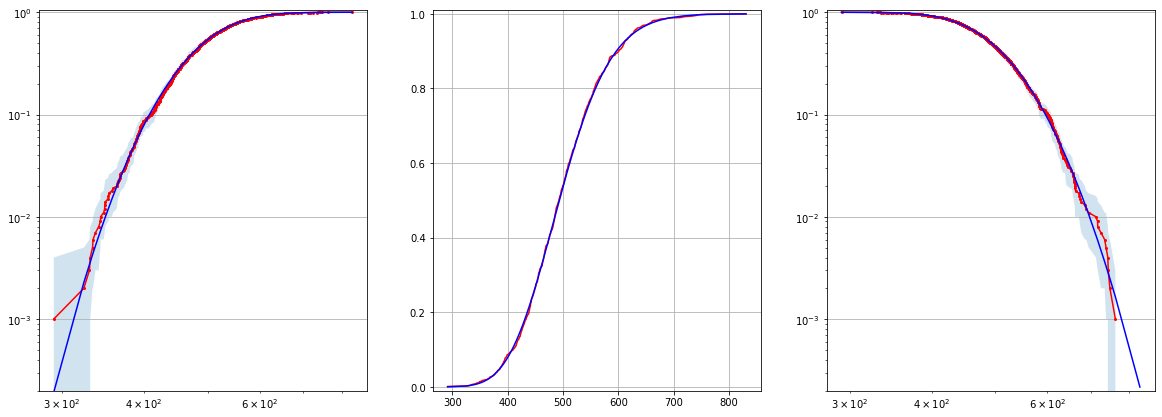



************************************************************************************************
81 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed1688066671/chance0.000622438468450698.csv
************************************************************************************************
lognormal parameters: sigma 0.12546703779741603, mu 6.3169808227466255, location 4.927080426963113e-06


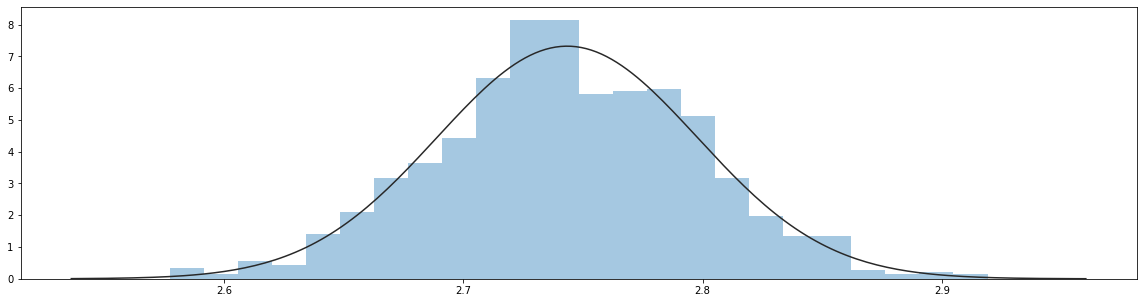

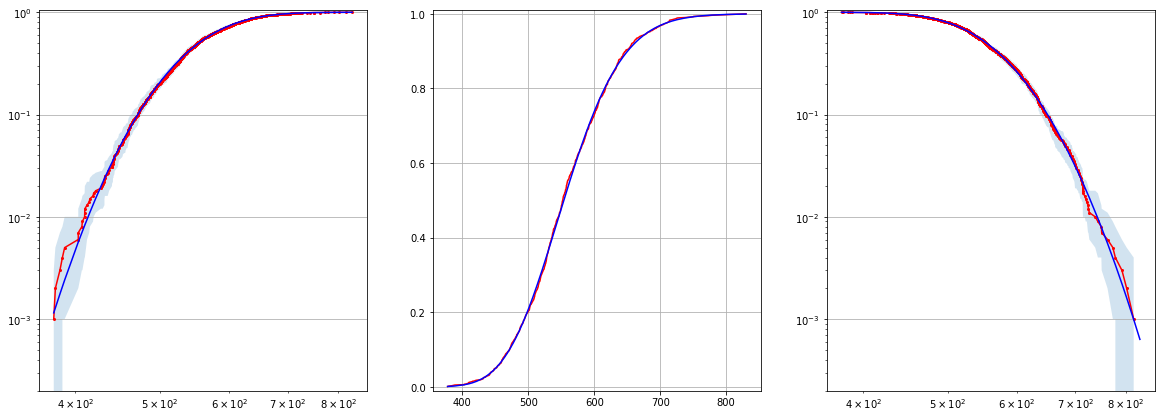



**************************************************************************************************
82 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance1.2508045080638722e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.12999059548122352, mu 8.090773457452979, location 144.17457910990143


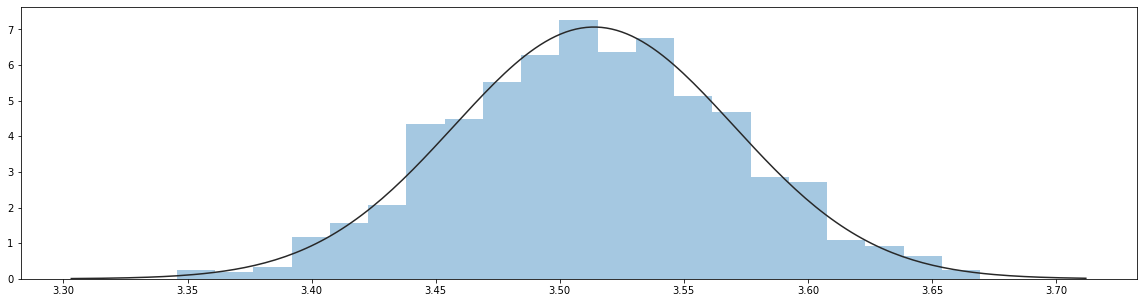

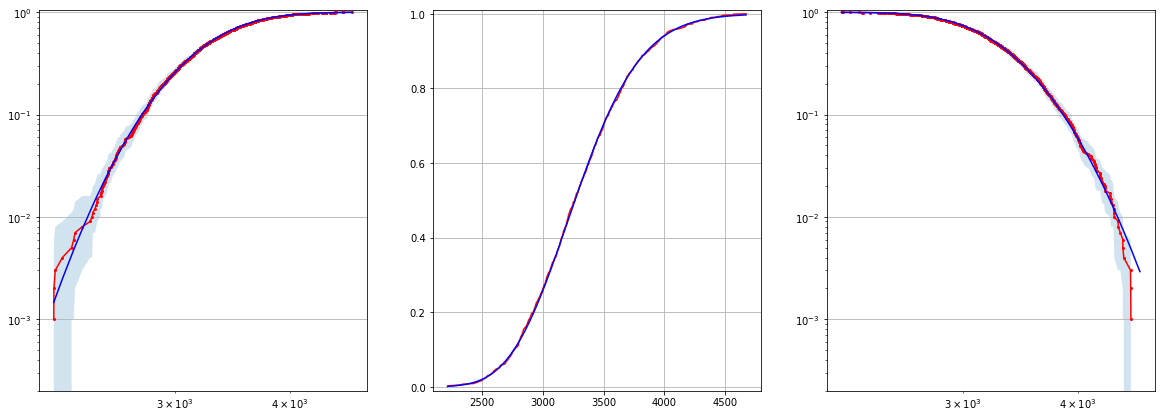



**************************************************************************************************
83 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance2.5016090161277443e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.1708437916997947, mu 7.869780673527996, location 498.97801052749753


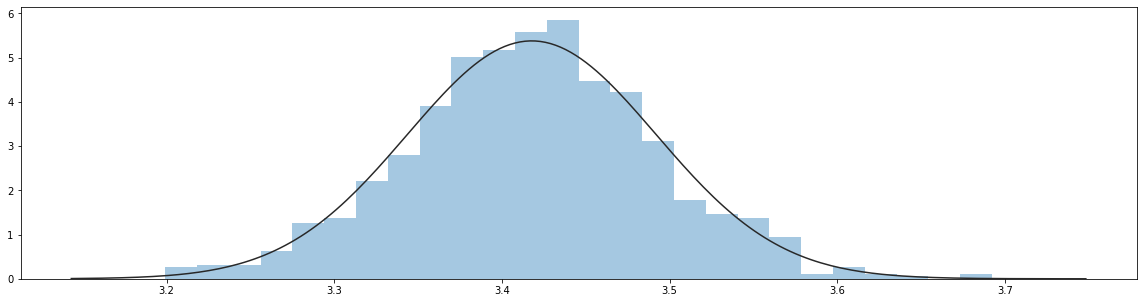

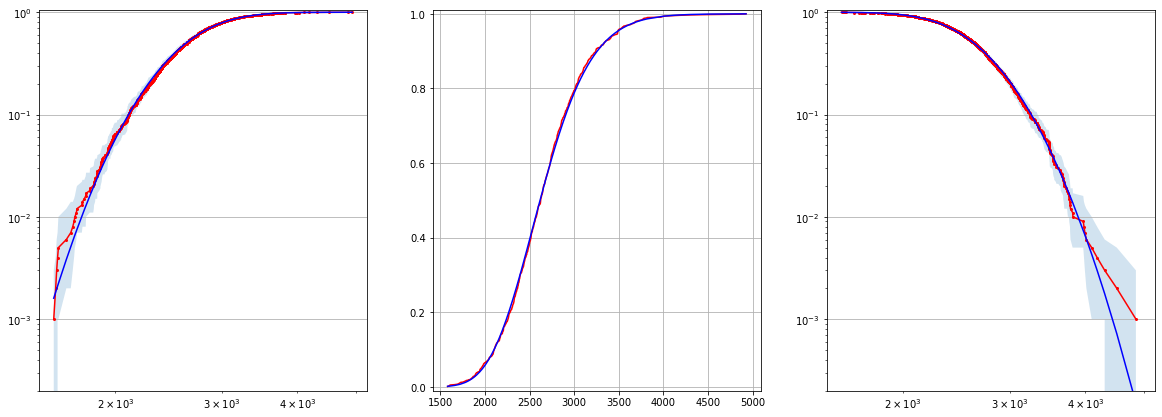



*************************************************************************************************
84 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance5.003218032255489e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2213653527594024, mu 7.592158015144605, location 768.0066352005372


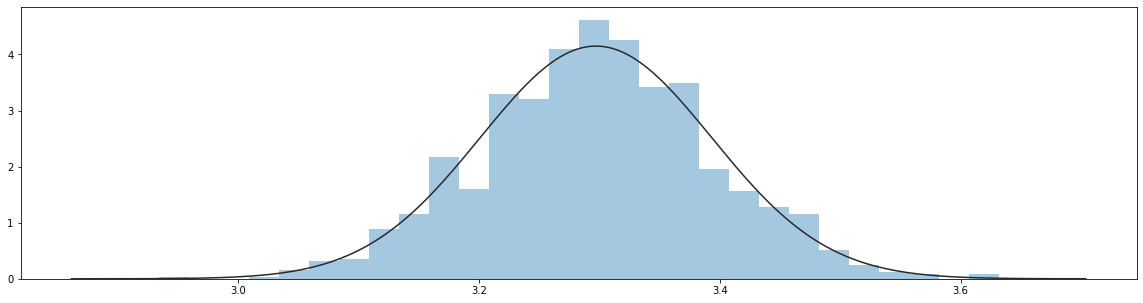

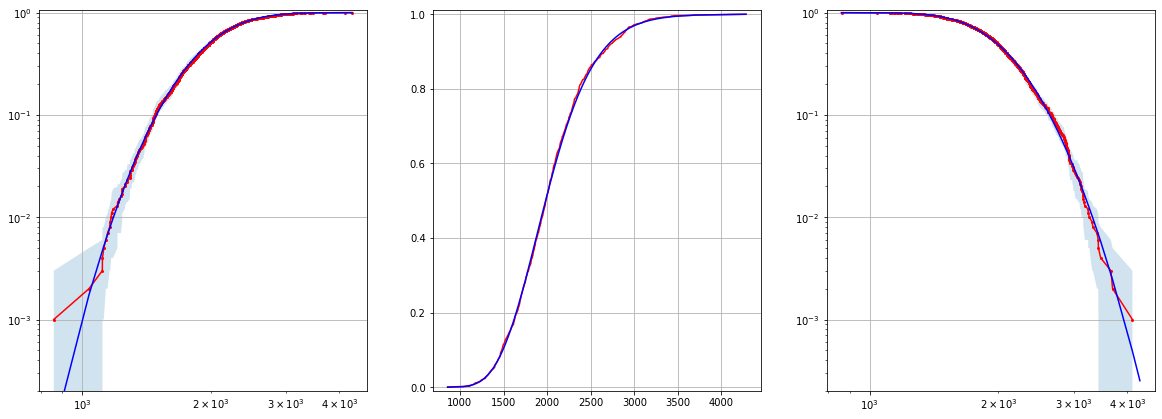



*************************************************************************************************
85 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance7.504827048383233e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.18787976257483255, mu 7.738418646951775, location 255.83158979420298


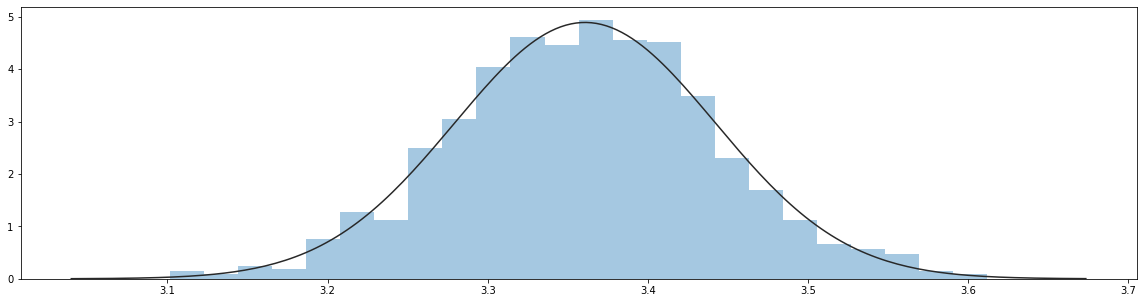

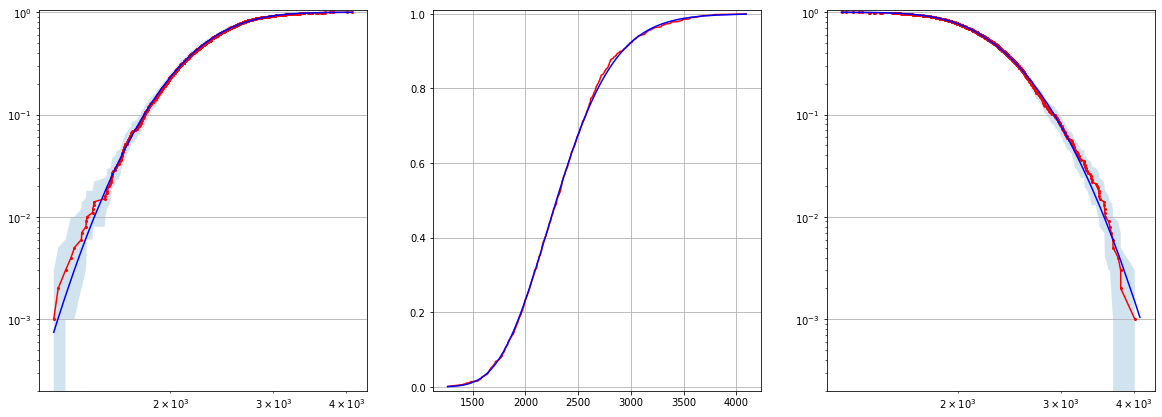



**************************************************************************************************
86 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00010006436064510977.csv
**************************************************************************************************
lognormal parameters: sigma 0.23732415155829756, mu 7.457355592490427, location 631.2677284352014


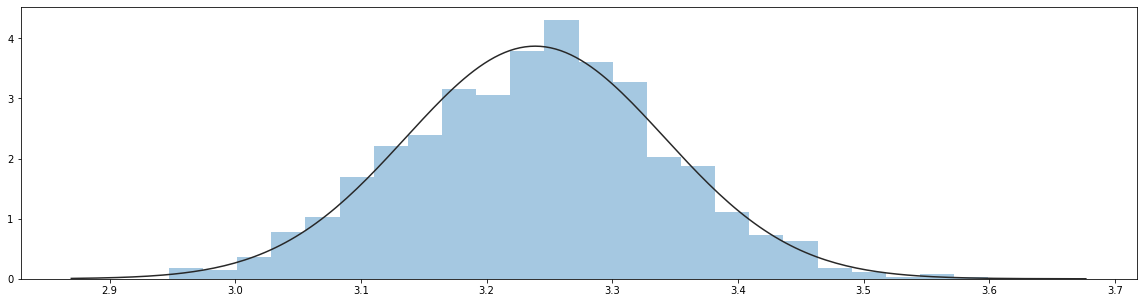

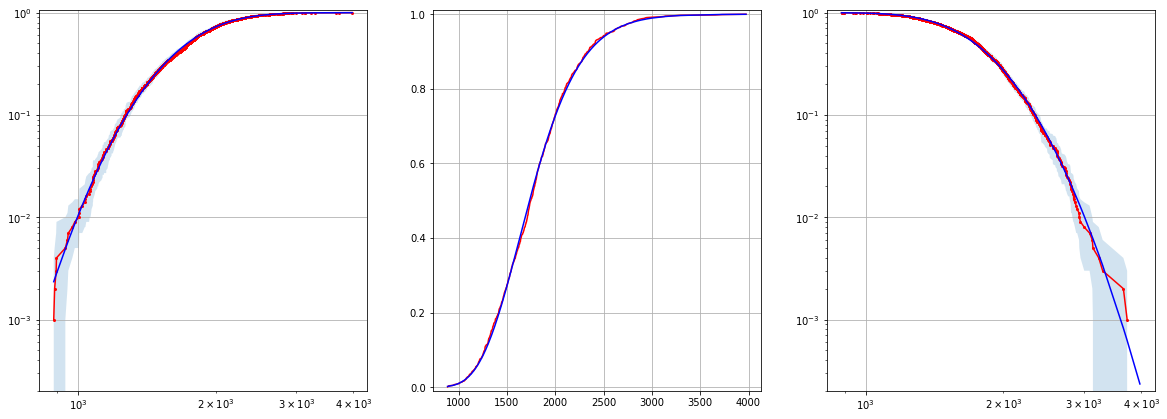



**************************************************************************************************
87 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00015009654096766466.csv
**************************************************************************************************
lognormal parameters: sigma 0.22475956528197363, mu 7.473355303961386, location 402.66518443665814


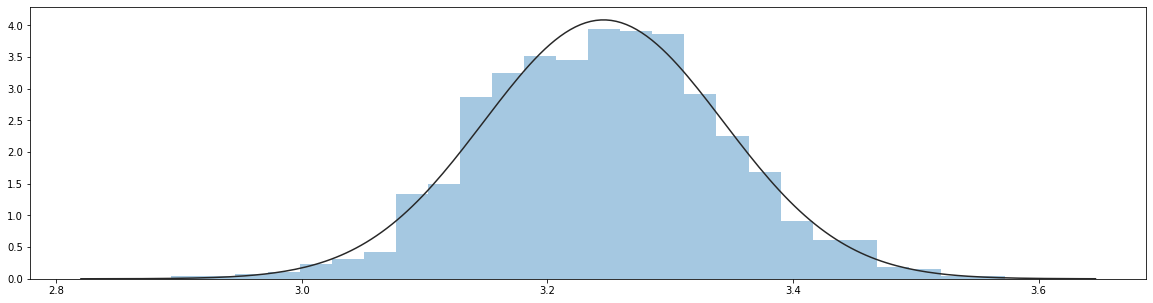

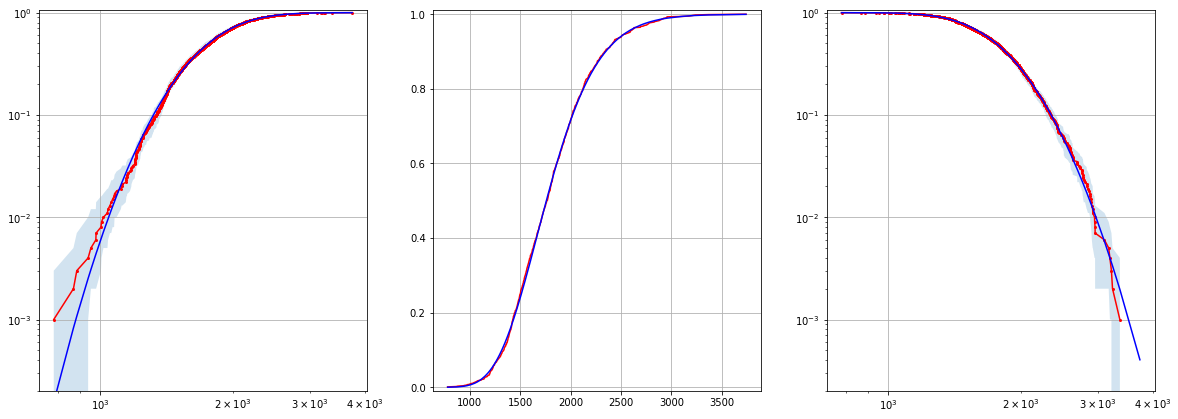



**************************************************************************************************
88 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00020012872129021955.csv
**************************************************************************************************
lognormal parameters: sigma 0.2462726309723298, mu 7.305397171082319, location 533.534906513269


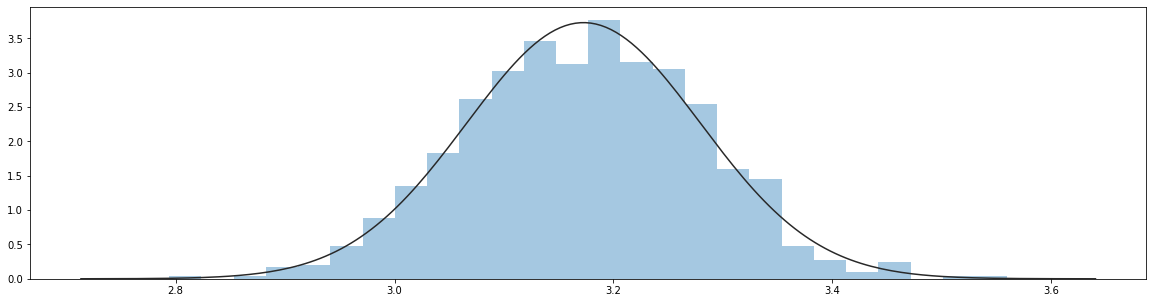

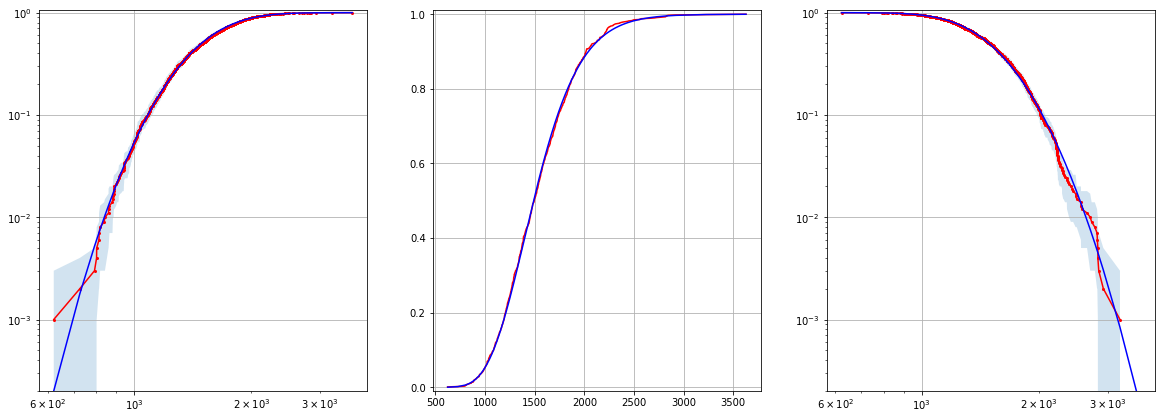



**************************************************************************************************
89 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.00025016090161277443.csv
**************************************************************************************************
lognormal parameters: sigma 0.19660080082887943, mu 7.47359776512093, location 183.76414183962441


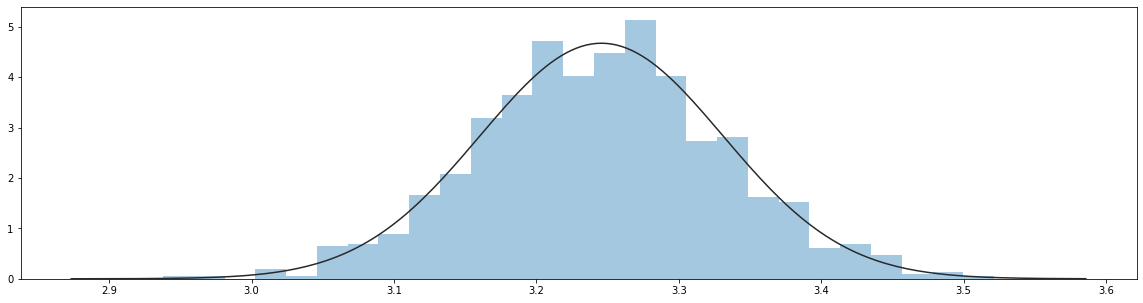

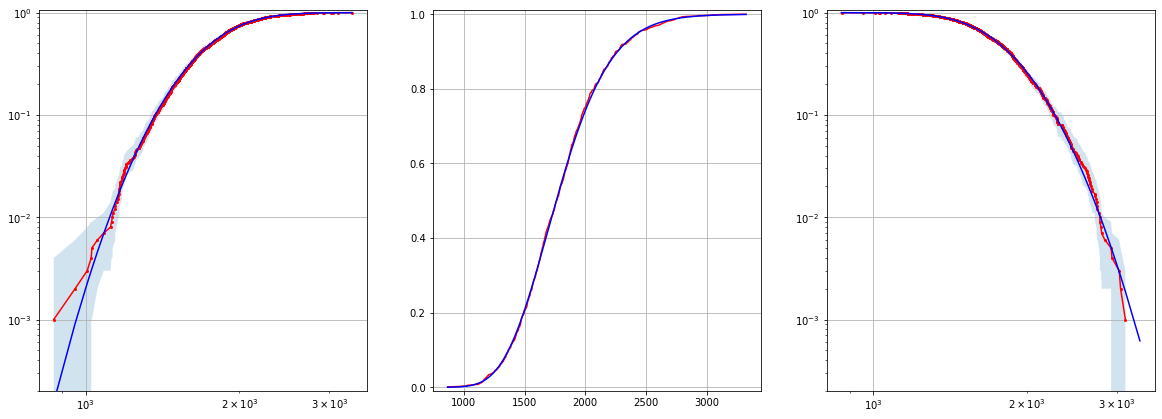



*************************************************************************************************
90 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.0003001930819353293.csv
*************************************************************************************************
lognormal parameters: sigma 0.21599510022276555, mu 7.3533986009055265, location 305.38463877656847


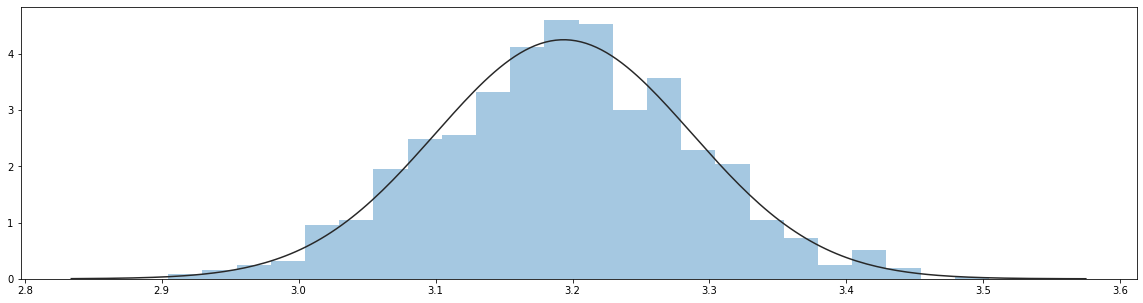

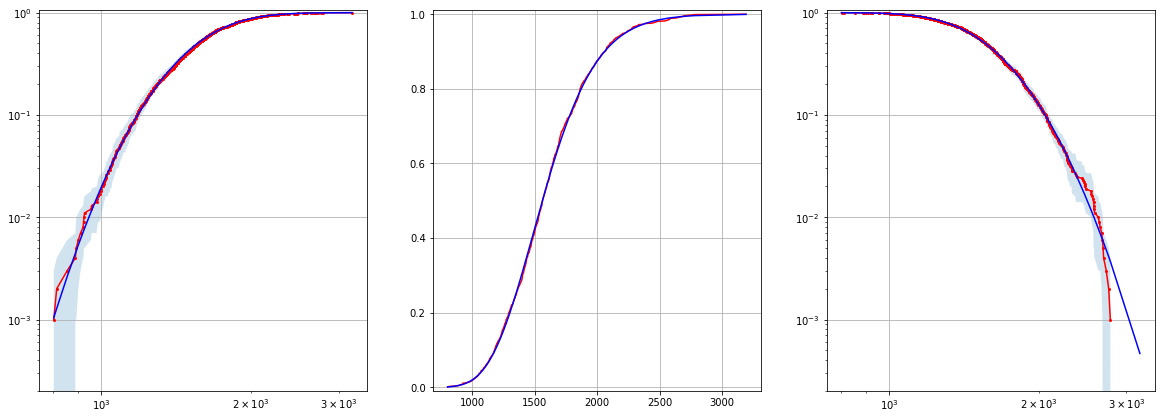



*************************************************************************************************
91 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.0003502252622578842.csv
*************************************************************************************************
lognormal parameters: sigma 0.22385041821828228, mu 7.280699877168021, location 369.36050709340896


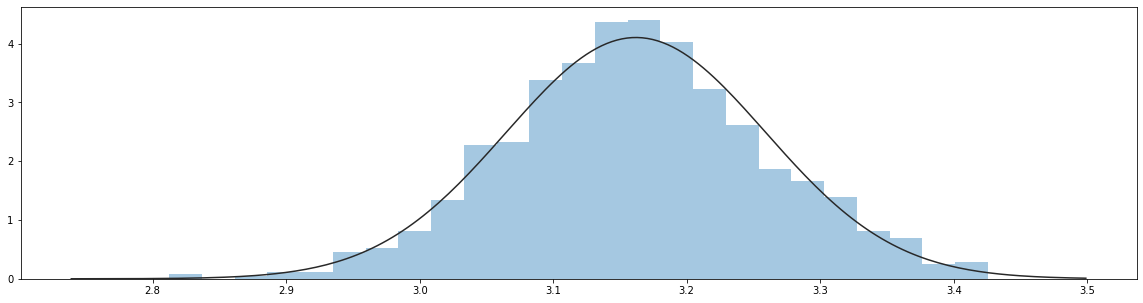

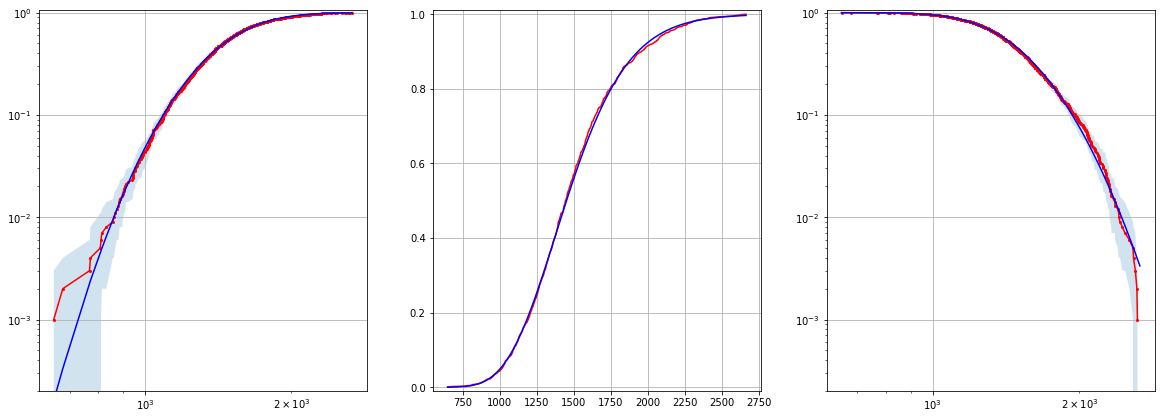



*************************************************************************************************
92 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed4087596402/chance0.0004002574425804391.csv
*************************************************************************************************
lognormal parameters: sigma 0.19455601650332685, mu 7.406856713491514, location 147.23477994327726


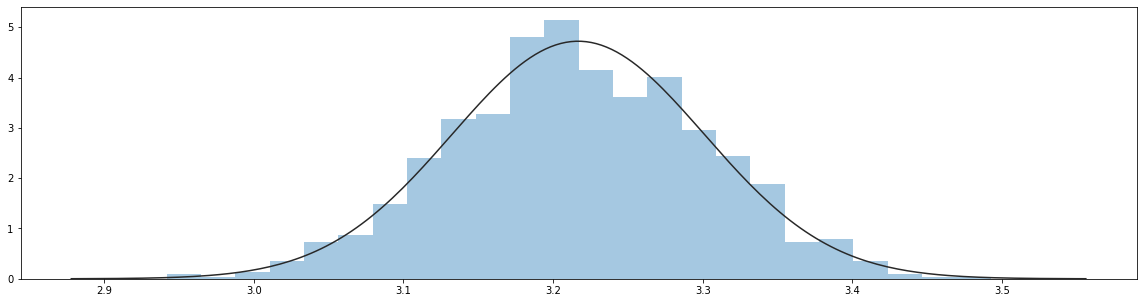

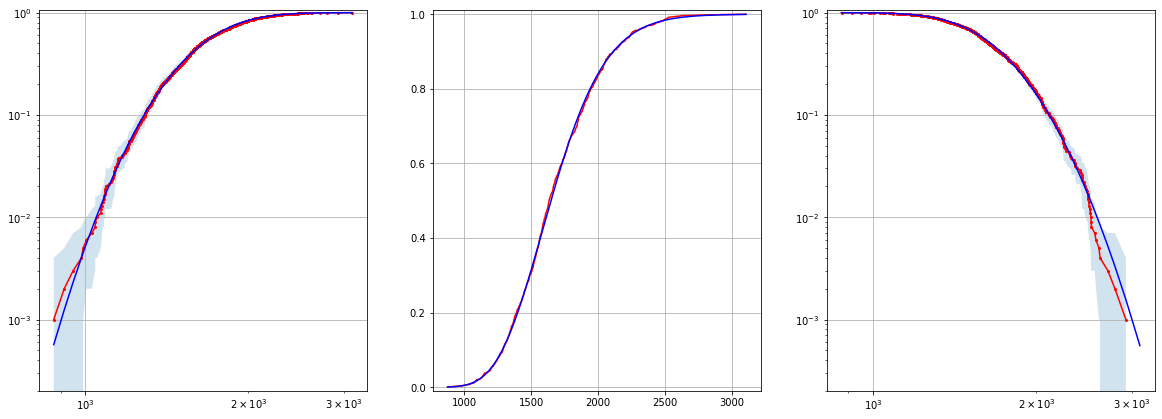



*************************************************************************************************
93 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance1.284608281923873e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.12782499816491577, mu 8.786519037418074, location 4.621975713832095e-06


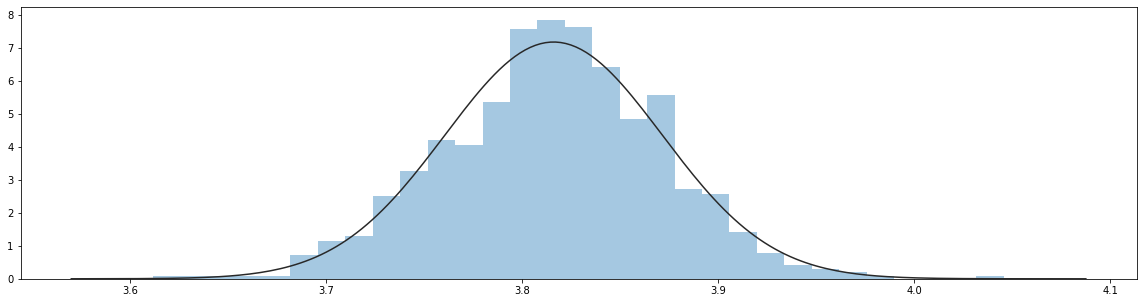

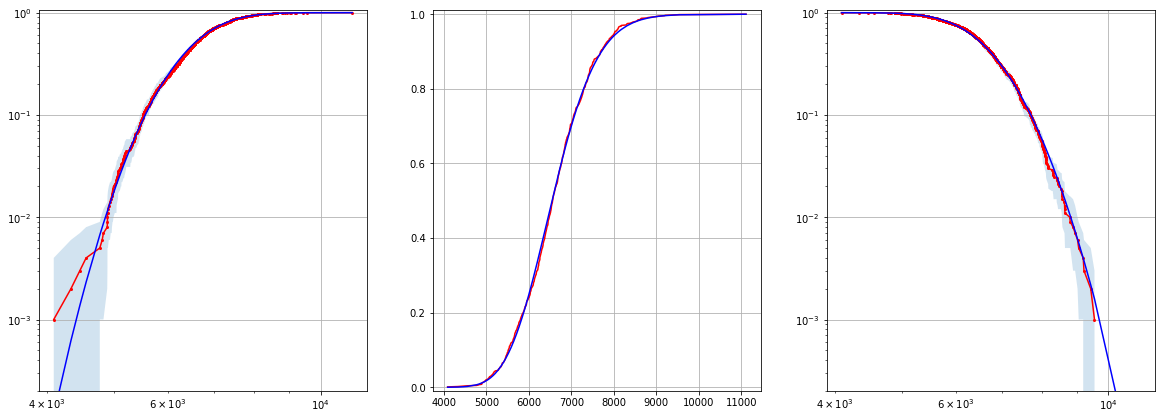



*************************************************************************************************
94 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance2.569216563847746e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.15780918917125297, mu 8.647621277544024, location 434.07042053445946


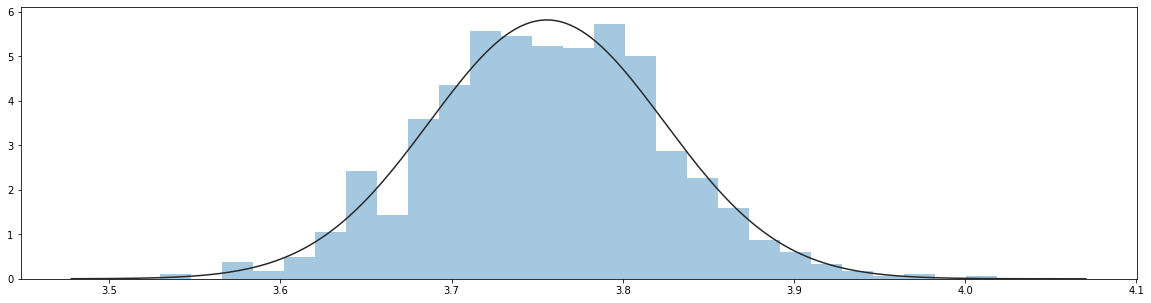

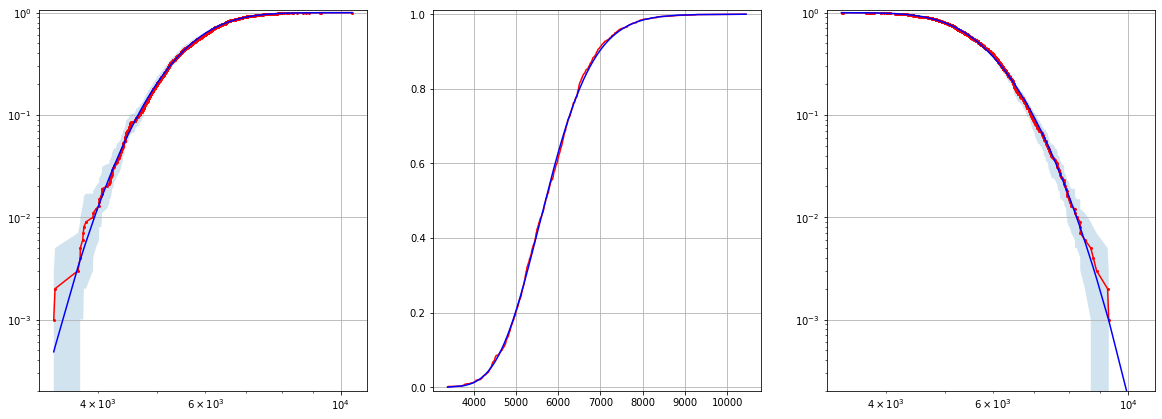



*************************************************************************************************
95 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance5.138433127695492e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.2261344588654967, mu 8.349288293822127, location 1327.9095197352212


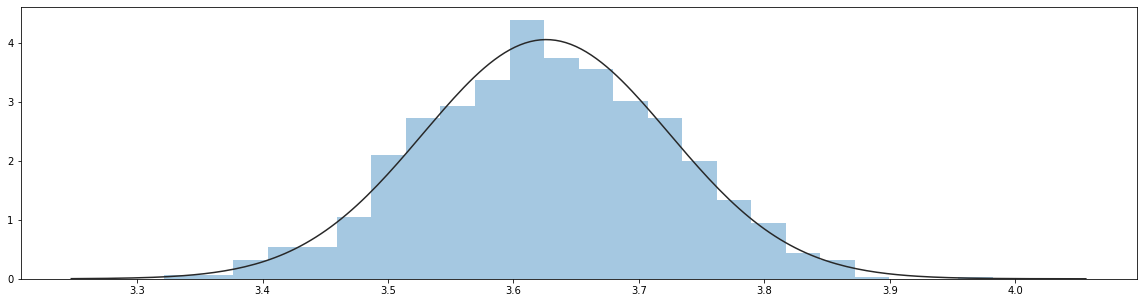

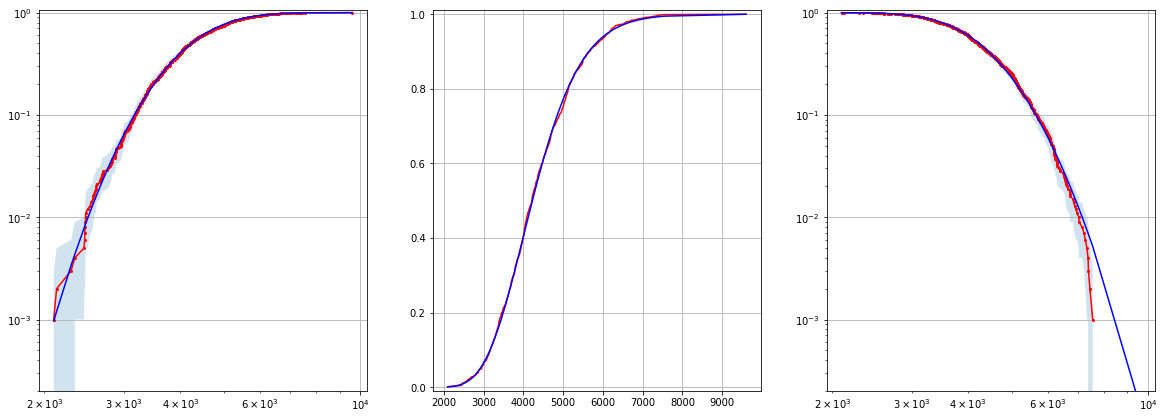



*************************************************************************************************
96 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance7.707649691543236e-05.csv
*************************************************************************************************
lognormal parameters: sigma 0.20949373243127375, mu 8.341925360458811, location 838.2216539389858


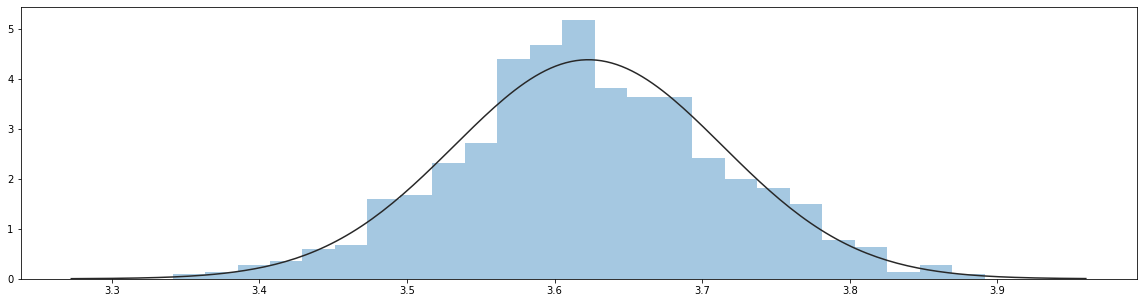

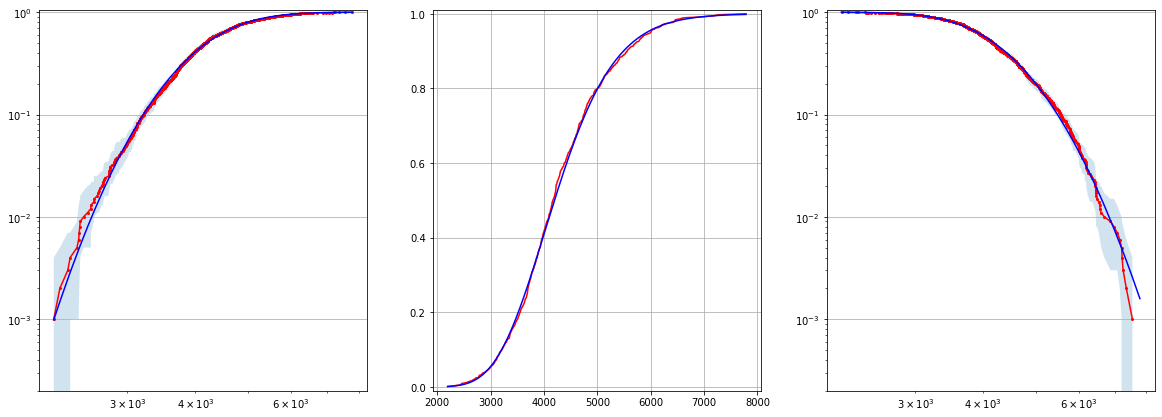



**************************************************************************************************
97 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00010276866255390984.csv
**************************************************************************************************
lognormal parameters: sigma 0.24119518980020282, mu 8.207401312470784, location 1024.35656834144


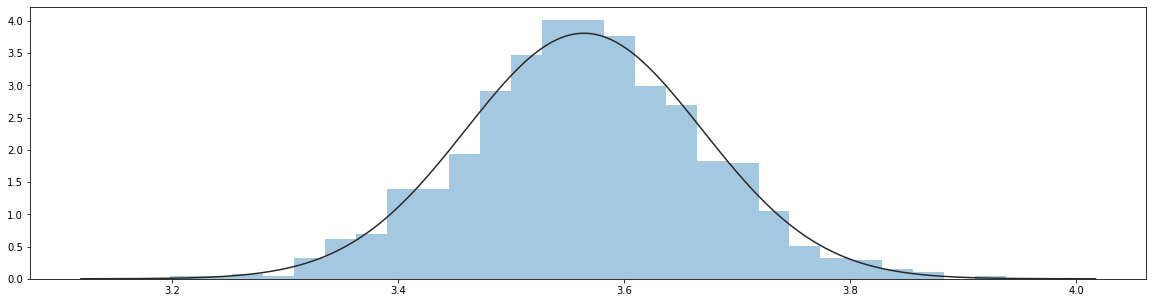

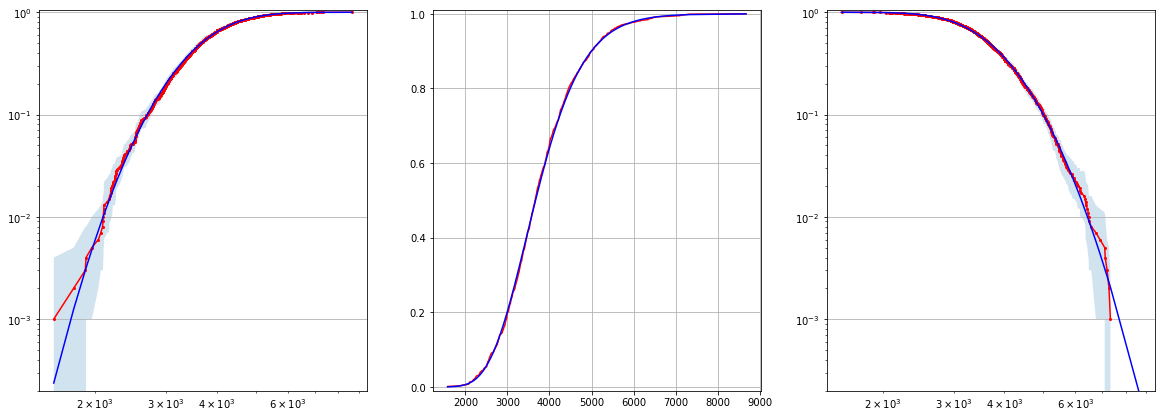



**************************************************************************************************
98 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00015415299383086473.csv
**************************************************************************************************
lognormal parameters: sigma 0.20131395453212617, mu 8.34354057707323, location 52.67634395281188


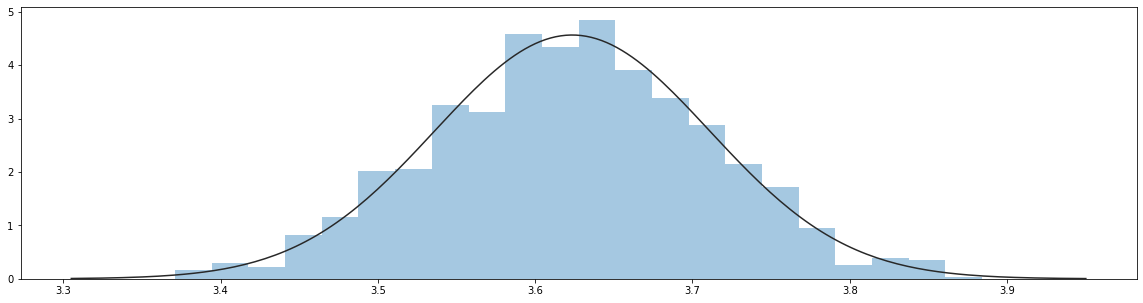

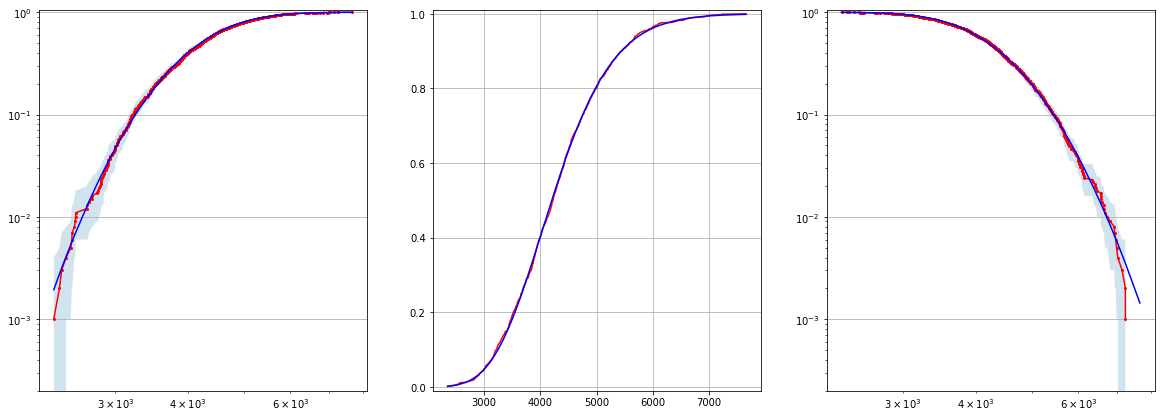



**************************************************************************************************
99 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00020553732510781967.csv
**************************************************************************************************
lognormal parameters: sigma 0.2446391703136476, mu 8.066798803240113, location 749.0099940547844


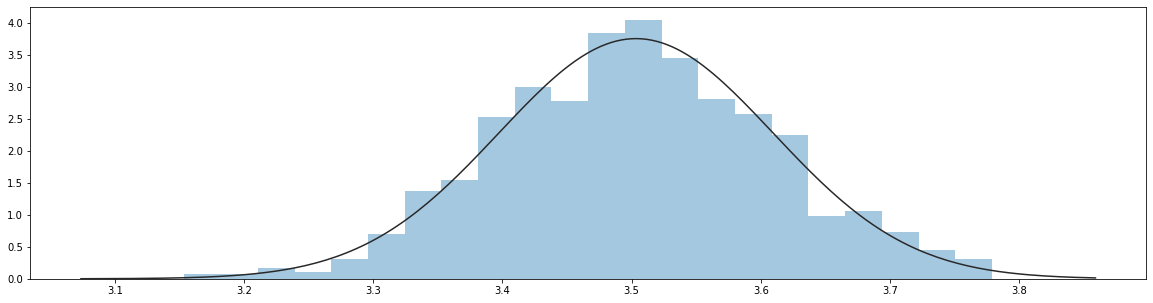

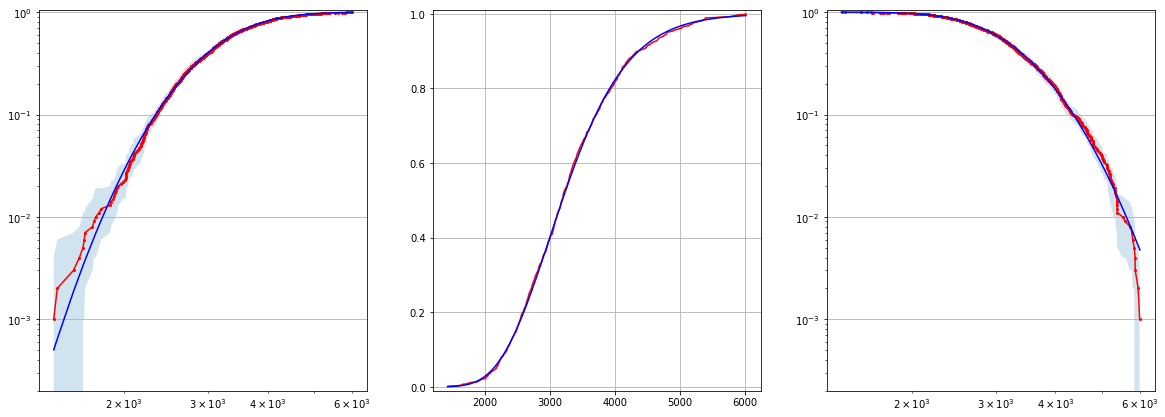



***************************************************************************************************
100 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00025692165638477457.csv
***************************************************************************************************
lognormal parameters: sigma 0.19536938393833062, mu 8.221369445599525, location 3.542688533372269e-06


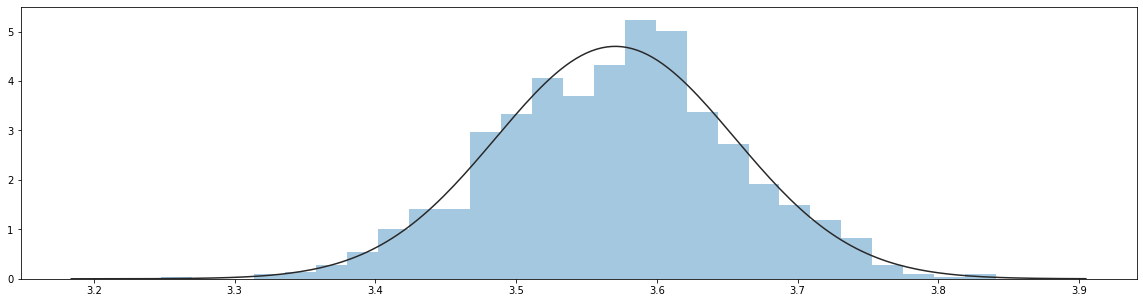

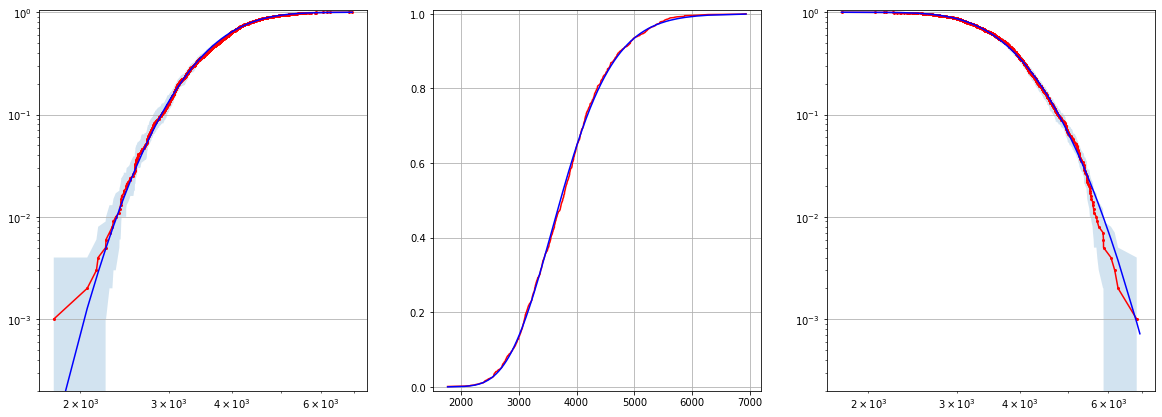



***************************************************************************************************
101 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00030830598766172946.csv
***************************************************************************************************
lognormal parameters: sigma 0.2365368519689259, mu 7.984466012269983, location 604.4519033760212


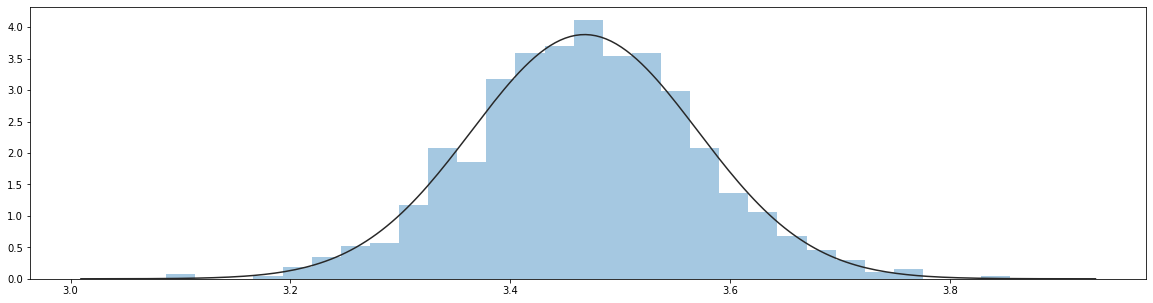

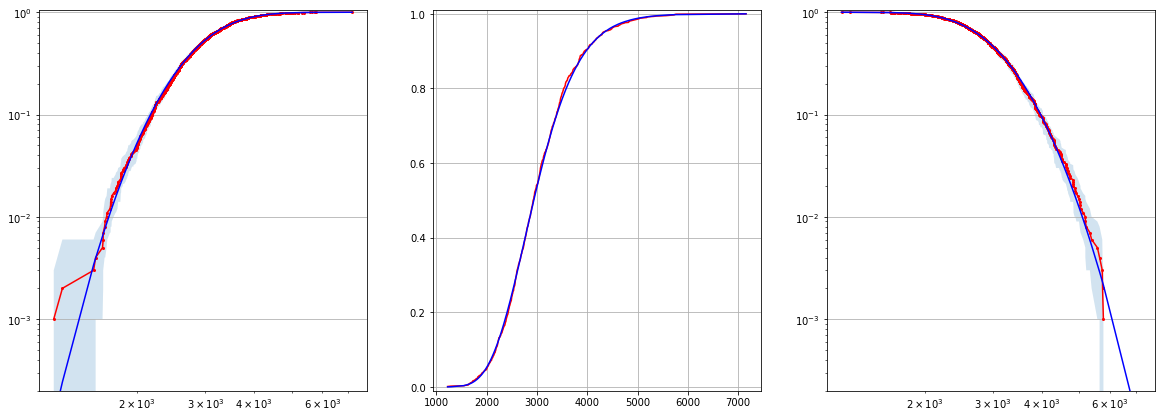



***************************************************************************************************
102 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00035969031893868435.csv
***************************************************************************************************
lognormal parameters: sigma 0.23407131754913033, mu 7.978728792389874, location 520.5069247467331


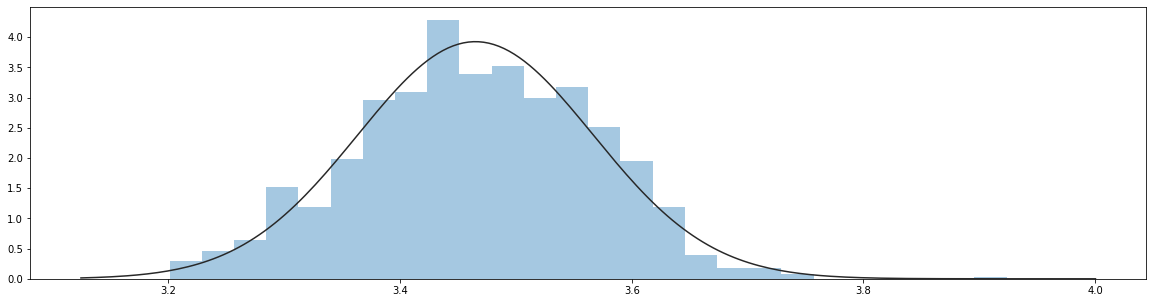

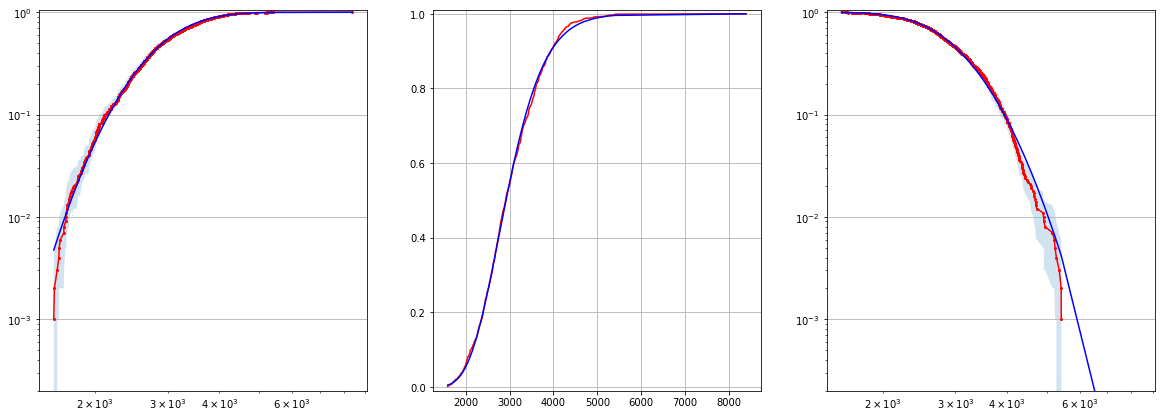



***************************************************************************************************
103 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3030156253/chance0.00041107465021563935.csv
***************************************************************************************************
lognormal parameters: sigma 0.2603428899215835, mu 7.7844632840030465, location 883.7691786414467


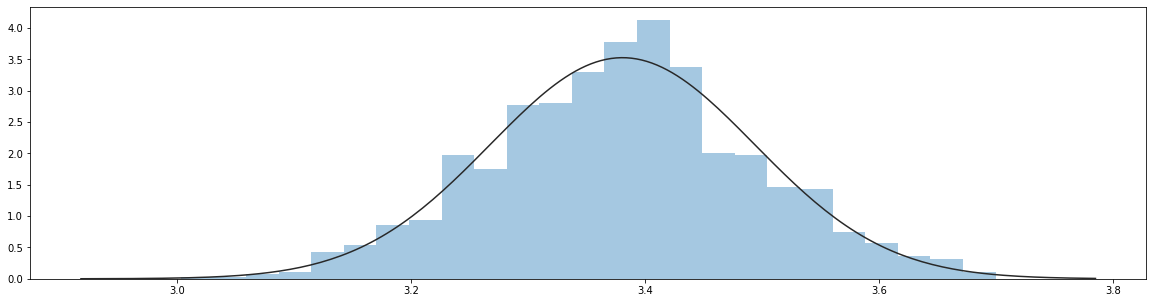

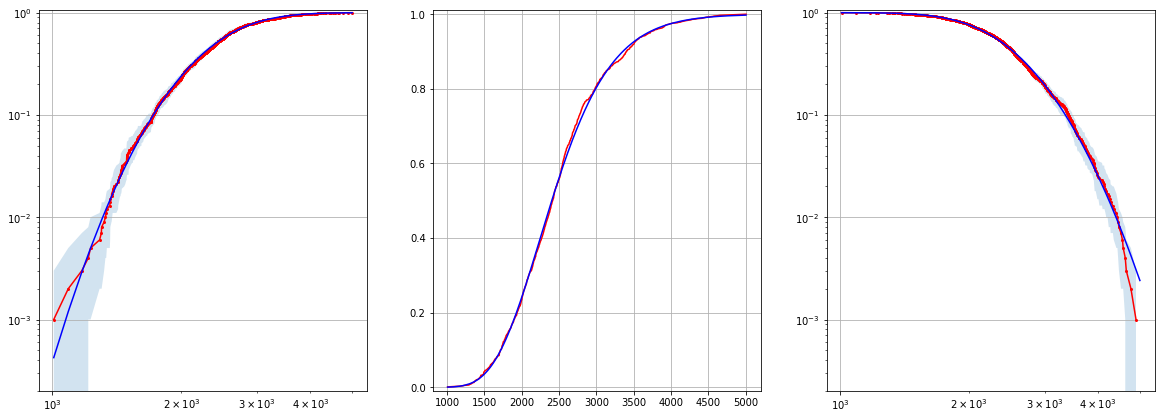



**************************************************************************************************
104 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance8.102568628375881e-06.csv
**************************************************************************************************
lognormal parameters: sigma 0.26275190675958654, mu 11.52245631613024, location 39516.76065195676


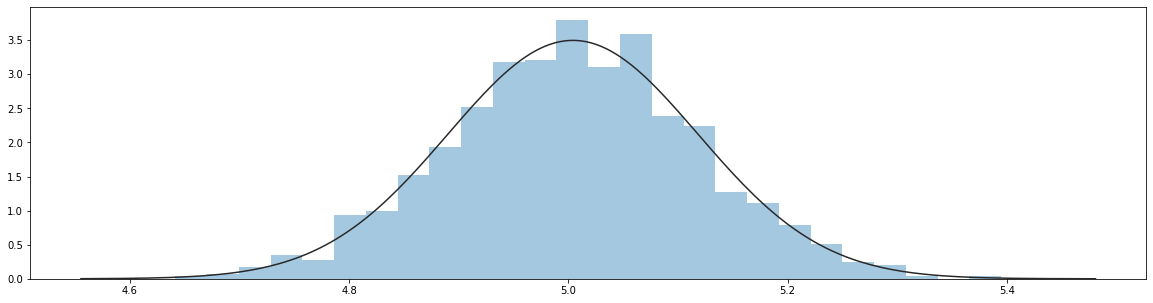

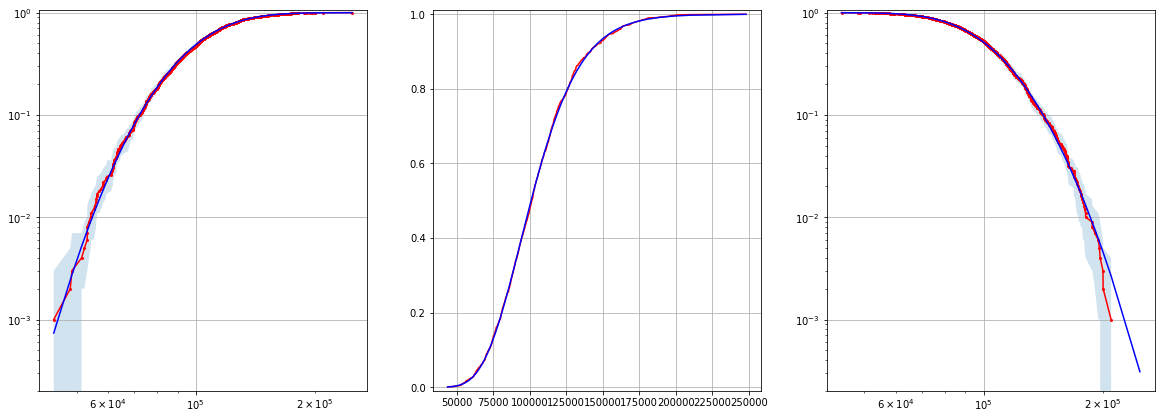



***************************************************************************************************
105 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance1.6205137256751763e-05.csv
***************************************************************************************************
lognormal parameters: sigma 0.2701969728933617, mu 11.686180291116834, location 19526.32095708078


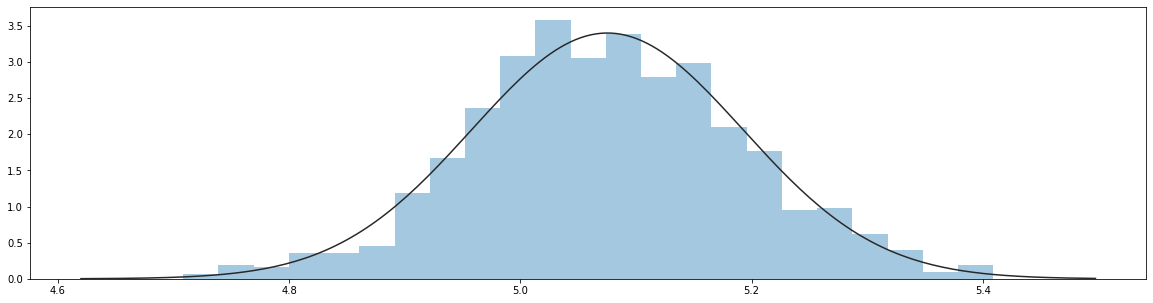

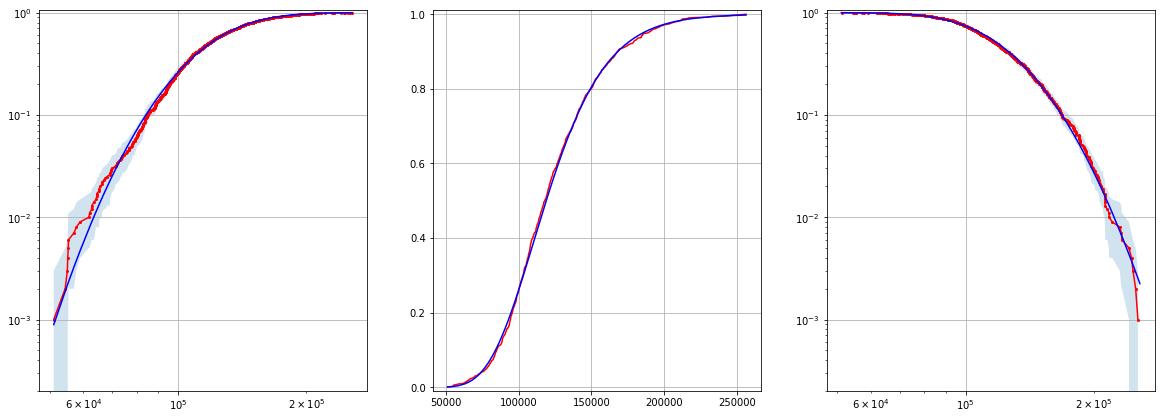



***************************************************************************************************
106 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance3.2410274513503525e-05.csv
***************************************************************************************************
lognormal parameters: sigma 0.3454131794624353, mu 11.639071352702937, location 22353.732196709352


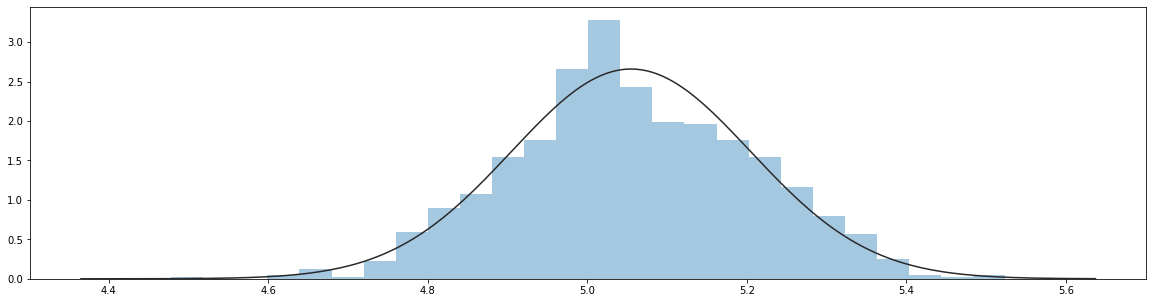

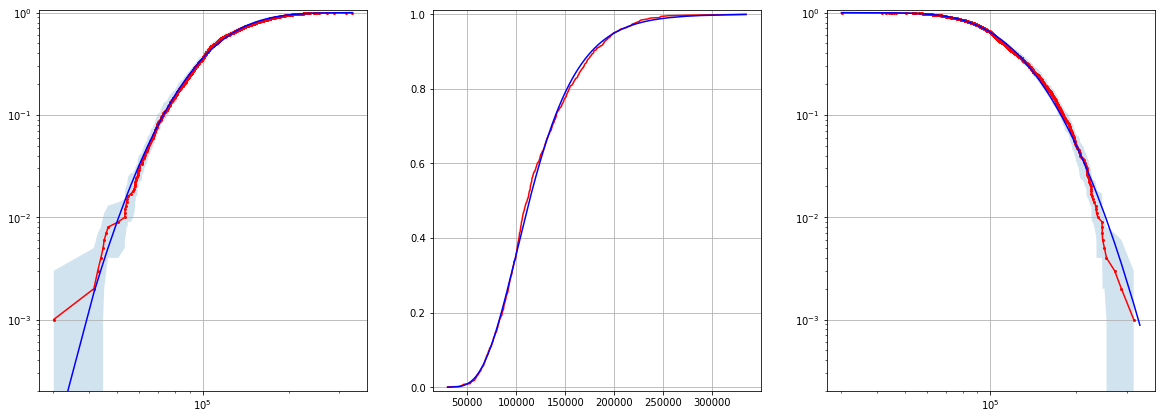



**************************************************************************************************
107 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance4.861541177025528e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.3254044814972928, mu 11.784023121425333, location 4606.309979576605


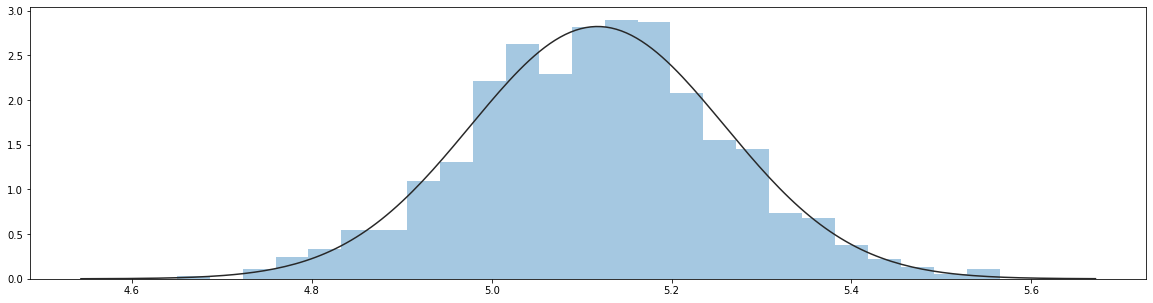

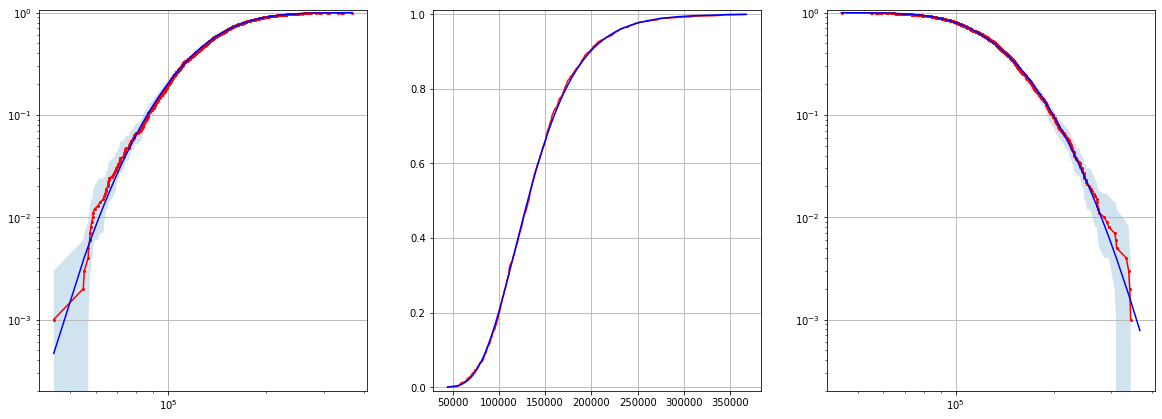



**************************************************************************************************
108 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance6.482054902700705e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.36392169719419504, mu 11.82625713547859, location 6266.004767066786


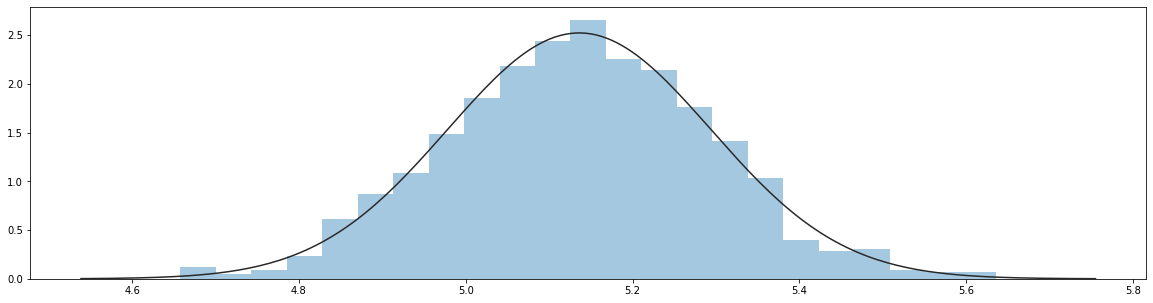

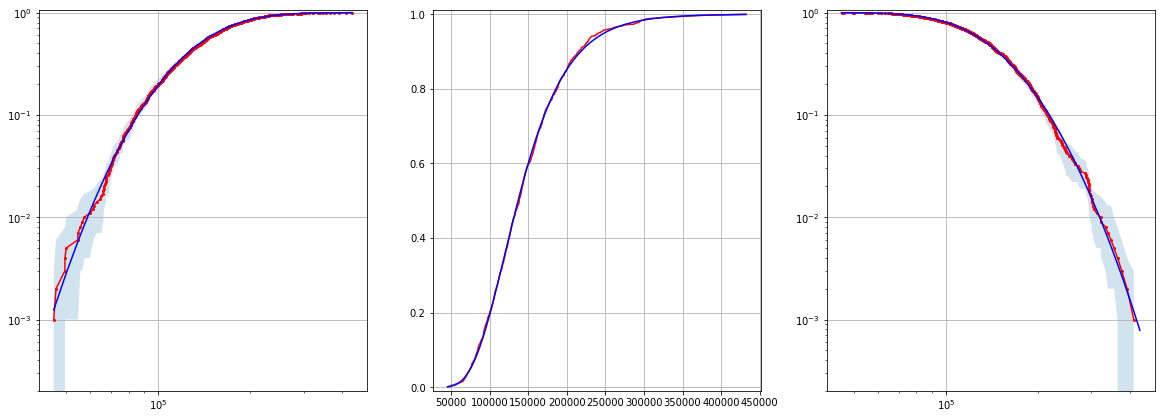



**************************************************************************************************
109 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance9.723082354051056e-05.csv
**************************************************************************************************
lognormal parameters: sigma 0.3602709907229269, mu 11.892537577240446, location 5954.687361878953


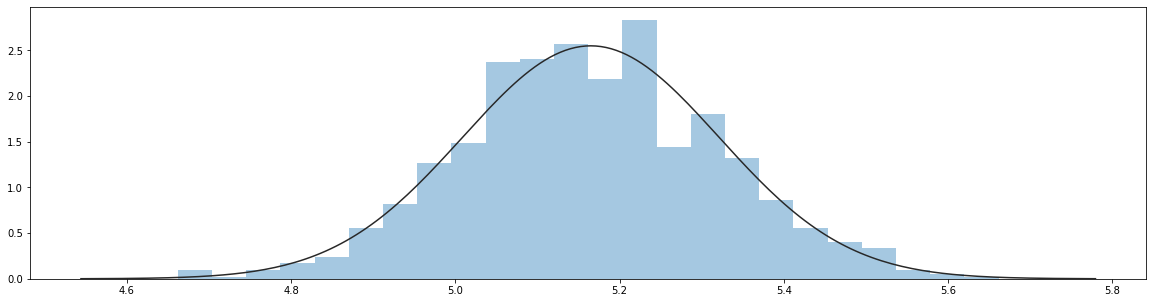

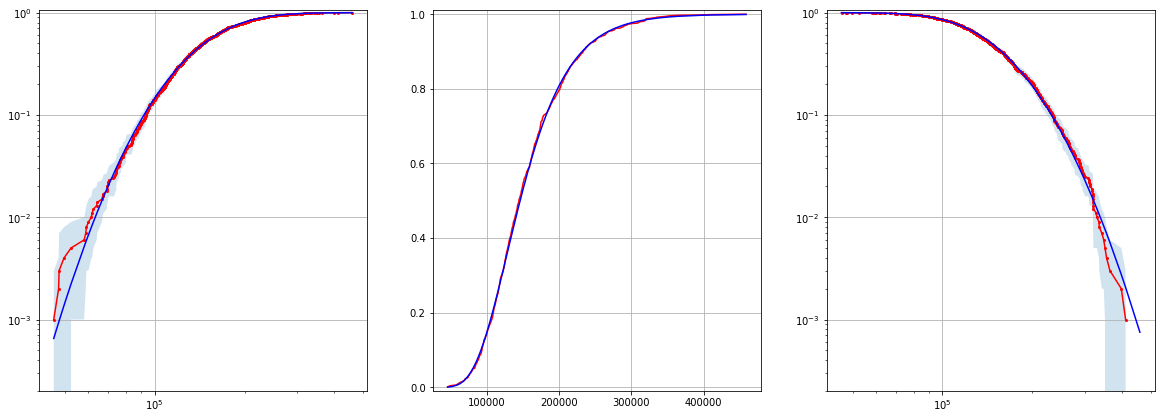



**************************************************************************************************
110 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0001296410980540141.csv
**************************************************************************************************
lognormal parameters: sigma 0.3827960957712972, mu 11.92220714437848, location 10914.143405815646


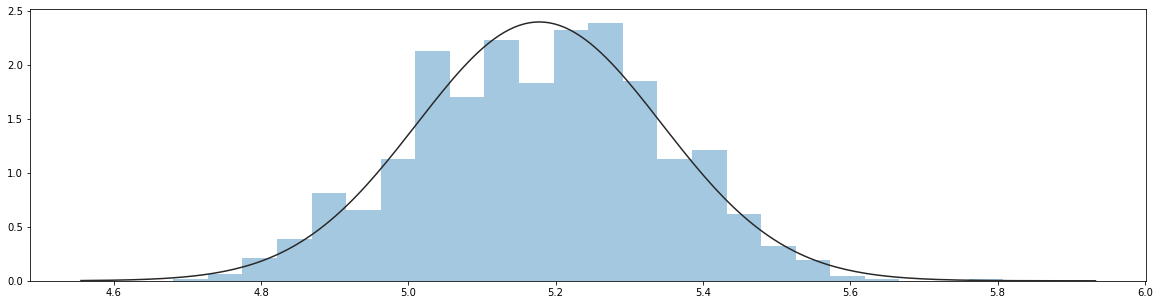

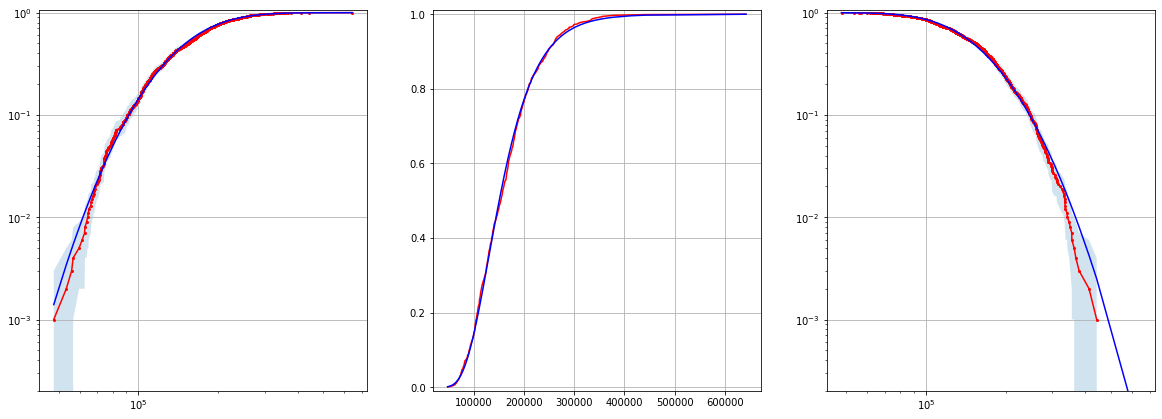



**************************************************************************************************
111 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0001620513725675176.csv
**************************************************************************************************
lognormal parameters: sigma 0.37667015579558316, mu 12.031472894390365, location 11670.358389080358


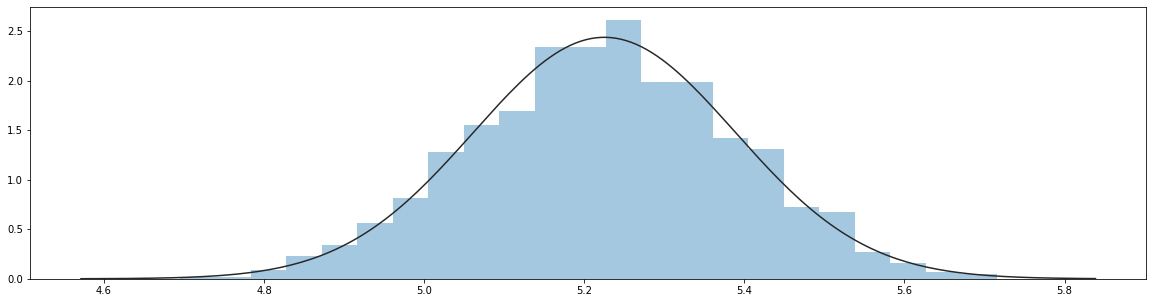

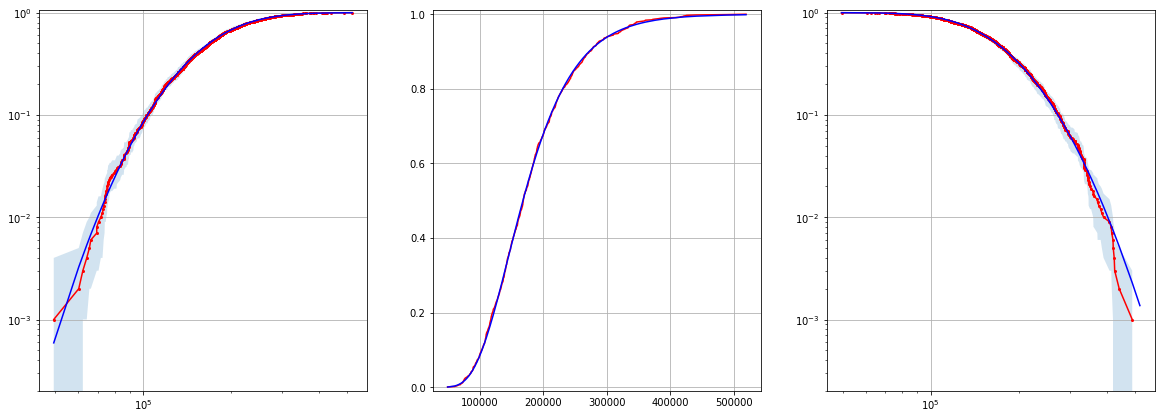



**************************************************************************************************
112 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0001944616470810211.csv
**************************************************************************************************
lognormal parameters: sigma 0.3726043940432739, mu 12.069855340274, location 16564.42822092995


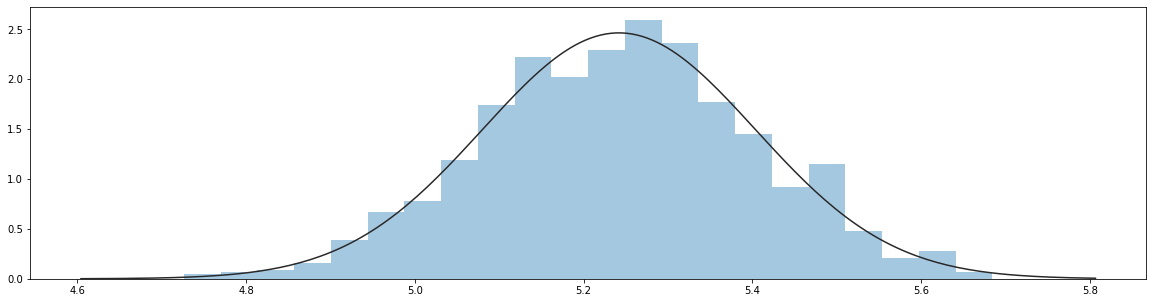

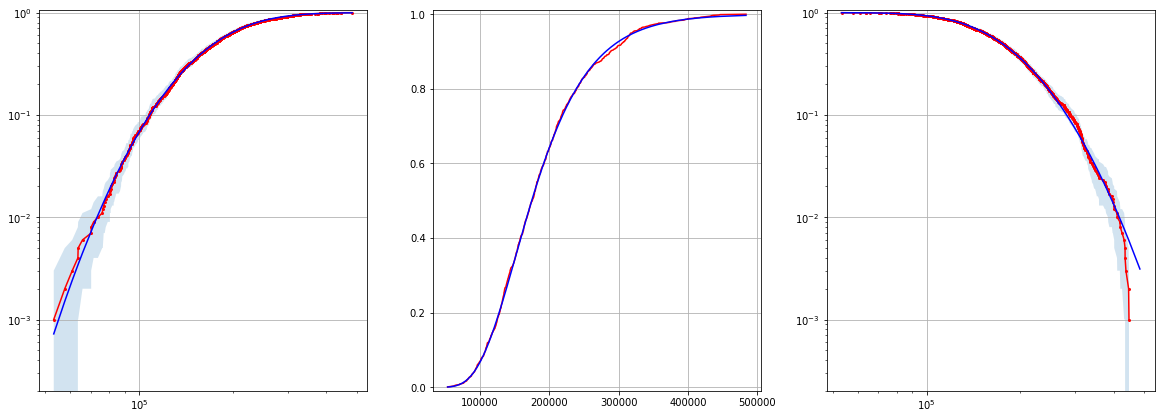



***************************************************************************************************
113 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.00022687192159452464.csv
***************************************************************************************************
lognormal parameters: sigma 0.34101501032924736, mu 12.223709122705001, location 5.853187822122211e-06


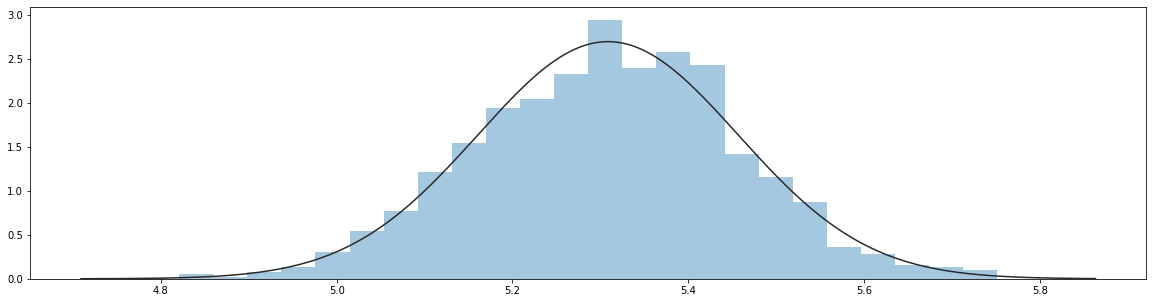

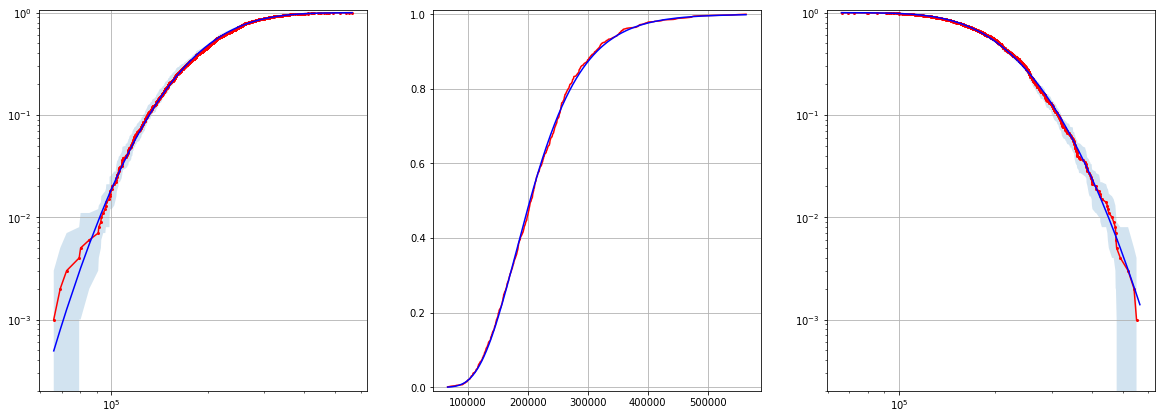



**************************************************************************************************
114 : csvs_different_chances/n50/gen_n50_m213_k3SAT_seed3310491233/chance0.0002592821961080282.csv
**************************************************************************************************
lognormal parameters: sigma 0.37391454751833814, mu 12.155484626974314, location 19179.01510320675


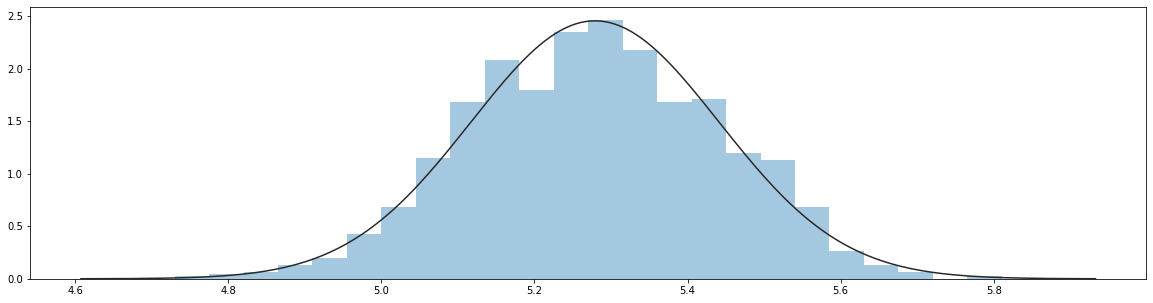

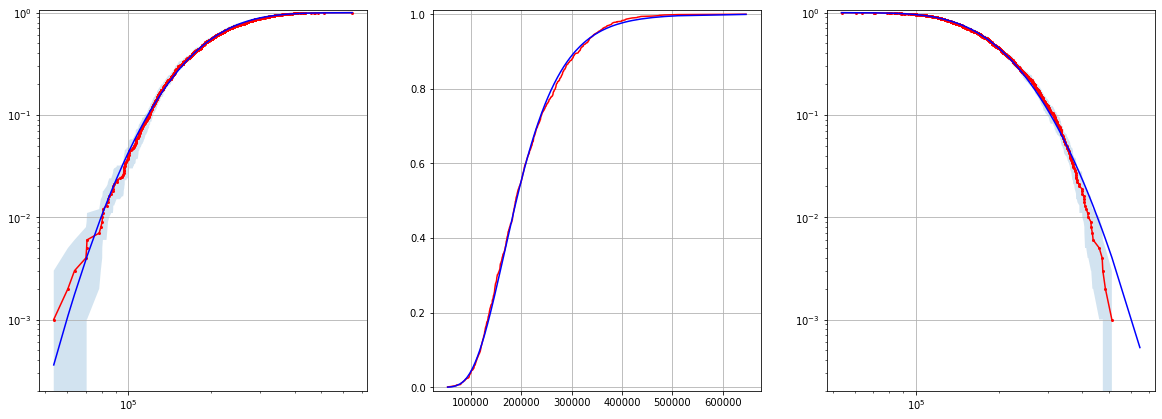



****************************************************************************************************
115 : csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance1.3622783342647554e-06.csv
****************************************************************************************************
lognormal parameters: sigma 0.3112331473160529, mu 21.567856493337622, location 233154995.14242348


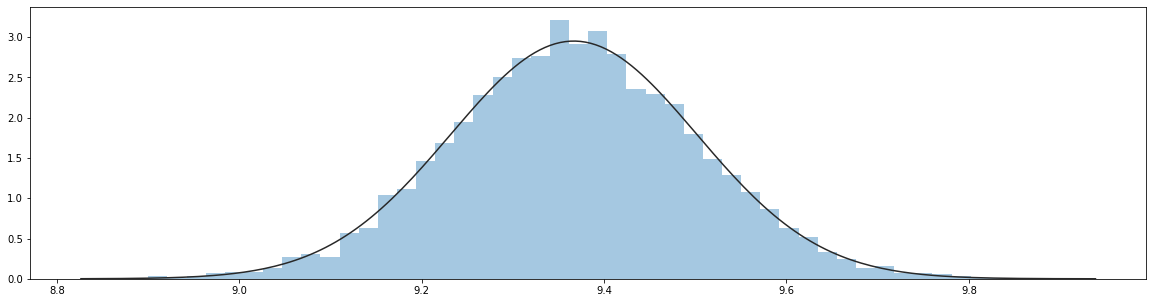

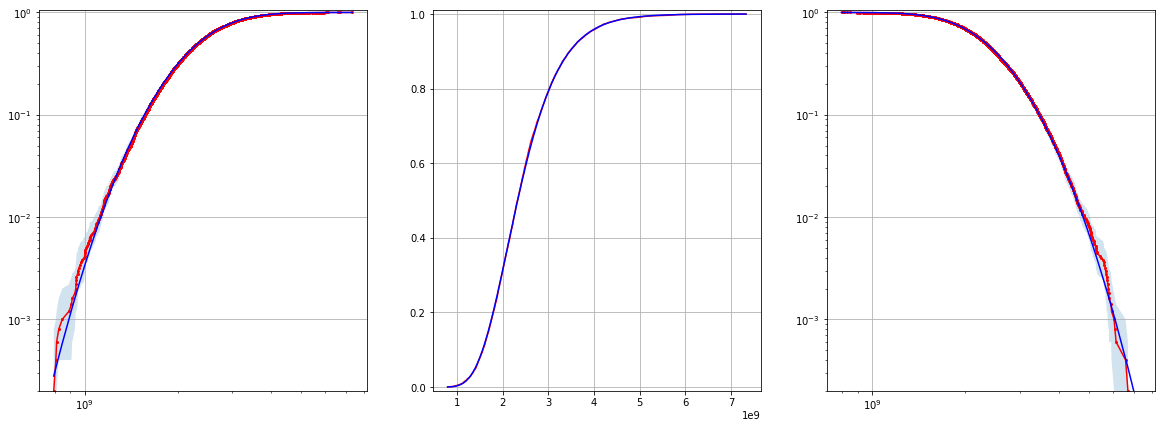



***************************************************************************************************
116 : csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance2.724556668529511e-06.csv
***************************************************************************************************
lognormal parameters: sigma 0.37545661632812455, mu 21.445518846339215, location 95551444.54329042


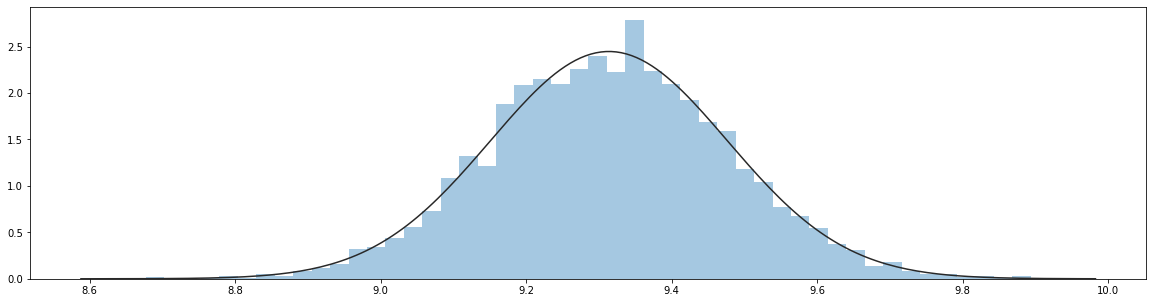

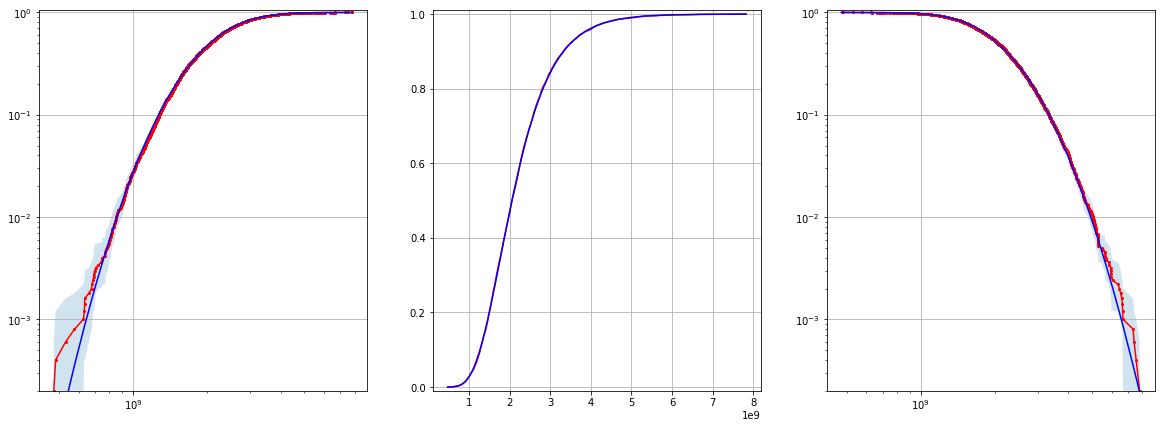



***************************************************************************************************
117 : csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance5.449113337059022e-06.csv
***************************************************************************************************
lognormal parameters: sigma 0.46651984690750886, mu 21.120527747170087, location 109229879.15942067


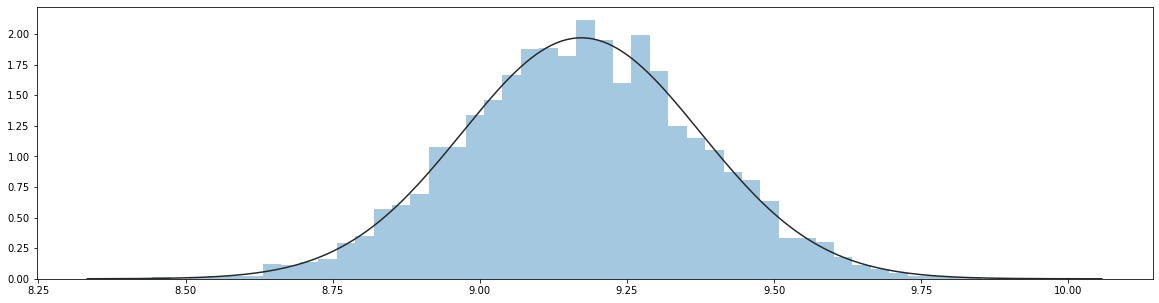

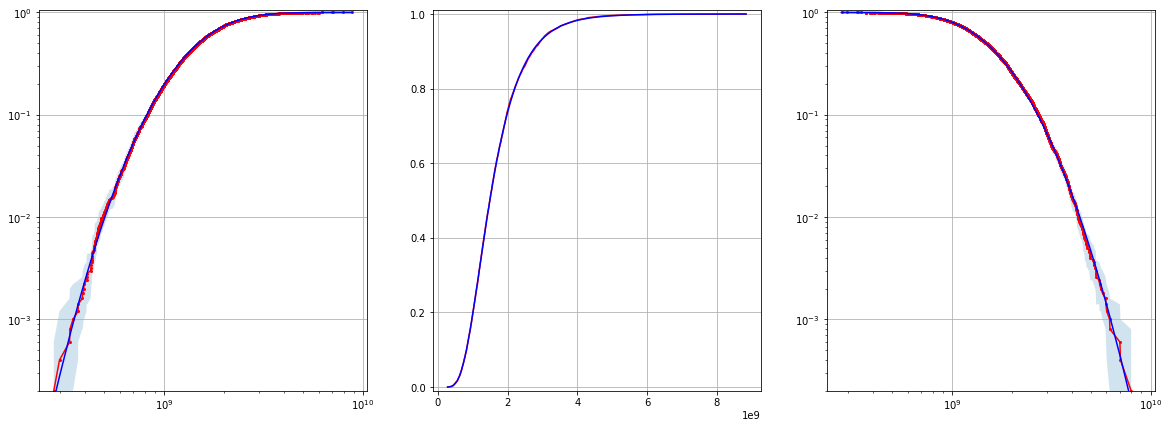



****************************************************************************************************
118 : csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance1.0898226674118043e-05.csv
****************************************************************************************************
lognormal parameters: sigma 0.5300222604034903, mu 20.75321130725778, location 82048934.86286592


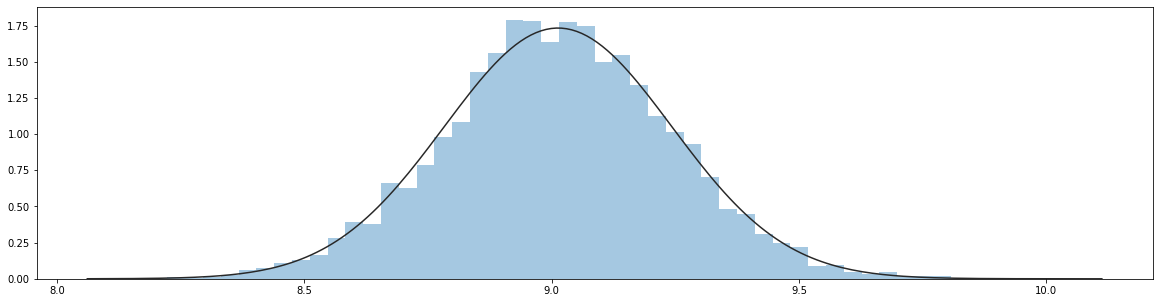

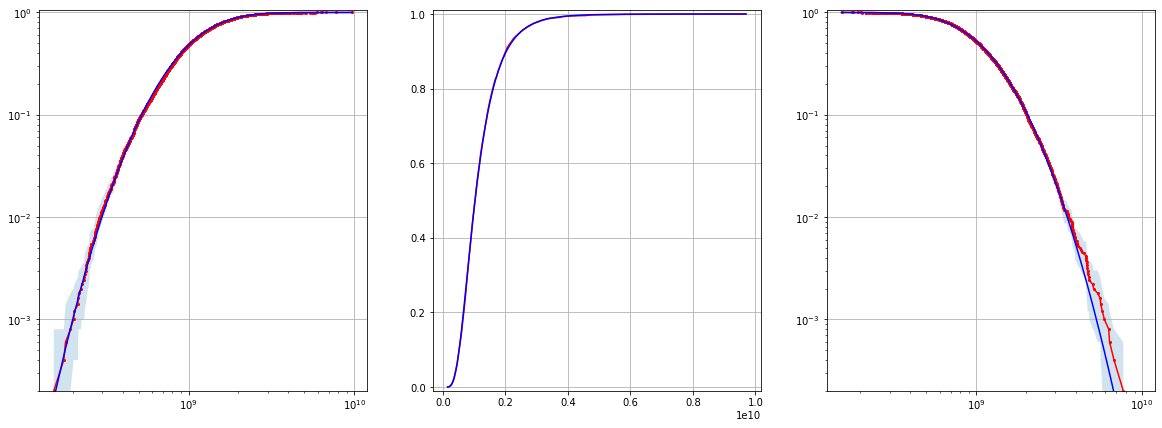



****************************************************************************************************
119 : csvs_different_chances/n100/gen_n100_m427_k3SAT_seed268543587/chance2.1796453348236087e-05.csv
****************************************************************************************************
lognormal parameters: sigma 0.5031195696658987, mu 20.49589465534744, location 10974299.84079722


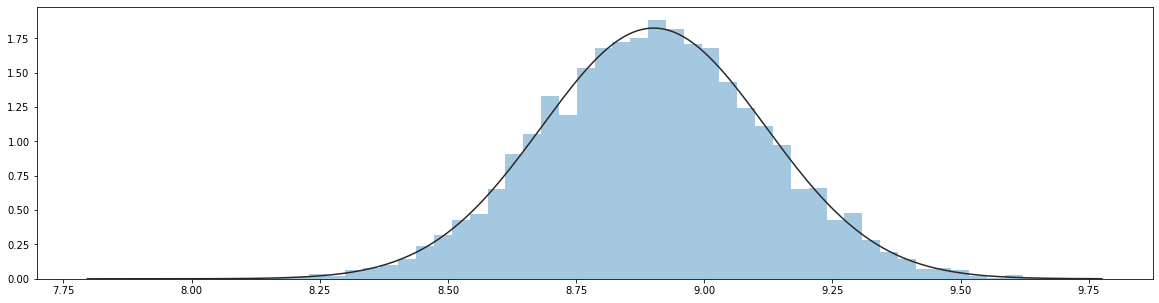

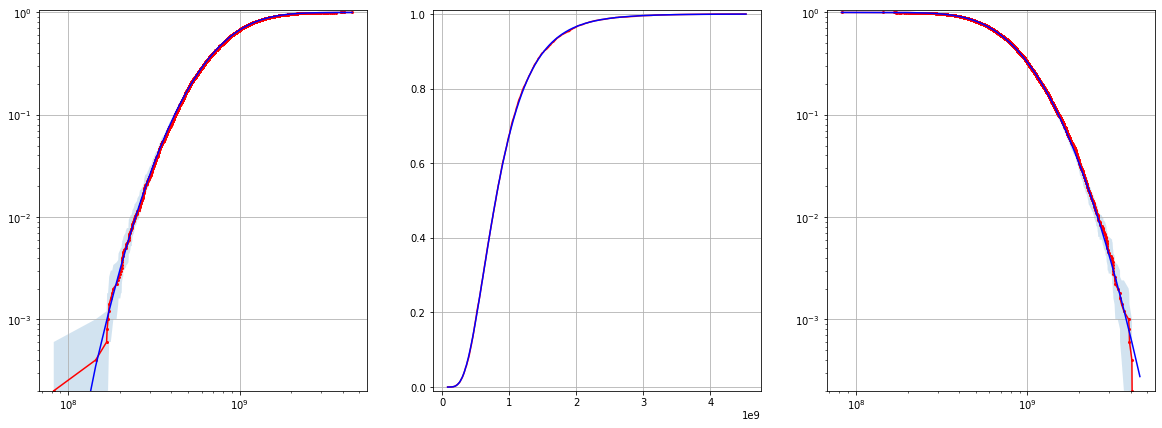

In [49]:
# Select the number of instances to interate over...
N = len(instances)

# ... and iterate over all instances to generate the plots.
for index in range(N):
    # Selection of a concrete instance and name printing
    name = instances[index]
    
    # Specify the printed name
    printed_name = name.split("../../experiments/")[1]    
    
    print("*" * (len(printed_name) + len(str(index)) + 3))
    print(index, ":", printed_name)
    print("*" * (len(printed_name) + len(str(index)) + 3))   

    #
    # Manipulate the corresponding data frame:
    # We are only interested in the flip-values, not in the runtime, or seed used.
    #
    df = pd.read_csv(name, index_col=[0,1])
    df.drop(index=['seed', 'runtime'], level=1, inplace=True)

    # Checks if any values are nan.
    if df.isnull().values.any():
        print("There is a nan-value. This was not supposed to happen.")
        
    # Next, we are going to calculate $\mathsf{mean}_{S} (F^{(i)})$,
    # i.e., the number of flips required to solve instance $F^{(i)}$ with solver $S$.
    # This then is the hardness distribution we are going to analyze.    
    means = df.mean(axis=1)
    means = np.sort(means)  
        
    #
    # Print the plots with location parameter
    #    
    
    # Scipy can be used to fit a location parameter. 
    # In practise, however, this does not work properly.
    # Thus, we use our own method `minimize_nnlf` 
    # that can be found in the `empirical` package.
    # This method must be provided with the data object `means`, 
    # a lower bound for the location parameter, here `0.0`,
    # and an upper bound for the location parameter, # here `means[0]-0.0001`.
    # This method then yields a location parameter maximizing the likelihood.
    m = minimize_nnlf(means, 0.0, means[0]-0.0001)
    means = means - m 

    plt.figure(figsize=(20,5))
    sns.distplot(np.log10(means), fit=stats.norm, kde=False)

    # Next, we fit a two-parametric lognormal distribution 
    # (with forced location parameter zero). Note that means = means - m. 
    # Note that fitting a two-parametric lognormal distribution to 
    # original_data - m is the same as fitting 
    # a three-parametric lognormal distribution to the original_data.
    # Afterwards, we can use our own location parameter.
    s, loc, scale = lognorm.fit(means, floc=0)
    print(f"lognormal parameters: sigma {s}, mu {np.log(scale)}, location {m}")
    rv = lognorm(s, loc, scale)
    rv_all = lognorm(s, m, scale)
    
    plot_and_compare_cdf(means, rv, plot_confidence=True)
    
    plt.show(block=False)
    
    print("\n")

## Statistical Tests

As described in the paper, we use the chi squared test to check the goodness-of-fit.

We print the obtained p-values for each base instance.

(The p-values obtained by the original $\chi^2$-test and the bootstrapping-test were calculated seperately and can be found in `./evaluation/evaluate_logn/all.csv` for all solver and instance combinations. The reason for this is that it takes several hours to compute these values because of the bootstrapping.)

In [50]:
# Use the instance list as a selector for the correct rows in the `all.csv` file.
selector = [path.split('../../experiments/')[1] for path in instances]

In [52]:
# Extract the relevant rows from the data frame.
file = '../evaluate_logn/all.csv'
df = pd.read_csv(file, index_col=False)
df = df[df['instance'].isin(selector)]

# Sort the entries to match the order of the diagrams above.
df['instance'] = pd.Categorical(
    df['instance'], 
    categories=selector, 
    ordered=True
)
df.sort_values('instance', inplace=True)

# Show the instance name without path
df['instance'] = df['instance'].map(lambda name: name.split("/")[-1].split(".csv")[0])

# Mark entries where p_orig < 0.05
stars = np.where(df['p_orig']<0.05, '*', ' ')
df.loc[:, 'p_orig < 0.05'] = stars.tolist()

# Mark entries where p_new < 0.05
stars = np.where(df['p_new']<0.05, '*', ' ')
df.loc[:, 'p_new < 0.05'] = stars.tolist()

# Add the index we used
index = list(range(len(instances)))
df['index'] = index

# Change order of columns s.th. index is the first one
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

pd.set_option("display.max_rows", None, "display.max_columns", None)
df

index  type                      instance    p_orig  p_new p_orig < 0.05  \
238      0  SRWA   chance9.656369259560487e-06  0.240368  0.260                 
244      1  SRWA  chance1.9312738519120974e-05  0.246423  0.230                 
247      2  SRWA   chance3.862547703824195e-05  0.502701  0.500                 
245      3  SRWA   chance5.793821555736291e-05  0.376839  0.400                 
248      4  SRWA    chance7.72509540764839e-05  0.526969  0.500                 
246      5  SRWA  chance0.00011587643111472581  0.486566  0.510                 
242      6  SRWA   chance0.0001545019081529678  0.454520  0.510                 
240      7  SRWA   chance0.0001931273851912097  0.793523  0.770                 
241      8  SRWA  chance0.00023175286222945163  0.211451  0.220                 
239      9  SRWA   chance0.0002703783392676936  0.828376  0.790                 
243     10  SRWA   chance0.0003090038163059356  0.478522  0.580                 
159     11  SRWA    chance8.44605646486143e-06  0.098528  0.123                 
156     12  SRWA   chance1.689211292972286e-05  0.313278  0.290                 
160     13  SRWA   chance3.378422585944572e-05  0.801642  0.780                 
157     14  SRWA   chance6.756845171889145e-05  0.775071  0.730                 
158     15  SRWA   chance0.0001351369034377829  0.348552  0.260                 
194     16  SRWA   chance1.004169898003682e-05  0.811406  0.820                 
204     17  SRWA   chance2.008339796007364e-05  0.630969  0.680                 
201     18  SRWA   chance4.016679592014728e-05  0.535063  0.580                 
198     19  SRWA   chance6.025019388022091e-05  0.297961  0.320                 
196     20  SRWA   chance8.033359184029456e-05  0.965375  0.970                 
203     21  SRWA  chance0.00012050038776044183  0.415135  0.480                 
197     22  SRWA  chance0.00016066718368058913  0.160560  0.190                 
200     23  SRWA   chance0.0002008339796007364  0.805545  0.830                 
199     24  SRWA  chance0.00024100077552088365  0.997770  1.000                 
202     25  SRWA   chance0.0002811675714410309  0.575414  0.580                 
195     26  SRWA  chance0.00032133436736117826  0.518875  0.580                 
175     27  SRWA   chance9.283120802166236e-06  0.189976  0.220                 
172     28  SRWA  chance1.8566241604332472e-05  0.518875  0.610                 
181     29  SRWA  chance3.7132483208664944e-05  0.951216  0.950                 
173     30  SRWA   chance5.569872481299742e-05  0.761779  0.850                 
179     31  SRWA   chance7.426496641732989e-05  0.646503  0.690                 
177     32  SRWA  chance0.00011139744962599483  0.910227  0.930                 
176     33  SRWA  chance0.00014852993283465978  0.265114  0.190                 
178     34  SRWA  chance0.00018566241604332472  0.318628  0.300                 
180     35  SRWA  chance0.00022279489925198967  0.430778  0.450                 
174     36  SRWA   chance0.0002599273824606546  0.854566  0.870                 
182     37  SRWA  chance0.00029705986566931956  0.967101  0.970                 
148     38  SRWA  chance3.6094170198416264e-05  0.755153  0.860                 
152     39  SRWA   chance7.218834039683253e-05  0.304773  0.300                 
151     40  SRWA  chance0.00014437668079366506  0.415135  0.450                 
153     41  SRWA  chance0.00021656502119049757  0.179797  0.180                 
150     42  SRWA   chance0.0002887533615873301  0.699165  0.730                 
149     43  SRWA  chance0.00043313004238099514  0.669427  0.700                 
154     44  SRWA   chance0.0005775067231746602  0.882478  0.910                 
146     45  SRWA   chance0.0007218834039683252  0.599410  0.670                 
155     46  SRWA   chance0.0008662600847619903  0.761779  0.760                 
145     47  SRWA   chance0.0010106367655556552  0.454520  0.420                 
147     48  SRWA   chance0.001155013